from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Turag/Python/DL Lab/Univariate/ECA/')


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from functions_learning import *
from feed_data import data_extract
from tensorflow import keras
from keras import layers

2024-03-08 21:01:53.712614: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-08 21:01:54.149877: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-08 21:01:54.170861: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-08 21:01:54.170888: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
epochs = 30

In [3]:
df = pd.read_csv("data/LocationB.csv")

df.drop(columns=["Unnamed: 0", "Date"], inplace=True)

WINDOW_SIZE = 3
ECB = df["ECB"]

X1, y1 = df_to_X_y(ECB, WINDOW_SIZE)
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

# General Model

### CNN

2024-03-08 21:02:02.145979: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-08 21:02:02.146024: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-08 21:02:02.146053: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2024-03-08 21:02:02.146315: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/30
1/8 [==>...........................] - ETA: 8s - loss: 2955439.0000 - root_mean_squared_error: 1719.1390

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 351ms/step - loss: 2880077.0000 - root_mean_squared_error: 1697.0790 - val_loss: 2715929.5000 - val_root_mean_squared_error: 1648.0077
Epoch 2/30
1/8 [==>...........................] - ETA: 0s - loss: 2849619.0000 - root_mean_squared_error: 1688.0814

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 392ms/step - loss: 2671087.0000 - root_mean_squared_error: 1634.3461 - val_loss: 2538999.7500 - val_root_mean_squared_error: 1593.4240
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 2544530.0000 - root_mean_squared_error: 1595.1583

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 586ms/step - loss: 2531051.2500 - root_mean_squared_error: 1590.9277 - val_loss: 2450608.5000 - val_root_mean_squared_error: 1565.4419
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2442153.2500 - root_mean_squared_error: 1562.7390

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 355ms/step - loss: 2442153.2500 - root_mean_squared_error: 1562.7390 - val_loss: 2363454.5000 - val_root_mean_squared_error: 1537.3530
Epoch 5/30
1/8 [==>...........................] - ETA: 0s - loss: 2465687.0000 - root_mean_squared_error: 1570.2506

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 353ms/step - loss: 2353941.5000 - root_mean_squared_error: 1534.2560 - val_loss: 2276521.5000 - val_root_mean_squared_error: 1508.8147
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 2266523.5000 - root_mean_squared_error: 1505.4978

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 261ms/step - loss: 2266523.5000 - root_mean_squared_error: 1505.4978 - val_loss: 2190406.7500 - val_root_mean_squared_error: 1480.0023
Epoch 7/30
1/8 [==>...........................] - ETA: 0s - loss: 2214979.0000 - root_mean_squared_error: 1488.2805

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 274ms/step - loss: 2180541.2500 - root_mean_squared_error: 1476.6655 - val_loss: 2106321.0000 - val_root_mean_squared_error: 1451.3170
Epoch 8/30
1/8 [==>...........................] - ETA: 0s - loss: 2273534.7500 - root_mean_squared_error: 1507.8245

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 243ms/step - loss: 2096266.0000 - root_mean_squared_error: 1447.8488 - val_loss: 2024255.5000 - val_root_mean_squared_error: 1422.7633
Epoch 9/30
1/8 [==>...........................] - ETA: 0s - loss: 2200946.0000 - root_mean_squared_error: 1483.5586

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 226ms/step - loss: 2014048.5000 - root_mean_squared_error: 1419.1718 - val_loss: 1943649.8750 - val_root_mean_squared_error: 1394.1484
Epoch 10/30
1/8 [==>...........................] - ETA: 0s - loss: 2012273.6250 - root_mean_squared_error: 1418.5463

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 235ms/step - loss: 1933698.1250 - root_mean_squared_error: 1390.5747 - val_loss: 1864750.8750 - val_root_mean_squared_error: 1365.5588
Epoch 11/30
1/8 [==>...........................] - ETA: 0s - loss: 1967686.5000 - root_mean_squared_error: 1402.7424

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 224ms/step - loss: 1854679.8750 - root_mean_squared_error: 1361.8663 - val_loss: 1788229.1250 - val_root_mean_squared_error: 1337.2468
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 1840531.2500 - root_mean_squared_error: 1356.6617

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 214ms/step - loss: 1778009.8750 - root_mean_squared_error: 1333.4204 - val_loss: 1709643.1250 - val_root_mean_squared_error: 1307.5332
Epoch 13/30
1/8 [==>...........................] - ETA: 0s - loss: 1777445.2500 - root_mean_squared_error: 1333.2086

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 239ms/step - loss: 1688437.5000 - root_mean_squared_error: 1299.3989 - val_loss: 1605365.2500 - val_root_mean_squared_error: 1267.0302
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 1866071.5000 - root_mean_squared_error: 1366.0422

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 290ms/step - loss: 1587214.0000 - root_mean_squared_error: 1259.8468 - val_loss: 1514313.2500 - val_root_mean_squared_error: 1230.5743
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 1508026.6250 - root_mean_squared_error: 1228.0173

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 300ms/step - loss: 1498105.6250 - root_mean_squared_error: 1223.9712 - val_loss: 1430071.2500 - val_root_mean_squared_error: 1195.8558
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 1491755.7500 - root_mean_squared_error: 1221.3745

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 329ms/step - loss: 1414820.3750 - root_mean_squared_error: 1189.4623 - val_loss: 1349667.7500 - val_root_mean_squared_error: 1161.7521
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 1336365.5000 - root_mean_squared_error: 1156.0128

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 311ms/step - loss: 1334135.0000 - root_mean_squared_error: 1155.0476 - val_loss: 1273382.8750 - val_root_mean_squared_error: 1128.4426
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 1258894.6250 - root_mean_squared_error: 1122.0048

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 307ms/step - loss: 1259079.8750 - root_mean_squared_error: 1122.0873 - val_loss: 1200387.8750 - val_root_mean_squared_error: 1095.6222
Epoch 19/30
5/8 [=================>............] - ETA: 0s - loss: 1207577.0000 - root_mean_squared_error: 1098.8981

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 255ms/step - loss: 1186629.0000 - root_mean_squared_error: 1089.3251 - val_loss: 1130513.3750 - val_root_mean_squared_error: 1063.2560
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 1065529.2500 - root_mean_squared_error: 1032.2448

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 237ms/step - loss: 1117658.6250 - root_mean_squared_error: 1057.1937 - val_loss: 1064114.0000 - val_root_mean_squared_error: 1031.5590
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 1141190.7500 - root_mean_squared_error: 1068.2653

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 235ms/step - loss: 1051954.1250 - root_mean_squared_error: 1025.6482 - val_loss: 1000194.2500 - val_root_mean_squared_error: 1000.0971
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 937700.0000 - root_mean_squared_error: 968.3491

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 223ms/step - loss: 987317.6250 - root_mean_squared_error: 993.6385 - val_loss: 940028.1250 - val_root_mean_squared_error: 969.5505
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 936907.8750 - root_mean_squared_error: 967.9400

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 235ms/step - loss: 927997.1875 - root_mean_squared_error: 963.3261 - val_loss: 880898.7500 - val_root_mean_squared_error: 938.5621
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 871046.8750 - root_mean_squared_error: 933.2990

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 292ms/step - loss: 868957.6875 - root_mean_squared_error: 932.1790 - val_loss: 824797.5000 - val_root_mean_squared_error: 908.1837
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 943460.4375 - root_mean_squared_error: 971.3189

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 224ms/step - loss: 813437.9375 - root_mean_squared_error: 901.9080 - val_loss: 771029.8125 - val_root_mean_squared_error: 878.0830
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 805189.0625 - root_mean_squared_error: 897.3233

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 312ms/step - loss: 760392.4375 - root_mean_squared_error: 872.0048 - val_loss: 719801.9375 - val_root_mean_squared_error: 848.4114
Epoch 27/30
6/8 [=====================>........] - ETA: 0s - loss: 716975.0625 - root_mean_squared_error: 846.7438

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 313ms/step - loss: 709334.1875 - root_mean_squared_error: 842.2198 - val_loss: 670549.3750 - val_root_mean_squared_error: 818.8708
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 722022.7500 - root_mean_squared_error: 849.7192

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 252ms/step - loss: 660745.6250 - root_mean_squared_error: 812.8626 - val_loss: 623709.2500 - val_root_mean_squared_error: 789.7526
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 615753.1250 - root_mean_squared_error: 784.6994

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 186ms/step - loss: 613976.3125 - root_mean_squared_error: 783.5664 - val_loss: 579259.6250 - val_root_mean_squared_error: 761.0911
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 594336.0625 - root_mean_squared_error: 770.9319

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 0s 4ms/step


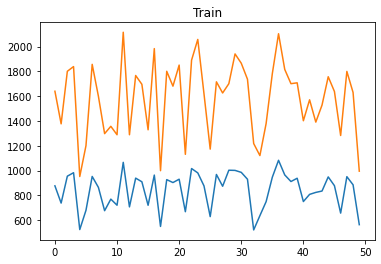

2/2 [==============================] - 0s 3ms/step


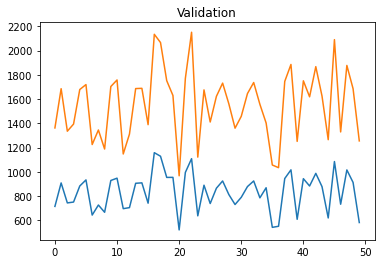

3/3 [==============================] - 0s 4ms/step


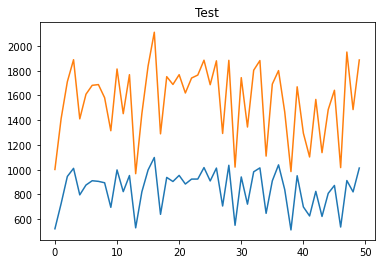

3/3 [==============================] - 0s 2ms/step


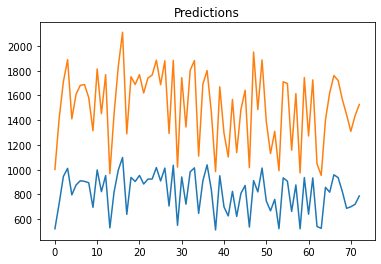

In [4]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))



cp = ModelCheckpoint('cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
cnn_mse = plot_predictions1(model,x_test, y_test)

### GRU

Epoch 1/30
1/8 [==>...........................] - ETA: 42s - loss: 2831695.0000 - root_mean_squared_error: 1682.7640

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2527645.2500 - root_mean_squared_error: 1589.8569 - val_loss: 2501386.5000 - val_root_mean_squared_error: 1581.5773
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 2535212.0000 - root_mean_squared_error: 1592.2349

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2527478.7500 - root_mean_squared_error: 1589.8046 - val_loss: 2501227.0000 - val_root_mean_squared_error: 1581.5267
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 2527303.7500 - root_mean_squared_error: 1589.7496

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2527303.7500 - root_mean_squared_error: 1589.7496 - val_loss: 2500991.5000 - val_root_mean_squared_error: 1581.4524
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 2515510.5000 - root_mean_squared_error: 1586.0361

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2526980.5000 - root_mean_squared_error: 1589.6479 - val_loss: 2500504.7500 - val_root_mean_squared_error: 1581.2985
Epoch 5/30
6/8 [=====================>........] - ETA: 0s - loss: 2521569.7500 - root_mean_squared_error: 1587.9452

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2526477.0000 - root_mean_squared_error: 1589.4895 - val_loss: 2500133.2500 - val_root_mean_squared_error: 1581.1809
Epoch 6/30
6/8 [=====================>........] - ETA: 0s - loss: 2509061.2500 - root_mean_squared_error: 1584.0017

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 8s 1s/step - loss: 2526243.0000 - root_mean_squared_error: 1589.4159 - val_loss: 2500028.5000 - val_root_mean_squared_error: 1581.1478
Epoch 7/30
1/8 [==>...........................] - ETA: 0s - loss: 2637793.5000 - root_mean_squared_error: 1624.1285

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 769ms/step - loss: 2526151.0000 - root_mean_squared_error: 1589.3870 - val_loss: 2499943.5000 - val_root_mean_squared_error: 1581.1210
Epoch 8/30
1/8 [==>...........................] - ETA: 0s - loss: 2479638.0000 - root_mean_squared_error: 1574.6866

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 4s 547ms/step - loss: 2526063.0000 - root_mean_squared_error: 1589.3593 - val_loss: 2499844.5000 - val_root_mean_squared_error: 1581.0896
Epoch 9/30
1/8 [==>...........................] - ETA: 0s - loss: 2634978.7500 - root_mean_squared_error: 1623.2617

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 4s 633ms/step - loss: 2525924.0000 - root_mean_squared_error: 1589.3156 - val_loss: 2499589.7500 - val_root_mean_squared_error: 1581.0090
Epoch 10/30
1/8 [==>...........................] - ETA: 0s - loss: 2270462.5000 - root_mean_squared_error: 1506.8054

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 826ms/step - loss: 2525561.0000 - root_mean_squared_error: 1589.2014 - val_loss: 2499047.2500 - val_root_mean_squared_error: 1580.8375
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 2524983.5000 - root_mean_squared_error: 1589.0197

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 690ms/step - loss: 2524983.5000 - root_mean_squared_error: 1589.0197 - val_loss: 2498642.0000 - val_root_mean_squared_error: 1580.7094
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 2502020.5000 - root_mean_squared_error: 1581.7776

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 4s 634ms/step - loss: 2524759.2500 - root_mean_squared_error: 1588.9491 - val_loss: 2498549.0000 - val_root_mean_squared_error: 1580.6799
Epoch 13/30
1/8 [==>...........................] - ETA: 0s - loss: 2574848.0000 - root_mean_squared_error: 1604.6333

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 727ms/step - loss: 2524672.0000 - root_mean_squared_error: 1588.9216 - val_loss: 2498465.5000 - val_root_mean_squared_error: 1580.6536
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 2129066.5000 - root_mean_squared_error: 1459.1321

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 656ms/step - loss: 2524588.2500 - root_mean_squared_error: 1588.8953 - val_loss: 2498382.5000 - val_root_mean_squared_error: 1580.6272
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 2464431.5000 - root_mean_squared_error: 1569.8508

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 729ms/step - loss: 2524506.2500 - root_mean_squared_error: 1588.8695 - val_loss: 2498300.7500 - val_root_mean_squared_error: 1580.6014
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 2639730.7500 - root_mean_squared_error: 1624.7249

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 712ms/step - loss: 2524424.2500 - root_mean_squared_error: 1588.8436 - val_loss: 2498219.0000 - val_root_mean_squared_error: 1580.5756
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 2493825.5000 - root_mean_squared_error: 1579.1851

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 815ms/step - loss: 2524342.2500 - root_mean_squared_error: 1588.8179 - val_loss: 2498136.7500 - val_root_mean_squared_error: 1580.5496
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 2524261.2500 - root_mean_squared_error: 1588.7924

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2524261.2500 - root_mean_squared_error: 1588.7924 - val_loss: 2498055.7500 - val_root_mean_squared_error: 1580.5239
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 2509905.7500 - root_mean_squared_error: 1584.2682

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2524179.7500 - root_mean_squared_error: 1588.7667 - val_loss: 2497975.2500 - val_root_mean_squared_error: 1580.4984
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 2524098.7500 - root_mean_squared_error: 1588.7412

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2524098.7500 - root_mean_squared_error: 1588.7412 - val_loss: 2497894.0000 - val_root_mean_squared_error: 1580.4727
Epoch 21/30
5/8 [=================>............] - ETA: 0s - loss: 2490079.5000 - root_mean_squared_error: 1577.9985

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2524017.2500 - root_mean_squared_error: 1588.7156 - val_loss: 2497812.7500 - val_root_mean_squared_error: 1580.4470
Epoch 22/30
6/8 [=====================>........] - ETA: 0s - loss: 2554557.2500 - root_mean_squared_error: 1598.2982

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2523936.5000 - root_mean_squared_error: 1588.6902 - val_loss: 2497731.2500 - val_root_mean_squared_error: 1580.4213
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 2589151.2500 - root_mean_squared_error: 1609.0840

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2523855.2500 - root_mean_squared_error: 1588.6647 - val_loss: 2497650.5000 - val_root_mean_squared_error: 1580.3956
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 2506099.0000 - root_mean_squared_error: 1583.0663

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2523774.5000 - root_mean_squared_error: 1588.6392 - val_loss: 2497570.0000 - val_root_mean_squared_error: 1580.3702
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 2933980.5000 - root_mean_squared_error: 1712.8866

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2523694.0000 - root_mean_squared_error: 1588.6139 - val_loss: 2497489.5000 - val_root_mean_squared_error: 1580.3447
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 2507493.5000 - root_mean_squared_error: 1583.5067

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2523613.0000 - root_mean_squared_error: 1588.5884 - val_loss: 2497408.5000 - val_root_mean_squared_error: 1580.3191
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 2642877.7500 - root_mean_squared_error: 1625.6930

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2523532.7500 - root_mean_squared_error: 1588.5631 - val_loss: 2497327.7500 - val_root_mean_squared_error: 1580.2936
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2523451.5000 - root_mean_squared_error: 1588.5375

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2523451.5000 - root_mean_squared_error: 1588.5375 - val_loss: 2497247.2500 - val_root_mean_squared_error: 1580.2681
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 2523371.5000 - root_mean_squared_error: 1588.5123

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2523371.5000 - root_mean_squared_error: 1588.5123 - val_loss: 2497167.0000 - val_root_mean_squared_error: 1580.2427
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 2415752.5000 - root_mean_squared_error: 1554.2692

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 1s 4ms/step


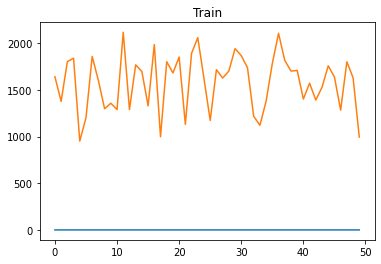

2/2 [==============================] - 1s 4ms/step


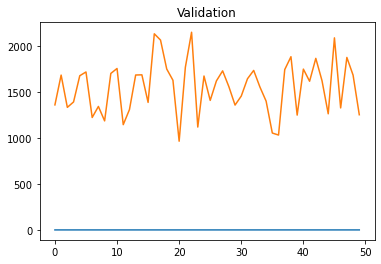

3/3 [==============================] - 0s 5ms/step


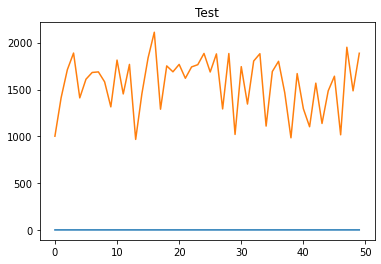

3/3 [==============================] - 0s 7ms/step


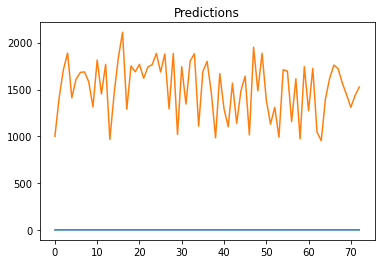

In [5]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
gru_mse = plot_predictions1(model,x_test, y_test)

### LSTM

Epoch 1/30
1/8 [==>...........................] - ETA: 38s - loss: 2498441.0000 - root_mean_squared_error: 1580.6458

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 18s 2s/step - loss: 2529860.5000 - root_mean_squared_error: 1590.5535 - val_loss: 2503652.5000 - val_root_mean_squared_error: 1582.2935
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 2529778.2500 - root_mean_squared_error: 1590.5277

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2529778.2500 - root_mean_squared_error: 1590.5277 - val_loss: 2503574.0000 - val_root_mean_squared_error: 1582.2687
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 2529698.7500 - root_mean_squared_error: 1590.5027

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2529698.7500 - root_mean_squared_error: 1590.5027 - val_loss: 2503492.5000 - val_root_mean_squared_error: 1582.2429
Epoch 4/30
5/8 [=================>............] - ETA: 0s - loss: 2529185.5000 - root_mean_squared_error: 1590.3413

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 8s 1s/step - loss: 2529611.7500 - root_mean_squared_error: 1590.4753 - val_loss: 2503388.7500 - val_root_mean_squared_error: 1582.2101
Epoch 5/30
1/8 [==>...........................] - ETA: 0s - loss: 2543256.0000 - root_mean_squared_error: 1594.7589

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 2529479.5000 - root_mean_squared_error: 1590.4337 - val_loss: 2503149.7500 - val_root_mean_squared_error: 1582.1345
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 2529086.5000 - root_mean_squared_error: 1590.3102

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 8s 1s/step - loss: 2529086.5000 - root_mean_squared_error: 1590.3102 - val_loss: 2502573.5000 - val_root_mean_squared_error: 1581.9524
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 2528564.0000 - root_mean_squared_error: 1590.1459

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2528564.0000 - root_mean_squared_error: 1590.1459 - val_loss: 2502225.0000 - val_root_mean_squared_error: 1581.8423
Epoch 8/30
4/8 [==============>...............] - ETA: 0s - loss: 2575581.7500 - root_mean_squared_error: 1604.8619

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 2528307.0000 - root_mean_squared_error: 1590.0651 - val_loss: 2502035.7500 - val_root_mean_squared_error: 1581.7825
Epoch 9/30
1/8 [==>...........................] - ETA: 0s - loss: 2567845.7500 - root_mean_squared_error: 1602.4500

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2528068.2500 - root_mean_squared_error: 1589.9900 - val_loss: 2501632.2500 - val_root_mean_squared_error: 1581.6549
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 2527529.7500 - root_mean_squared_error: 1589.8207

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2527529.7500 - root_mean_squared_error: 1589.8207 - val_loss: 2500807.2500 - val_root_mean_squared_error: 1581.3940
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 2526353.7500 - root_mean_squared_error: 1589.4508

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2526353.7500 - root_mean_squared_error: 1589.4508 - val_loss: 2499472.0000 - val_root_mean_squared_error: 1580.9718
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 2545232.5000 - root_mean_squared_error: 1595.3785

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2525509.2500 - root_mean_squared_error: 1589.1851 - val_loss: 2499241.0000 - val_root_mean_squared_error: 1580.8988
Epoch 13/30
6/8 [=====================>........] - ETA: 0s - loss: 2558131.5000 - root_mean_squared_error: 1599.4160

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2525350.0000 - root_mean_squared_error: 1589.1350 - val_loss: 2499125.0000 - val_root_mean_squared_error: 1580.8621
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 2909366.5000 - root_mean_squared_error: 1705.6865

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2525240.5000 - root_mean_squared_error: 1589.1006 - val_loss: 2499020.7500 - val_root_mean_squared_error: 1580.8291
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 2525137.5000 - root_mean_squared_error: 1589.0681

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 2525137.5000 - root_mean_squared_error: 1589.0681 - val_loss: 2498920.5000 - val_root_mean_squared_error: 1580.7974
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 2516297.2500 - root_mean_squared_error: 1586.2841

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2525037.5000 - root_mean_squared_error: 1589.0366 - val_loss: 2498821.7500 - val_root_mean_squared_error: 1580.7662
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 2524939.7500 - root_mean_squared_error: 1589.0059

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 2524939.7500 - root_mean_squared_error: 1589.0059 - val_loss: 2498723.7500 - val_root_mean_squared_error: 1580.7352
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 2524842.0000 - root_mean_squared_error: 1588.9751

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2524842.0000 - root_mean_squared_error: 1588.9751 - val_loss: 2498626.0000 - val_root_mean_squared_error: 1580.7042
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 2426350.0000 - root_mean_squared_error: 1557.6746

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2524741.2500 - root_mean_squared_error: 1588.9435 - val_loss: 2498518.0000 - val_root_mean_squared_error: 1580.6702
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 2508338.5000 - root_mean_squared_error: 1583.7736

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2524606.2500 - root_mean_squared_error: 1588.9010 - val_loss: 2498283.0000 - val_root_mean_squared_error: 1580.5958
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 2612781.7500 - root_mean_squared_error: 1616.4102

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2524260.5000 - root_mean_squared_error: 1588.7921 - val_loss: 2497887.5000 - val_root_mean_squared_error: 1580.4707
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 2523979.2500 - root_mean_squared_error: 1588.7036

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2523979.2500 - root_mean_squared_error: 1588.7036 - val_loss: 2497744.0000 - val_root_mean_squared_error: 1580.4253
Epoch 23/30
6/8 [=====================>........] - ETA: 0s - loss: 2541221.2500 - root_mean_squared_error: 1594.1208

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2523854.7500 - root_mean_squared_error: 1588.6644 - val_loss: 2497630.2500 - val_root_mean_squared_error: 1580.3893
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 2523743.0000 - root_mean_squared_error: 1588.6293

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2523743.0000 - root_mean_squared_error: 1588.6293 - val_loss: 2497520.7500 - val_root_mean_squared_error: 1580.3546
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 2367057.0000 - root_mean_squared_error: 1538.5243

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2523634.2500 - root_mean_squared_error: 1588.5951 - val_loss: 2497413.0000 - val_root_mean_squared_error: 1580.3206
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 2523527.5000 - root_mean_squared_error: 1588.5614

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2523527.5000 - root_mean_squared_error: 1588.5614 - val_loss: 2497306.7500 - val_root_mean_squared_error: 1580.2869
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 2523421.2500 - root_mean_squared_error: 1588.5280

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2523421.2500 - root_mean_squared_error: 1588.5280 - val_loss: 2497201.0000 - val_root_mean_squared_error: 1580.2534
Epoch 28/30
6/8 [=====================>........] - ETA: 0s - loss: 2497077.7500 - root_mean_squared_error: 1580.2145

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2523315.2500 - root_mean_squared_error: 1588.4946 - val_loss: 2497096.0000 - val_root_mean_squared_error: 1580.2202
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 2523211.0000 - root_mean_squared_error: 1588.4618

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2523211.0000 - root_mean_squared_error: 1588.4618 - val_loss: 2496990.5000 - val_root_mean_squared_error: 1580.1869
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 2523105.5000 - root_mean_squared_error: 1588.4286

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 1s 3ms/step


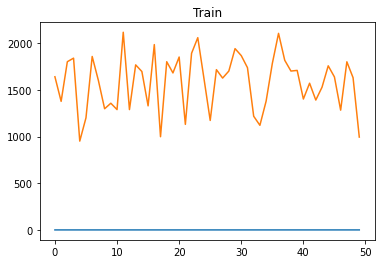

2/2 [==============================] - 1s 5ms/step


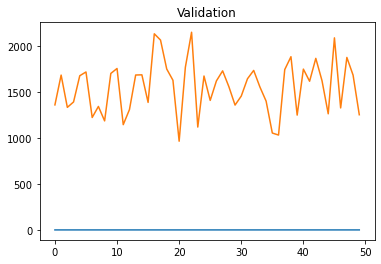

3/3 [==============================] - 0s 4ms/step


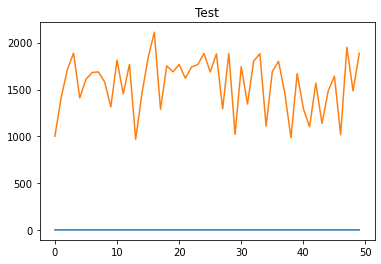

3/3 [==============================] - 0s 4ms/step


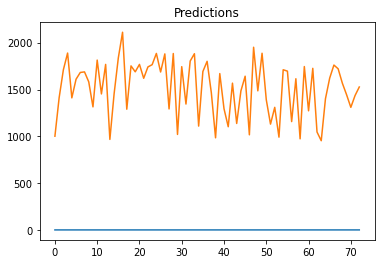

In [6]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
lstm_mse = plot_predictions1(model,x_test, y_test)

### RNN

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 2538846.5000 - root_mean_squared_error: 1593.3759 INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 620ms/step - loss: 2529236.2500 - root_mean_squared_error: 1590.3573 - val_loss: 2502981.5000 - val_root_mean_squared_error: 1582.0814
Epoch 2/30
5/8 [=================>............] - ETA: 0s - loss: 2500650.0000 - root_mean_squared_error: 1581.3444INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 603ms/step - loss: 2529074.2500 - root_mean_squared_error: 1590.3064 - val_loss: 2502819.2500 - val_root_mean_squared_error: 1582.0302
Epoch 3/30
5/8 [=================>............] - ETA: 0s - loss: 2493654.5000 - root_mean_squared_error: 1579.1310INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 576ms/step - loss: 2528912.2500 - root_mean_squared_error: 1590.2554 - val_loss: 2502657.7500 - val_root_mean_squared_error: 1581.9790
Epoch 4/30
1/8 [==>...........................] - ETA: 0s - loss: 2538217.0000 - root_mean_squared_error: 1593.1782INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 597ms/step - loss: 2528749.7500 - root_mean_squared_error: 1590.2043 - val_loss: 2502495.2500 - val_root_mean_squared_error: 1581.9277
Epoch 5/30
5/8 [=================>............] - ETA: 0s - loss: 2581746.5000 - root_mean_squared_error: 1606.7814INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 504ms/step - loss: 2528588.5000 - root_mean_squared_error: 1590.1536 - val_loss: 2502332.7500 - val_root_mean_squared_error: 1581.8763
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 2859349.0000 - root_mean_squared_error: 1690.9609INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 752ms/step - loss: 2528426.0000 - root_mean_squared_error: 1590.1025 - val_loss: 2502170.7500 - val_root_mean_squared_error: 1581.8251
Epoch 7/30
1/8 [==>...........................] - ETA: 0s - loss: 2662420.0000 - root_mean_squared_error: 1631.6924INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 559ms/step - loss: 2528263.7500 - root_mean_squared_error: 1590.0515 - val_loss: 2502009.5000 - val_root_mean_squared_error: 1581.7742
Epoch 8/30
1/8 [==>...........................] - ETA: 0s - loss: 2359146.0000 - root_mean_squared_error: 1535.9512INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 612ms/step - loss: 2528102.0000 - root_mean_squared_error: 1590.0006 - val_loss: 2501847.7500 - val_root_mean_squared_error: 1581.7230
Epoch 9/30
1/8 [==>...........................] - ETA: 0s - loss: 2346663.2500 - root_mean_squared_error: 1531.8822INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 557ms/step - loss: 2527940.5000 - root_mean_squared_error: 1589.9498 - val_loss: 2501687.0000 - val_root_mean_squared_error: 1581.6722
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 2516219.2500 - root_mean_squared_error: 1586.2595INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 584ms/step - loss: 2527779.0000 - root_mean_squared_error: 1589.8990 - val_loss: 2501525.5000 - val_root_mean_squared_error: 1581.6212
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 2527617.7500 - root_mean_squared_error: 1589.8484INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 560ms/step - loss: 2527617.7500 - root_mean_squared_error: 1589.8484 - val_loss: 2501363.0000 - val_root_mean_squared_error: 1581.5698
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 2527455.5000 - root_mean_squared_error: 1589.7974INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 663ms/step - loss: 2527455.5000 - root_mean_squared_error: 1589.7974 - val_loss: 2501200.5000 - val_root_mean_squared_error: 1581.5184
Epoch 13/30
1/8 [==>...........................] - ETA: 0s - loss: 2410794.2500 - root_mean_squared_error: 1552.6732INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 662ms/step - loss: 2527294.2500 - root_mean_squared_error: 1589.7466 - val_loss: 2501039.2500 - val_root_mean_squared_error: 1581.4674
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 2467678.7500 - root_mean_squared_error: 1570.8846INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 501ms/step - loss: 2527132.2500 - root_mean_squared_error: 1589.6957 - val_loss: 2500878.0000 - val_root_mean_squared_error: 1581.4165
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 2470331.5000 - root_mean_squared_error: 1571.7289INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 3s 436ms/step - loss: 2526971.2500 - root_mean_squared_error: 1589.6450 - val_loss: 2500716.7500 - val_root_mean_squared_error: 1581.3655
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 2526120.2500 - root_mean_squared_error: 1589.3773INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 3s 461ms/step - loss: 2526809.0000 - root_mean_squared_error: 1589.5940 - val_loss: 2500555.5000 - val_root_mean_squared_error: 1581.3145
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 2560395.5000 - root_mean_squared_error: 1600.1235INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 506ms/step - loss: 2526648.2500 - root_mean_squared_error: 1589.5435 - val_loss: 2500393.5000 - val_root_mean_squared_error: 1581.2633
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 2508760.0000 - root_mean_squared_error: 1583.9066INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 3s 412ms/step - loss: 2526486.0000 - root_mean_squared_error: 1589.4924 - val_loss: 2500231.5000 - val_root_mean_squared_error: 1581.2120
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 2526323.5000 - root_mean_squared_error: 1589.4413INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 3s 443ms/step - loss: 2526323.5000 - root_mean_squared_error: 1589.4413 - val_loss: 2500070.2500 - val_root_mean_squared_error: 1581.1610
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 2502814.0000 - root_mean_squared_error: 1582.0284INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 3s 441ms/step - loss: 2526163.5000 - root_mean_squared_error: 1589.3909 - val_loss: 2499909.5000 - val_root_mean_squared_error: 1581.1102
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 2603150.5000 - root_mean_squared_error: 1613.4282INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 608ms/step - loss: 2526000.7500 - root_mean_squared_error: 1589.3397 - val_loss: 2499747.2500 - val_root_mean_squared_error: 1581.0590
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 2515748.5000 - root_mean_squared_error: 1586.1111INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 555ms/step - loss: 2525839.2500 - root_mean_squared_error: 1589.2889 - val_loss: 2499583.7500 - val_root_mean_squared_error: 1581.0072
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 2815969.7500 - root_mean_squared_error: 1678.0851INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 528ms/step - loss: 2525676.2500 - root_mean_squared_error: 1589.2377 - val_loss: 2499420.7500 - val_root_mean_squared_error: 1580.9557
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 2469651.2500 - root_mean_squared_error: 1571.5125INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 546ms/step - loss: 2525512.7500 - root_mean_squared_error: 1589.1862 - val_loss: 2499259.0000 - val_root_mean_squared_error: 1580.9045
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 2525520.2500 - root_mean_squared_error: 1589.1886INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 517ms/step - loss: 2525351.2500 - root_mean_squared_error: 1589.1354 - val_loss: 2499096.5000 - val_root_mean_squared_error: 1580.8531
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 2522908.0000 - root_mean_squared_error: 1588.3665INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 579ms/step - loss: 2525188.5000 - root_mean_squared_error: 1589.0842 - val_loss: 2498934.5000 - val_root_mean_squared_error: 1580.8019
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 3202685.0000 - root_mean_squared_error: 1789.6047INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 547ms/step - loss: 2525028.2500 - root_mean_squared_error: 1589.0337 - val_loss: 2498772.5000 - val_root_mean_squared_error: 1580.7506
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 2484493.7500 - root_mean_squared_error: 1576.2277INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 505ms/step - loss: 2524864.5000 - root_mean_squared_error: 1588.9822 - val_loss: 2498612.5000 - val_root_mean_squared_error: 1580.7000
Epoch 29/30
5/8 [=================>............] - ETA: 0s - loss: 2575500.5000 - root_mean_squared_error: 1604.8365INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 525ms/step - loss: 2524705.5000 - root_mean_squared_error: 1588.9321 - val_loss: 2498450.2500 - val_root_mean_squared_error: 1580.6487
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 2598384.5000 - root_mean_squared_error: 1611.9506INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 1s 5ms/step


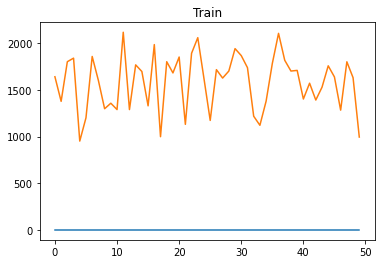

2/2 [==============================] - 0s 6ms/step


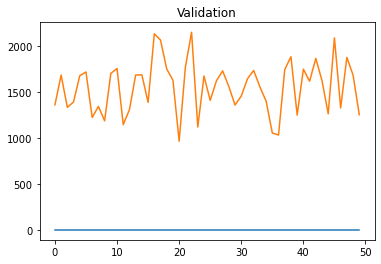

3/3 [==============================] - 0s 38ms/step


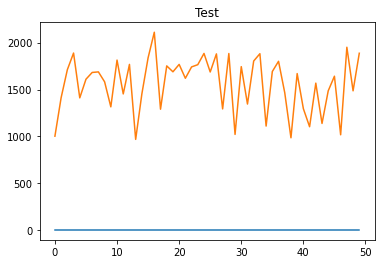

3/3 [==============================] - 0s 3ms/step


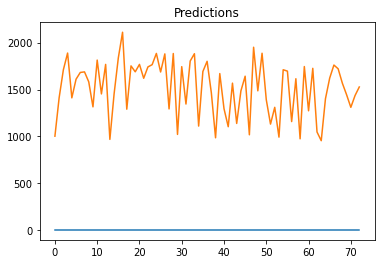

In [7]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
rnn_mse = plot_predictions1(model,x_test, y_test)

# Moving Average

In [8]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=x_train)
target = y_train[window_size - 1:].flatten()

#### CNN

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 1656248.0000 - root_mean_squared_error: 1286.9530 

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 298ms/step - loss: 1656248.0000 - root_mean_squared_error: 1286.9530 - val_loss: 1529135.5000 - val_root_mean_squared_error: 1236.5822
Epoch 2/30
1/8 [==>...........................] - ETA: 0s - loss: 1368849.0000 - root_mean_squared_error: 1169.9781

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 214ms/step - loss: 1521851.3750 - root_mean_squared_error: 1233.6334 - val_loss: 1398713.8750 - val_root_mean_squared_error: 1182.6724
Epoch 3/30
5/8 [=================>............] - ETA: 0s - loss: 1414966.6250 - root_mean_squared_error: 1189.5237

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 229ms/step - loss: 1395907.1250 - root_mean_squared_error: 1181.4851 - val_loss: 1275321.1250 - val_root_mean_squared_error: 1129.3011
Epoch 4/30
1/8 [==>...........................] - ETA: 0s - loss: 1510802.7500 - root_mean_squared_error: 1229.1472

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 269ms/step - loss: 1277559.0000 - root_mean_squared_error: 1130.2915 - val_loss: 1158934.1250 - val_root_mean_squared_error: 1076.5381
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 1164075.2500 - root_mean_squared_error: 1078.9232

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 237ms/step - loss: 1164684.6250 - root_mean_squared_error: 1079.2056 - val_loss: 1050235.8750 - val_root_mean_squared_error: 1024.8102
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 1053670.3750 - root_mean_squared_error: 1026.4845

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 192ms/step - loss: 1060587.3750 - root_mean_squared_error: 1029.8483 - val_loss: 948793.6250 - val_root_mean_squared_error: 974.0604
Epoch 7/30
1/8 [==>...........................] - ETA: 0s - loss: 1030188.8125 - root_mean_squared_error: 1014.9822

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 203ms/step - loss: 964165.4375 - root_mean_squared_error: 981.9193 - val_loss: 854592.5625 - val_root_mean_squared_error: 924.4418
Epoch 8/30
1/8 [==>...........................] - ETA: 0s - loss: 902290.9375 - root_mean_squared_error: 949.8900

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 203ms/step - loss: 873274.5625 - root_mean_squared_error: 934.4916 - val_loss: 766747.5625 - val_root_mean_squared_error: 875.6412
Epoch 9/30
1/8 [==>...........................] - ETA: 0s - loss: 834125.0000 - root_mean_squared_error: 913.3044

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 214ms/step - loss: 789531.5000 - root_mean_squared_error: 888.5558 - val_loss: 688221.5000 - val_root_mean_squared_error: 829.5912
Epoch 10/30
1/8 [==>...........................] - ETA: 0s - loss: 654186.1875 - root_mean_squared_error: 808.8177

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 204ms/step - loss: 716519.8125 - root_mean_squared_error: 846.4749 - val_loss: 619996.1875 - val_root_mean_squared_error: 787.3984
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 646572.8750 - root_mean_squared_error: 804.0975

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 204ms/step - loss: 650898.3125 - root_mean_squared_error: 806.7827 - val_loss: 555089.8750 - val_root_mean_squared_error: 745.0435
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 592711.6250 - root_mean_squared_error: 769.8777

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 217ms/step - loss: 588777.6875 - root_mean_squared_error: 767.3185 - val_loss: 494652.7812 - val_root_mean_squared_error: 703.3156
Epoch 13/30
1/8 [==>...........................] - ETA: 0s - loss: 430682.5000 - root_mean_squared_error: 656.2640

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 306ms/step - loss: 531019.4375 - root_mean_squared_error: 728.7108 - val_loss: 437573.6562 - val_root_mean_squared_error: 661.4935
Epoch 14/30
6/8 [=====================>........] - ETA: 0s - loss: 473990.3438 - root_mean_squared_error: 688.4695

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 246ms/step - loss: 466997.2812 - root_mean_squared_error: 683.3720 - val_loss: 361928.3750 - val_root_mean_squared_error: 601.6049
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 403362.1875 - root_mean_squared_error: 635.1080

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 201ms/step - loss: 392749.8438 - root_mean_squared_error: 626.6976 - val_loss: 290131.9375 - val_root_mean_squared_error: 538.6390
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 336851.3125 - root_mean_squared_error: 580.3889

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 256ms/step - loss: 326939.0938 - root_mean_squared_error: 571.7859 - val_loss: 229116.3594 - val_root_mean_squared_error: 478.6610
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 375555.0312 - root_mean_squared_error: 612.8254

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 240ms/step - loss: 270842.1875 - root_mean_squared_error: 520.4250 - val_loss: 179428.3125 - val_root_mean_squared_error: 423.5898
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 235179.3750 - root_mean_squared_error: 484.9530

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 256ms/step - loss: 225317.4844 - root_mean_squared_error: 474.6762 - val_loss: 138917.8594 - val_root_mean_squared_error: 372.7168
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 209484.5469 - root_mean_squared_error: 457.6948

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 248ms/step - loss: 187957.4375 - root_mean_squared_error: 433.5406 - val_loss: 106288.5000 - val_root_mean_squared_error: 326.0192
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 200171.2656 - root_mean_squared_error: 447.4050

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 214ms/step - loss: 158880.1250 - root_mean_squared_error: 398.5977 - val_loss: 80178.1719 - val_root_mean_squared_error: 283.1575
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 70935.0000 - root_mean_squared_error: 266.3362

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 280ms/step - loss: 135201.2812 - root_mean_squared_error: 367.6973 - val_loss: 59894.6406 - val_root_mean_squared_error: 244.7338
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 81915.5781 - root_mean_squared_error: 286.2090

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 268ms/step - loss: 117682.8359 - root_mean_squared_error: 343.0493 - val_loss: 44398.1211 - val_root_mean_squared_error: 210.7086
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 152400.0938 - root_mean_squared_error: 390.3846

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 369ms/step - loss: 104308.1953 - root_mean_squared_error: 322.9678 - val_loss: 32996.8398 - val_root_mean_squared_error: 181.6503
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 77210.9688 - root_mean_squared_error: 277.8686

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 298ms/step - loss: 94063.5703 - root_mean_squared_error: 306.6978 - val_loss: 24926.3555 - val_root_mean_squared_error: 157.8808
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 101692.8750 - root_mean_squared_error: 318.8932

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 283ms/step - loss: 86834.2266 - root_mean_squared_error: 294.6765 - val_loss: 18808.4531 - val_root_mean_squared_error: 137.1439
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 82353.2891 - root_mean_squared_error: 286.9726

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 281ms/step - loss: 81123.7344 - root_mean_squared_error: 284.8223 - val_loss: 13765.1074 - val_root_mean_squared_error: 117.3248
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 65741.5781 - root_mean_squared_error: 256.4012

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 224ms/step - loss: 76801.1562 - root_mean_squared_error: 277.1302 - val_loss: 10548.1504 - val_root_mean_squared_error: 102.7042
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 70834.6484 - root_mean_squared_error: 266.1478

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 262ms/step - loss: 73838.2969 - root_mean_squared_error: 271.7320 - val_loss: 8060.9180 - val_root_mean_squared_error: 89.7826
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 69029.2891 - root_mean_squared_error: 262.7343

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 251ms/step - loss: 71770.1719 - root_mean_squared_error: 267.8996 - val_loss: 6322.9287 - val_root_mean_squared_error: 79.5168
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 63115.5625 - root_mean_squared_error: 251.2281

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 0s 3ms/step


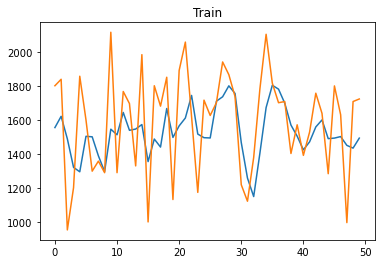

2/2 [==============================] - 0s 4ms/step


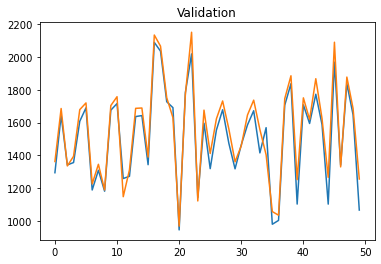

3/3 [==============================] - 0s 3ms/step


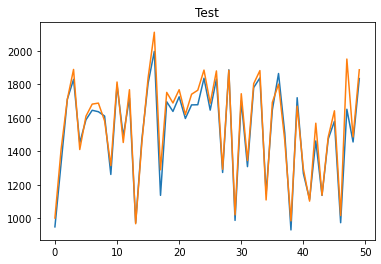

3/3 [==============================] - 0s 3ms/step


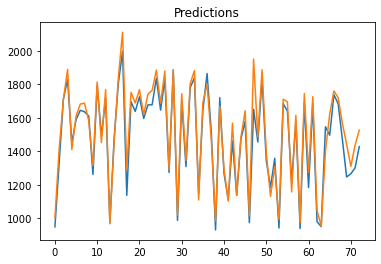

In [9]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_cnn_mse = plot_predictions1(model,x_test, y_test)

#### GRU

Epoch 1/30
1/8 [==>...........................] - ETA: 37s - loss: 2520425.0000 - root_mean_squared_error: 1587.5846

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 14s 1s/step - loss: 2529204.5000 - root_mean_squared_error: 1590.3473 - val_loss: 2500829.2500 - val_root_mean_squared_error: 1581.4010
Epoch 2/30
5/8 [=================>............] - ETA: 0s - loss: 2463894.7500 - root_mean_squared_error: 1569.6798

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2529007.5000 - root_mean_squared_error: 1590.2854 - val_loss: 2500710.2500 - val_root_mean_squared_error: 1581.3634
Epoch 3/30
6/8 [=====================>........] - ETA: 0s - loss: 2485000.7500 - root_mean_squared_error: 1576.3885

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 2528902.7500 - root_mean_squared_error: 1590.2524 - val_loss: 2500617.5000 - val_root_mean_squared_error: 1581.3341
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 2524357.5000 - root_mean_squared_error: 1588.8226

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 7s 952ms/step - loss: 2528814.0000 - root_mean_squared_error: 1590.2245 - val_loss: 2500529.5000 - val_root_mean_squared_error: 1581.3063
Epoch 5/30
1/8 [==>...........................] - ETA: 0s - loss: 2798927.0000 - root_mean_squared_error: 1672.9994

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 7s 999ms/step - loss: 2528727.2500 - root_mean_squared_error: 1590.1973 - val_loss: 2500439.2500 - val_root_mean_squared_error: 1581.2778
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 2530920.2500 - root_mean_squared_error: 1590.8866

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 7s 1s/step - loss: 2528633.7500 - root_mean_squared_error: 1590.1678 - val_loss: 2500331.0000 - val_root_mean_squared_error: 1581.2435
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 2524772.5000 - root_mean_squared_error: 1588.9532

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2528497.0000 - root_mean_squared_error: 1590.1249 - val_loss: 2500114.5000 - val_root_mean_squared_error: 1581.1749
Epoch 8/30
4/8 [==============>...............] - ETA: 0s - loss: 2586584.2500 - root_mean_squared_error: 1608.2861

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2528176.0000 - root_mean_squared_error: 1590.0239 - val_loss: 2499666.5000 - val_root_mean_squared_error: 1581.0333
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 2527816.0000 - root_mean_squared_error: 1589.9106

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 2527816.0000 - root_mean_squared_error: 1589.9106 - val_loss: 2499504.5000 - val_root_mean_squared_error: 1580.9822
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 2541366.7500 - root_mean_squared_error: 1594.1665

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2527700.7500 - root_mean_squared_error: 1589.8744 - val_loss: 2499415.5000 - val_root_mean_squared_error: 1580.9540
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 2533579.7500 - root_mean_squared_error: 1591.7223

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 2527613.2500 - root_mean_squared_error: 1589.8469 - val_loss: 2499328.5000 - val_root_mean_squared_error: 1580.9265
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 2528309.7500 - root_mean_squared_error: 1590.0659

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 2527526.5000 - root_mean_squared_error: 1589.8197 - val_loss: 2499242.0000 - val_root_mean_squared_error: 1580.8992
Epoch 13/30
5/8 [=================>............] - ETA: 0s - loss: 2477606.7500 - root_mean_squared_error: 1574.0415

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2527439.7500 - root_mean_squared_error: 1589.7924 - val_loss: 2499155.5000 - val_root_mean_squared_error: 1580.8717
Epoch 14/30
6/8 [=====================>........] - ETA: 0s - loss: 2510346.2500 - root_mean_squared_error: 1584.4072

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2527353.2500 - root_mean_squared_error: 1589.7651 - val_loss: 2499069.0000 - val_root_mean_squared_error: 1580.8444
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 2538430.5000 - root_mean_squared_error: 1593.2452

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2527267.2500 - root_mean_squared_error: 1589.7382 - val_loss: 2498983.0000 - val_root_mean_squared_error: 1580.8171
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 2624955.0000 - root_mean_squared_error: 1620.1713

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 2527181.5000 - root_mean_squared_error: 1589.7112 - val_loss: 2498896.5000 - val_root_mean_squared_error: 1580.7898
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 2527094.5000 - root_mean_squared_error: 1589.6837

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2527094.5000 - root_mean_squared_error: 1589.6837 - val_loss: 2498811.0000 - val_root_mean_squared_error: 1580.7628
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 2529004.5000 - root_mean_squared_error: 1590.2844

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2527008.7500 - root_mean_squared_error: 1589.6569 - val_loss: 2498725.0000 - val_root_mean_squared_error: 1580.7356
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 2526923.5000 - root_mean_squared_error: 1589.6300

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2526923.5000 - root_mean_squared_error: 1589.6300 - val_loss: 2498639.0000 - val_root_mean_squared_error: 1580.7084
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 2339356.0000 - root_mean_squared_error: 1529.4954

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2526836.5000 - root_mean_squared_error: 1589.6027 - val_loss: 2498552.5000 - val_root_mean_squared_error: 1580.6810
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 2526751.0000 - root_mean_squared_error: 1589.5757

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2526751.0000 - root_mean_squared_error: 1589.5757 - val_loss: 2498466.7500 - val_root_mean_squared_error: 1580.6539
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 2753894.5000 - root_mean_squared_error: 1659.4862

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2526664.7500 - root_mean_squared_error: 1589.5486 - val_loss: 2498381.0000 - val_root_mean_squared_error: 1580.6268
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 2526579.5000 - root_mean_squared_error: 1589.5217

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2526579.5000 - root_mean_squared_error: 1589.5217 - val_loss: 2498295.7500 - val_root_mean_squared_error: 1580.5999
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 2531519.7500 - root_mean_squared_error: 1591.0751

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2526494.0000 - root_mean_squared_error: 1589.4949 - val_loss: 2498210.0000 - val_root_mean_squared_error: 1580.5726
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 2803167.0000 - root_mean_squared_error: 1674.2661

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2526408.5000 - root_mean_squared_error: 1589.4680 - val_loss: 2498124.7500 - val_root_mean_squared_error: 1580.5457
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 2520016.5000 - root_mean_squared_error: 1587.4559

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2526322.7500 - root_mean_squared_error: 1589.4410 - val_loss: 2498039.2500 - val_root_mean_squared_error: 1580.5187
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 2526237.0000 - root_mean_squared_error: 1589.4141

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2526237.0000 - root_mean_squared_error: 1589.4141 - val_loss: 2497953.7500 - val_root_mean_squared_error: 1580.4916
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 2526181.7500 - root_mean_squared_error: 1589.3966

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2526151.5000 - root_mean_squared_error: 1589.3872 - val_loss: 2497868.7500 - val_root_mean_squared_error: 1580.4647
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 2518631.5000 - root_mean_squared_error: 1587.0197

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2526066.7500 - root_mean_squared_error: 1589.3605 - val_loss: 2497783.2500 - val_root_mean_squared_error: 1580.4376
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 2525981.2500 - root_mean_squared_error: 1589.3336

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 1s 4ms/step


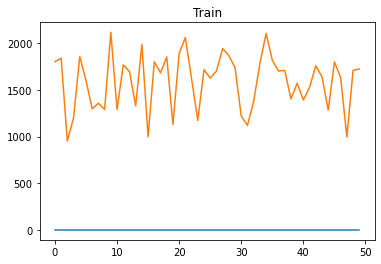

2/2 [==============================] - 1s 6ms/step


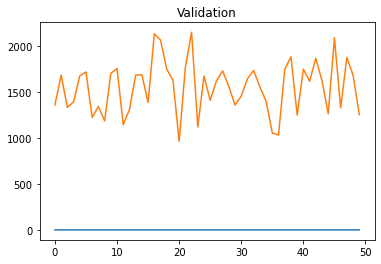

3/3 [==============================] - 0s 4ms/step


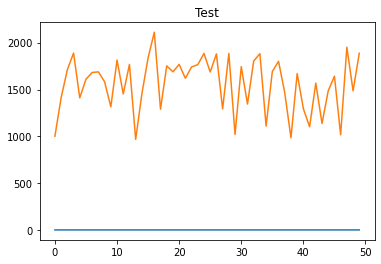

3/3 [==============================] - 0s 5ms/step


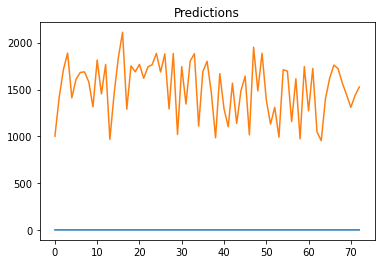

In [10]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_gru/', save_best_only=True)
model = fit_model(model, cp, epochs,  moving_avg_data, target, x_val, y_val)

plot_train("mavg_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_gru_mse = plot_predictions1(model,x_test, y_test)

#### LSTM

Epoch 1/30
4/8 [==============>...............] - ETA: 0s - loss: 2527421.0000 - root_mean_squared_error: 1589.7865 

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2532845.2500 - root_mean_squared_error: 1591.4916 - val_loss: 2504573.2500 - val_root_mean_squared_error: 1582.5844
Epoch 2/30
1/8 [==>...........................] - ETA: 0s - loss: 2721707.5000 - root_mean_squared_error: 1649.7599

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2532777.7500 - root_mean_squared_error: 1591.4703 - val_loss: 2504494.5000 - val_root_mean_squared_error: 1582.5594
Epoch 3/30
1/8 [==>...........................] - ETA: 0s - loss: 2641427.2500 - root_mean_squared_error: 1625.2468

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2532705.0000 - root_mean_squared_error: 1591.4475 - val_loss: 2504439.7500 - val_root_mean_squared_error: 1582.5422
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 2538361.5000 - root_mean_squared_error: 1593.2236

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2532663.2500 - root_mean_squared_error: 1591.4343 - val_loss: 2504409.7500 - val_root_mean_squared_error: 1582.5327
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 2532502.2500 - root_mean_squared_error: 1591.3838

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2532629.2500 - root_mean_squared_error: 1591.4237 - val_loss: 2504359.7500 - val_root_mean_squared_error: 1582.5168
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 2532895.2500 - root_mean_squared_error: 1591.5072

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2532552.5000 - root_mean_squared_error: 1591.3995 - val_loss: 2504232.0000 - val_root_mean_squared_error: 1582.4766
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 2532420.0000 - root_mean_squared_error: 1591.3579

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2532420.0000 - root_mean_squared_error: 1591.3579 - val_loss: 2504137.5000 - val_root_mean_squared_error: 1582.4467
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 2532357.5000 - root_mean_squared_error: 1591.3383

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2532357.5000 - root_mean_squared_error: 1591.3383 - val_loss: 2504106.2500 - val_root_mean_squared_error: 1582.4368
Epoch 9/30
5/8 [=================>............] - ETA: 0s - loss: 2567683.0000 - root_mean_squared_error: 1602.3992

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2532332.0000 - root_mean_squared_error: 1591.3302 - val_loss: 2504084.5000 - val_root_mean_squared_error: 1582.4299
Epoch 10/30
5/8 [=================>............] - ETA: 0s - loss: 2485240.7500 - root_mean_squared_error: 1576.4646

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2532310.2500 - root_mean_squared_error: 1591.3235 - val_loss: 2504059.7500 - val_root_mean_squared_error: 1582.4221
Epoch 11/30
5/8 [=================>............] - ETA: 0s - loss: 2586787.5000 - root_mean_squared_error: 1608.3494

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2532277.5000 - root_mean_squared_error: 1591.3131 - val_loss: 2504006.5000 - val_root_mean_squared_error: 1582.4053
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 2532236.5000 - root_mean_squared_error: 1591.3003

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2532236.5000 - root_mean_squared_error: 1591.3003 - val_loss: 2503990.5000 - val_root_mean_squared_error: 1582.4003
Epoch 13/30
1/8 [==>...........................] - ETA: 0s - loss: 2339211.5000 - root_mean_squared_error: 1529.4481

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2532213.5000 - root_mean_squared_error: 1591.2930 - val_loss: 2503958.0000 - val_root_mean_squared_error: 1582.3900
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 2700327.5000 - root_mean_squared_error: 1643.2673

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2532183.0000 - root_mean_squared_error: 1591.2834 - val_loss: 2503932.7500 - val_root_mean_squared_error: 1582.3820
Epoch 15/30
6/8 [=====================>........] - ETA: 0s - loss: 2573028.0000 - root_mean_squared_error: 1604.0660

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 2532159.5000 - root_mean_squared_error: 1591.2760 - val_loss: 2503910.0000 - val_root_mean_squared_error: 1582.3748
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 2544088.0000 - root_mean_squared_error: 1595.0198

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2532135.7500 - root_mean_squared_error: 1591.2686 - val_loss: 2503887.5000 - val_root_mean_squared_error: 1582.3677
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 2651391.0000 - root_mean_squared_error: 1628.3092

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2532112.7500 - root_mean_squared_error: 1591.2614 - val_loss: 2503863.7500 - val_root_mean_squared_error: 1582.3602
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 2164764.0000 - root_mean_squared_error: 1471.3137

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2532085.5000 - root_mean_squared_error: 1591.2528 - val_loss: 2503823.2500 - val_root_mean_squared_error: 1582.3474
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 2303116.0000 - root_mean_squared_error: 1517.6021

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2532019.7500 - root_mean_squared_error: 1591.2322 - val_loss: 2503682.7500 - val_root_mean_squared_error: 1582.3030
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 2369351.0000 - root_mean_squared_error: 1539.2697

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2531859.2500 - root_mean_squared_error: 1591.1818 - val_loss: 2503587.0000 - val_root_mean_squared_error: 1582.2727
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 2531811.5000 - root_mean_squared_error: 1591.1667

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2531811.5000 - root_mean_squared_error: 1591.1667 - val_loss: 2503563.2500 - val_root_mean_squared_error: 1582.2653
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 2552165.7500 - root_mean_squared_error: 1597.5499

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2531788.5000 - root_mean_squared_error: 1591.1594 - val_loss: 2503541.0000 - val_root_mean_squared_error: 1582.2582
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 2531620.0000 - root_mean_squared_error: 1591.1066

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2531765.7500 - root_mean_squared_error: 1591.1523 - val_loss: 2503517.2500 - val_root_mean_squared_error: 1582.2507
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 2540489.7500 - root_mean_squared_error: 1593.8914

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2531743.5000 - root_mean_squared_error: 1591.1454 - val_loss: 2503496.7500 - val_root_mean_squared_error: 1582.2443
Epoch 25/30
6/8 [=====================>........] - ETA: 0s - loss: 2516527.7500 - root_mean_squared_error: 1586.3568

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2531722.5000 - root_mean_squared_error: 1591.1388 - val_loss: 2503475.7500 - val_root_mean_squared_error: 1582.2375
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 2660746.2500 - root_mean_squared_error: 1631.1794

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 8s 1s/step - loss: 2531701.7500 - root_mean_squared_error: 1591.1322 - val_loss: 2503455.2500 - val_root_mean_squared_error: 1582.2311
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 2549677.7500 - root_mean_squared_error: 1596.7710

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 8s 1s/step - loss: 2531681.2500 - root_mean_squared_error: 1591.1257 - val_loss: 2503434.5000 - val_root_mean_squared_error: 1582.2245
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 2457818.7500 - root_mean_squared_error: 1567.7432

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 7s 940ms/step - loss: 2531660.2500 - root_mean_squared_error: 1591.1191 - val_loss: 2503413.7500 - val_root_mean_squared_error: 1582.2180
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 2596355.5000 - root_mean_squared_error: 1611.3210

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 8s 1s/step - loss: 2531638.7500 - root_mean_squared_error: 1591.1124 - val_loss: 2503388.2500 - val_root_mean_squared_error: 1582.2100
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 2681047.5000 - root_mean_squared_error: 1637.3905

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 1s 4ms/step


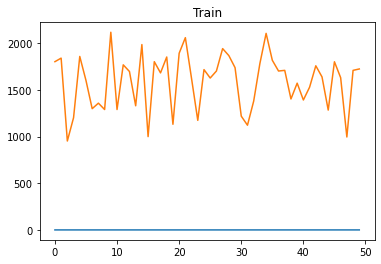

2/2 [==============================] - 1s 6ms/step


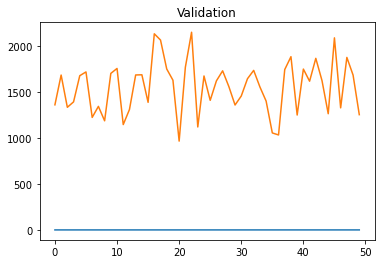

3/3 [==============================] - 0s 3ms/step


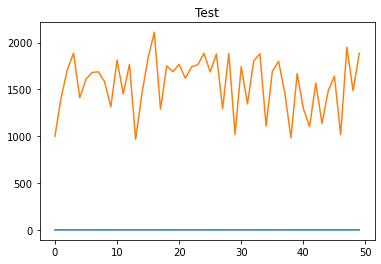

3/3 [==============================] - 0s 5ms/step


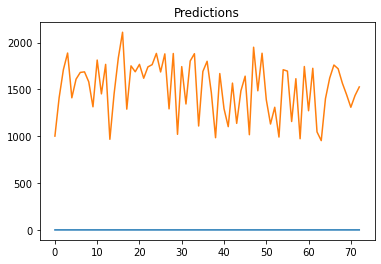

In [11]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_lstm_mse = plot_predictions1(model,x_test, y_test)

Epoch 1/30
1/8 [==>...........................] - ETA: 16s - loss: 2658006.7500 - root_mean_squared_error: 1630.3395INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 859ms/step - loss: 2535762.0000 - root_mean_squared_error: 1592.4076 - val_loss: 2507425.7500 - val_root_mean_squared_error: 1583.4854
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 2521358.5000 - root_mean_squared_error: 1587.8787INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 576ms/step - loss: 2535599.5000 - root_mean_squared_error: 1592.3566 - val_loss: 2507263.5000 - val_root_mean_squared_error: 1583.4341
Epoch 3/30
1/8 [==>...........................] - ETA: 0s - loss: 2481457.2500 - root_mean_squared_error: 1575.2642INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 564ms/step - loss: 2535437.7500 - root_mean_squared_error: 1592.3058 - val_loss: 2507101.0000 - val_root_mean_squared_error: 1583.3828
Epoch 4/30
6/8 [=====================>........] - ETA: 0s - loss: 2549107.7500 - root_mean_squared_error: 1596.5925INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 603ms/step - loss: 2535274.7500 - root_mean_squared_error: 1592.2546 - val_loss: 2506939.2500 - val_root_mean_squared_error: 1583.3317
Epoch 5/30
6/8 [=====================>........] - ETA: 0s - loss: 2565370.0000 - root_mean_squared_error: 1601.6772INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 776ms/step - loss: 2535113.0000 - root_mean_squared_error: 1592.2039 - val_loss: 2506776.7500 - val_root_mean_squared_error: 1583.2804
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 2534950.2500 - root_mean_squared_error: 1592.1527INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 528ms/step - loss: 2534950.2500 - root_mean_squared_error: 1592.1527 - val_loss: 2506615.2500 - val_root_mean_squared_error: 1583.2294
Epoch 7/30
6/8 [=====================>........] - ETA: 0s - loss: 2494031.2500 - root_mean_squared_error: 1579.2502INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 3s 488ms/step - loss: 2534787.2500 - root_mean_squared_error: 1592.1016 - val_loss: 2506452.7500 - val_root_mean_squared_error: 1583.1781
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 2517185.5000 - root_mean_squared_error: 1586.5641INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 3s 473ms/step - loss: 2534624.7500 - root_mean_squared_error: 1592.0505 - val_loss: 2506290.2500 - val_root_mean_squared_error: 1583.1267
Epoch 9/30
1/8 [==>...........................] - ETA: 0s - loss: 2534608.5000 - root_mean_squared_error: 1592.0454INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 521ms/step - loss: 2534462.5000 - root_mean_squared_error: 1591.9995 - val_loss: 2506127.2500 - val_root_mean_squared_error: 1583.0752
Epoch 10/30
1/8 [==>...........................] - ETA: 0s - loss: 2367194.0000 - root_mean_squared_error: 1538.5688INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 657ms/step - loss: 2534300.0000 - root_mean_squared_error: 1591.9485 - val_loss: 2505965.7500 - val_root_mean_squared_error: 1583.0243
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 2534139.0000 - root_mean_squared_error: 1591.8979INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 728ms/step - loss: 2534139.0000 - root_mean_squared_error: 1591.8979 - val_loss: 2505805.0000 - val_root_mean_squared_error: 1582.9735
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 2853517.5000 - root_mean_squared_error: 1689.2357INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 593ms/step - loss: 2533978.0000 - root_mean_squared_error: 1591.8474 - val_loss: 2505643.0000 - val_root_mean_squared_error: 1582.9222
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 2533816.7500 - root_mean_squared_error: 1591.7968INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 598ms/step - loss: 2533816.7500 - root_mean_squared_error: 1591.7968 - val_loss: 2505481.0000 - val_root_mean_squared_error: 1582.8711
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 2905631.0000 - root_mean_squared_error: 1704.5912INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 769ms/step - loss: 2533655.5000 - root_mean_squared_error: 1591.7461 - val_loss: 2505319.2500 - val_root_mean_squared_error: 1582.8201
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 2730354.2500 - root_mean_squared_error: 1652.3784INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 546ms/step - loss: 2533492.5000 - root_mean_squared_error: 1591.6948 - val_loss: 2505158.0000 - val_root_mean_squared_error: 1582.7690
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 2323456.0000 - root_mean_squared_error: 1524.2887INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 652ms/step - loss: 2533330.7500 - root_mean_squared_error: 1591.6440 - val_loss: 2504997.7500 - val_root_mean_squared_error: 1582.7185
Epoch 17/30
6/8 [=====================>........] - ETA: 0s - loss: 2513982.7500 - root_mean_squared_error: 1585.5544INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 629ms/step - loss: 2533170.5000 - root_mean_squared_error: 1591.5938 - val_loss: 2504837.2500 - val_root_mean_squared_error: 1582.6677
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 2533010.5000 - root_mean_squared_error: 1591.5435INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 518ms/step - loss: 2533010.5000 - root_mean_squared_error: 1591.5435 - val_loss: 2504675.0000 - val_root_mean_squared_error: 1582.6165
Epoch 19/30
6/8 [=====================>........] - ETA: 0s - loss: 2527468.7500 - root_mean_squared_error: 1589.8015INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 692ms/step - loss: 2532848.7500 - root_mean_squared_error: 1591.4927 - val_loss: 2504515.5000 - val_root_mean_squared_error: 1582.5662
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 2690853.5000 - root_mean_squared_error: 1640.3821INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 533ms/step - loss: 2532688.7500 - root_mean_squared_error: 1591.4424 - val_loss: 2504353.7500 - val_root_mean_squared_error: 1582.5150
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 2532525.2500 - root_mean_squared_error: 1591.3910INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 589ms/step - loss: 2532525.2500 - root_mean_squared_error: 1591.3910 - val_loss: 2504192.0000 - val_root_mean_squared_error: 1582.4639
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 2391692.5000 - root_mean_squared_error: 1546.5098INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 3s 487ms/step - loss: 2532363.2500 - root_mean_squared_error: 1591.3401 - val_loss: 2504030.0000 - val_root_mean_squared_error: 1582.4128
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 2520881.0000 - root_mean_squared_error: 1587.7283INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 663ms/step - loss: 2532202.7500 - root_mean_squared_error: 1591.2897 - val_loss: 2503869.5000 - val_root_mean_squared_error: 1582.3621
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 2601877.5000 - root_mean_squared_error: 1613.0337INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 531ms/step - loss: 2532042.0000 - root_mean_squared_error: 1591.2391 - val_loss: 2503707.5000 - val_root_mean_squared_error: 1582.3108
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 2531879.5000 - root_mean_squared_error: 1591.1881INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 576ms/step - loss: 2531879.5000 - root_mean_squared_error: 1591.1881 - val_loss: 2503546.5000 - val_root_mean_squared_error: 1582.2599
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 2532707.2500 - root_mean_squared_error: 1591.4481INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 614ms/step - loss: 2531718.5000 - root_mean_squared_error: 1591.1375 - val_loss: 2503386.0000 - val_root_mean_squared_error: 1582.2092
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 2531557.7500 - root_mean_squared_error: 1591.0869INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 552ms/step - loss: 2531557.7500 - root_mean_squared_error: 1591.0869 - val_loss: 2503224.2500 - val_root_mean_squared_error: 1582.1581
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2531396.2500 - root_mean_squared_error: 1591.0363INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 592ms/step - loss: 2531396.2500 - root_mean_squared_error: 1591.0363 - val_loss: 2503062.2500 - val_root_mean_squared_error: 1582.1069
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 2594811.0000 - root_mean_squared_error: 1610.8417INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 558ms/step - loss: 2531233.2500 - root_mean_squared_error: 1590.9850 - val_loss: 2502900.5000 - val_root_mean_squared_error: 1582.0558
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 2507087.5000 - root_mean_squared_error: 1583.3785INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 0s 3ms/step


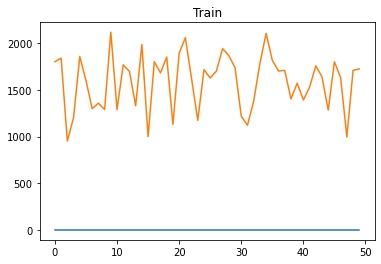

2/2 [==============================] - 0s 4ms/step


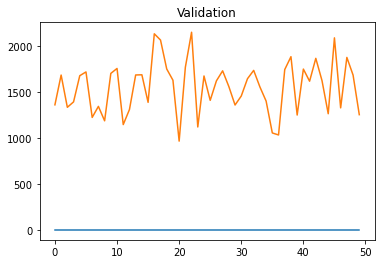

3/3 [==============================] - 0s 3ms/step


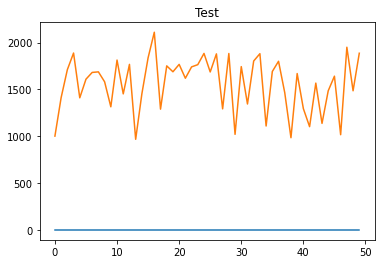

3/3 [==============================] - 0s 4ms/step


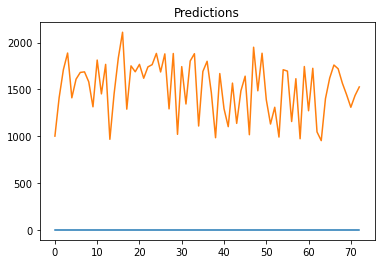

In [12]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_rnn_mse = plot_predictions1(model,x_test, y_test)

# AutoEncoder

### CNN

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 3852968.0000 - root_mean_squared_error: 1962.8978 

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 393ms/step - loss: 3852968.0000 - root_mean_squared_error: 1962.8978 - val_loss: 3627450.5000 - val_root_mean_squared_error: 1904.5867
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 3424954.0000 - root_mean_squared_error: 1850.6631

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 370ms/step - loss: 3428465.5000 - root_mean_squared_error: 1851.6116 - val_loss: 3117306.0000 - val_root_mean_squared_error: 1765.5895
Epoch 3/30
6/8 [=====================>........] - ETA: 0s - loss: 3066829.2500 - root_mean_squared_error: 1751.2365

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 2s 344ms/step - loss: 3043556.5000 - root_mean_squared_error: 1744.5792 - val_loss: 2657229.2500 - val_root_mean_squared_error: 1630.1010
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 2475575.2500 - root_mean_squared_error: 1573.3961

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 368ms/step - loss: 2470156.5000 - root_mean_squared_error: 1571.6731 - val_loss: 2247783.0000 - val_root_mean_squared_error: 1499.2609
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2182708.0000 - root_mean_squared_error: 1477.3990

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 456ms/step - loss: 2182708.0000 - root_mean_squared_error: 1477.3990 - val_loss: 1872008.5000 - val_root_mean_squared_error: 1368.2136
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 1911762.3750 - root_mean_squared_error: 1382.6649

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 2s 311ms/step - loss: 1900946.8750 - root_mean_squared_error: 1378.7483 - val_loss: 1543759.8750 - val_root_mean_squared_error: 1242.4813
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 1522796.1250 - root_mean_squared_error: 1234.0162

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 2s 349ms/step - loss: 1512953.2500 - root_mean_squared_error: 1230.0216 - val_loss: 1285648.5000 - val_root_mean_squared_error: 1133.8644
Epoch 8/30
6/8 [=====================>........] - ETA: 0s - loss: 1254678.2500 - root_mean_squared_error: 1120.1243

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 2s 304ms/step - loss: 1274841.3750 - root_mean_squared_error: 1129.0887 - val_loss: 1115069.0000 - val_root_mean_squared_error: 1055.9683
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 1130822.2500 - root_mean_squared_error: 1063.4012

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 413ms/step - loss: 1130822.2500 - root_mean_squared_error: 1063.4012 - val_loss: 940029.1250 - val_root_mean_squared_error: 969.5510
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 1016684.4375 - root_mean_squared_error: 1008.3077

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 502ms/step - loss: 1015662.1250 - root_mean_squared_error: 1007.8007 - val_loss: 775754.8750 - val_root_mean_squared_error: 880.7695
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 812653.5000 - root_mean_squared_error: 901.4730

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 512ms/step - loss: 815399.6250 - root_mean_squared_error: 902.9948 - val_loss: 627224.0000 - val_root_mean_squared_error: 791.9747
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 681732.8750 - root_mean_squared_error: 825.6711

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 461ms/step - loss: 683281.8750 - root_mean_squared_error: 826.6086 - val_loss: 495968.4688 - val_root_mean_squared_error: 704.2503
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 512310.6250 - root_mean_squared_error: 715.7588

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 407ms/step - loss: 512310.6250 - root_mean_squared_error: 715.7588 - val_loss: 385657.1875 - val_root_mean_squared_error: 621.0131
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 462995.3125 - root_mean_squared_error: 680.4376

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 361ms/step - loss: 412525.1562 - root_mean_squared_error: 642.2812 - val_loss: 293658.7188 - val_root_mean_squared_error: 541.9029
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 358155.9375 - root_mean_squared_error: 598.4613

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 430ms/step - loss: 358155.9375 - root_mean_squared_error: 598.4613 - val_loss: 216034.8594 - val_root_mean_squared_error: 464.7955
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 331484.1875 - root_mean_squared_error: 575.7466

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 401ms/step - loss: 303638.5938 - root_mean_squared_error: 551.0341 - val_loss: 152958.1719 - val_root_mean_squared_error: 391.0987
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 199704.6094 - root_mean_squared_error: 446.8832

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 475ms/step - loss: 195270.3438 - root_mean_squared_error: 441.8940 - val_loss: 105356.1562 - val_root_mean_squared_error: 324.5861
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 167690.1875 - root_mean_squared_error: 409.4999

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 2s 305ms/step - loss: 177753.6094 - root_mean_squared_error: 421.6084 - val_loss: 70776.5312 - val_root_mean_squared_error: 266.0386
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 119279.6250 - root_mean_squared_error: 345.3688

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 2s 330ms/step - loss: 147785.3281 - root_mean_squared_error: 384.4286 - val_loss: 46400.3203 - val_root_mean_squared_error: 215.4073
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 150091.0938 - root_mean_squared_error: 387.4159

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 2s 326ms/step - loss: 137090.0625 - root_mean_squared_error: 370.2567 - val_loss: 29348.7305 - val_root_mean_squared_error: 171.3147
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 110511.8828 - root_mean_squared_error: 332.4333

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 435ms/step - loss: 109280.4531 - root_mean_squared_error: 330.5759 - val_loss: 18318.5508 - val_root_mean_squared_error: 135.3460
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 81024.5859 - root_mean_squared_error: 284.6482

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 2s 338ms/step - loss: 88560.9531 - root_mean_squared_error: 297.5919 - val_loss: 11240.2197 - val_root_mean_squared_error: 106.0199
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 166095.5312 - root_mean_squared_error: 407.5482

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 2s 289ms/step - loss: 103249.3672 - root_mean_squared_error: 321.3244 - val_loss: 7531.0117 - val_root_mean_squared_error: 86.7814
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 78719.6719 - root_mean_squared_error: 280.5703

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 2s 270ms/step - loss: 90886.6953 - root_mean_squared_error: 301.4742 - val_loss: 5649.6426 - val_root_mean_squared_error: 75.1641
Epoch 25/30
5/8 [=================>............] - ETA: 0s - loss: 85223.7891 - root_mean_squared_error: 291.9312 

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 2s 257ms/step - loss: 90761.6797 - root_mean_squared_error: 301.2668 - val_loss: 4844.6060 - val_root_mean_squared_error: 69.6032
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 60955.0195 - root_mean_squared_error: 246.8907

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 365ms/step - loss: 77190.1094 - root_mean_squared_error: 277.8311 - val_loss: 4593.5322 - val_root_mean_squared_error: 67.7756
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 82022.8359 - root_mean_squared_error: 286.3963 

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 453ms/step - loss: 81701.1016 - root_mean_squared_error: 285.8340 - val_loss: 4218.8008 - val_root_mean_squared_error: 64.9523
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 80585.2578 - root_mean_squared_error: 283.8754

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 500ms/step - loss: 78874.3906 - root_mean_squared_error: 280.8459 - val_loss: 3851.7888 - val_root_mean_squared_error: 62.0628
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 101139.3281 - root_mean_squared_error: 318.0241

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 715ms/step - loss: 101139.3281 - root_mean_squared_error: 318.0241 - val_loss: 3611.7246 - val_root_mean_squared_error: 60.0976
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 68146.2656 - root_mean_squared_error: 261.0484

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 1s 15ms/step


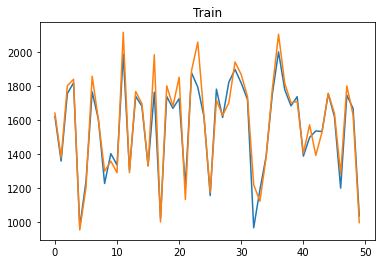

2/2 [==============================] - 0s 13ms/step


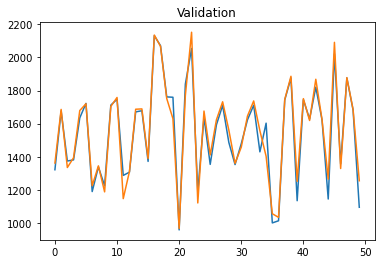

3/3 [==============================] - 0s 6ms/step


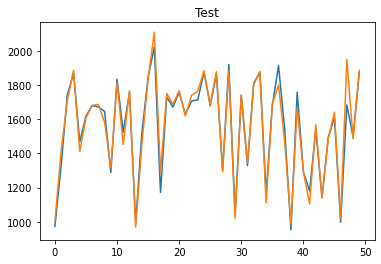

3/3 [==============================] - 0s 9ms/step


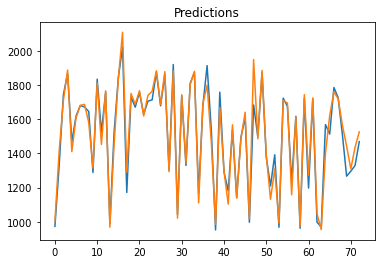

In [13]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [14]:
auto_cnn_mse

3914.6505054410495

### GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 2527927.2500 - root_mean_squared_error: 1589.9457

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 18s 2s/step - loss: 2527927.2500 - root_mean_squared_error: 1589.9457 - val_loss: 2501584.0000 - val_root_mean_squared_error: 1581.6396
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 2521213.2500 - root_mean_squared_error: 1587.8329

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2527588.5000 - root_mean_squared_error: 1589.8391 - val_loss: 2501371.0000 - val_root_mean_squared_error: 1581.5723
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 2516212.2500 - root_mean_squared_error: 1586.2573

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2527408.2500 - root_mean_squared_error: 1589.7825 - val_loss: 2501242.5000 - val_root_mean_squared_error: 1581.5317
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 2518870.5000 - root_mean_squared_error: 1587.0950

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2527259.7500 - root_mean_squared_error: 1589.7357 - val_loss: 2501139.5000 - val_root_mean_squared_error: 1581.4991
Epoch 5/30
6/8 [=====================>........] - ETA: 0s - loss: 2520252.2500 - root_mean_squared_error: 1587.5303

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2527263.0000 - root_mean_squared_error: 1589.7368 - val_loss: 2501047.2500 - val_root_mean_squared_error: 1581.4700
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 2670947.2500 - root_mean_squared_error: 1634.3033

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2527117.5000 - root_mean_squared_error: 1589.6910 - val_loss: 2500969.5000 - val_root_mean_squared_error: 1581.4454
Epoch 7/30
1/8 [==>...........................] - ETA: 0s - loss: 2169923.5000 - root_mean_squared_error: 1473.0660

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2527236.5000 - root_mean_squared_error: 1589.7284 - val_loss: 2500895.5000 - val_root_mean_squared_error: 1581.4220
Epoch 8/30
1/8 [==>...........................] - ETA: 0s - loss: 2390926.5000 - root_mean_squared_error: 1546.2621

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2526912.7500 - root_mean_squared_error: 1589.6266 - val_loss: 2500818.7500 - val_root_mean_squared_error: 1581.3977
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 2530486.7500 - root_mean_squared_error: 1590.7504

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2527024.2500 - root_mean_squared_error: 1589.6616 - val_loss: 2500718.0000 - val_root_mean_squared_error: 1581.3658
Epoch 10/30
6/8 [=====================>........] - ETA: 0s - loss: 2522389.0000 - root_mean_squared_error: 1588.2031

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2526735.0000 - root_mean_squared_error: 1589.5707 - val_loss: 2500444.2500 - val_root_mean_squared_error: 1581.2793
Epoch 11/30
1/8 [==>...........................] - ETA: 0s - loss: 2386791.2500 - root_mean_squared_error: 1544.9243

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2526252.0000 - root_mean_squared_error: 1589.4187 - val_loss: 2499734.2500 - val_root_mean_squared_error: 1581.0548
Epoch 12/30
5/8 [=================>............] - ETA: 0s - loss: 2588093.7500 - root_mean_squared_error: 1608.7554

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 7s 1s/step - loss: 2525906.2500 - root_mean_squared_error: 1589.3099 - val_loss: 2499563.7500 - val_root_mean_squared_error: 1581.0009
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 2525640.5000 - root_mean_squared_error: 1589.2264

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2525640.5000 - root_mean_squared_error: 1589.2264 - val_loss: 2499485.7500 - val_root_mean_squared_error: 1580.9762
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 2525603.2500 - root_mean_squared_error: 1589.2147

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2525603.2500 - root_mean_squared_error: 1589.2147 - val_loss: 2499408.2500 - val_root_mean_squared_error: 1580.9517
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 2525163.0000 - root_mean_squared_error: 1589.0762

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2525462.0000 - root_mean_squared_error: 1589.1702 - val_loss: 2499331.2500 - val_root_mean_squared_error: 1580.9274
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 2516858.2500 - root_mean_squared_error: 1586.4609

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2525608.2500 - root_mean_squared_error: 1589.2162 - val_loss: 2499255.0000 - val_root_mean_squared_error: 1580.9032
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 2525376.0000 - root_mean_squared_error: 1589.1432

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2525376.0000 - root_mean_squared_error: 1589.1432 - val_loss: 2499178.5000 - val_root_mean_squared_error: 1580.8790
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 2475377.0000 - root_mean_squared_error: 1573.3331

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2525360.2500 - root_mean_squared_error: 1589.1382 - val_loss: 2499102.0000 - val_root_mean_squared_error: 1580.8549
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 2524963.2500 - root_mean_squared_error: 1589.0133

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2524963.2500 - root_mean_squared_error: 1589.0133 - val_loss: 2499026.2500 - val_root_mean_squared_error: 1580.8309
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 2525184.2500 - root_mean_squared_error: 1589.0829

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2525184.2500 - root_mean_squared_error: 1589.0829 - val_loss: 2498950.0000 - val_root_mean_squared_error: 1580.8068
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 2348088.7500 - root_mean_squared_error: 1532.3474

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2525121.7500 - root_mean_squared_error: 1589.0631 - val_loss: 2498874.2500 - val_root_mean_squared_error: 1580.7828
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 2533896.2500 - root_mean_squared_error: 1591.8217

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2525007.2500 - root_mean_squared_error: 1589.0271 - val_loss: 2498798.2500 - val_root_mean_squared_error: 1580.7588
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 2525012.5000 - root_mean_squared_error: 1589.0288

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2525012.5000 - root_mean_squared_error: 1589.0288 - val_loss: 2498723.5000 - val_root_mean_squared_error: 1580.7351
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 2412351.7500 - root_mean_squared_error: 1553.1747

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2524780.5000 - root_mean_squared_error: 1588.9558 - val_loss: 2498648.2500 - val_root_mean_squared_error: 1580.7113
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 2525057.5000 - root_mean_squared_error: 1589.0430

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2525057.5000 - root_mean_squared_error: 1589.0430 - val_loss: 2498573.7500 - val_root_mean_squared_error: 1580.6877
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 2530108.7500 - root_mean_squared_error: 1590.6316

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2524581.2500 - root_mean_squared_error: 1588.8931 - val_loss: 2498499.2500 - val_root_mean_squared_error: 1580.6642
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 2476793.0000 - root_mean_squared_error: 1573.7831

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2524572.5000 - root_mean_squared_error: 1588.8904 - val_loss: 2498425.5000 - val_root_mean_squared_error: 1580.6409
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 2700651.5000 - root_mean_squared_error: 1643.3658

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2524534.2500 - root_mean_squared_error: 1588.8783 - val_loss: 2498350.5000 - val_root_mean_squared_error: 1580.6171
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 2524287.5000 - root_mean_squared_error: 1588.8007

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2524287.5000 - root_mean_squared_error: 1588.8007 - val_loss: 2498275.7500 - val_root_mean_squared_error: 1580.5935
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 2641880.2500 - root_mean_squared_error: 1625.3862

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 1s 4ms/step


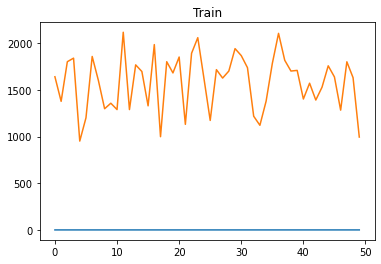

2/2 [==============================] - 1s 5ms/step


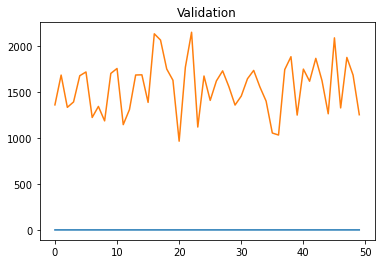

3/3 [==============================] - 0s 4ms/step


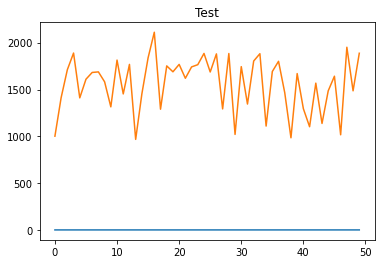

3/3 [==============================] - 0s 4ms/step


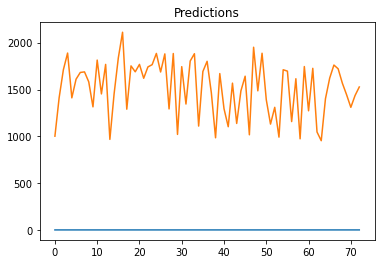

In [15]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [16]:
auto_gru_mse

2373353.634154437

### LSTM

Epoch 1/30
1/8 [==>...........................] - ETA: 32s - loss: 2662705.2500 - root_mean_squared_error: 1631.7798

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2530462.2500 - root_mean_squared_error: 1590.7427 - val_loss: 2504323.7500 - val_root_mean_squared_error: 1582.5055
Epoch 2/30
1/8 [==>...........................] - ETA: 0s - loss: 2298856.5000 - root_mean_squared_error: 1516.1980

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 8s 1s/step - loss: 2530457.5000 - root_mean_squared_error: 1590.7412 - val_loss: 2504291.7500 - val_root_mean_squared_error: 1582.4954
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 2554252.0000 - root_mean_squared_error: 1598.2028

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2530343.0000 - root_mean_squared_error: 1590.7052 - val_loss: 2504257.7500 - val_root_mean_squared_error: 1582.4846
Epoch 4/30
6/8 [=====================>........] - ETA: 0s - loss: 2522128.2500 - root_mean_squared_error: 1588.1210

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2530327.5000 - root_mean_squared_error: 1590.7003 - val_loss: 2504186.0000 - val_root_mean_squared_error: 1582.4620
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2530210.2500 - root_mean_squared_error: 1590.6635

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2530210.2500 - root_mean_squared_error: 1590.6635 - val_loss: 2503983.5000 - val_root_mean_squared_error: 1582.3981
Epoch 6/30
6/8 [=====================>........] - ETA: 0s - loss: 2530635.0000 - root_mean_squared_error: 1590.7970

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2530054.2500 - root_mean_squared_error: 1590.6144 - val_loss: 2503857.0000 - val_root_mean_squared_error: 1582.3580
Epoch 7/30
6/8 [=====================>........] - ETA: 0s - loss: 2539453.2500 - root_mean_squared_error: 1593.5662

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2529940.0000 - root_mean_squared_error: 1590.5785 - val_loss: 2503805.7500 - val_root_mean_squared_error: 1582.3418
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 2529859.5000 - root_mean_squared_error: 1590.5532

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2529859.5000 - root_mean_squared_error: 1590.5532 - val_loss: 2503768.0000 - val_root_mean_squared_error: 1582.3300
Epoch 9/30
5/8 [=================>............] - ETA: 0s - loss: 2574328.0000 - root_mean_squared_error: 1604.4713

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2529851.2500 - root_mean_squared_error: 1590.5507 - val_loss: 2503728.7500 - val_root_mean_squared_error: 1582.3175
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 2520640.5000 - root_mean_squared_error: 1587.6525

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2529780.7500 - root_mean_squared_error: 1590.5284 - val_loss: 2503683.5000 - val_root_mean_squared_error: 1582.3033
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 2529791.5000 - root_mean_squared_error: 1590.5319

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2529791.5000 - root_mean_squared_error: 1590.5319 - val_loss: 2503576.2500 - val_root_mean_squared_error: 1582.2693
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 2529598.0000 - root_mean_squared_error: 1590.4709

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2529598.0000 - root_mean_squared_error: 1590.4709 - val_loss: 2503421.2500 - val_root_mean_squared_error: 1582.2203
Epoch 13/30
1/8 [==>...........................] - ETA: 0s - loss: 2104466.2500 - root_mean_squared_error: 1450.6779

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2529562.5000 - root_mean_squared_error: 1590.4598 - val_loss: 2503362.5000 - val_root_mean_squared_error: 1582.2018
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 2543480.5000 - root_mean_squared_error: 1594.8293

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2529485.7500 - root_mean_squared_error: 1590.4357 - val_loss: 2503322.2500 - val_root_mean_squared_error: 1582.1891
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 2529529.2500 - root_mean_squared_error: 1590.4493

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2529529.2500 - root_mean_squared_error: 1590.4493 - val_loss: 2503279.0000 - val_root_mean_squared_error: 1582.1753
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 2632493.5000 - root_mean_squared_error: 1622.4961

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 2529464.2500 - root_mean_squared_error: 1590.4290 - val_loss: 2503171.7500 - val_root_mean_squared_error: 1582.1415
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 2529170.2500 - root_mean_squared_error: 1590.3365

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 2529170.2500 - root_mean_squared_error: 1590.3365 - val_loss: 2502792.0000 - val_root_mean_squared_error: 1582.0216
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 2528741.7500 - root_mean_squared_error: 1590.2018

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2528741.7500 - root_mean_squared_error: 1590.2018 - val_loss: 2502504.2500 - val_root_mean_squared_error: 1581.9305
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 2543171.5000 - root_mean_squared_error: 1594.7324

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2528594.0000 - root_mean_squared_error: 1590.1554 - val_loss: 2502445.7500 - val_root_mean_squared_error: 1581.9121
Epoch 20/30
5/8 [=================>............] - ETA: 0s - loss: 2442350.7500 - root_mean_squared_error: 1562.8022

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2528616.7500 - root_mean_squared_error: 1590.1625 - val_loss: 2502396.5000 - val_root_mean_squared_error: 1581.8965
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 2776190.0000 - root_mean_squared_error: 1666.1903

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2528592.0000 - root_mean_squared_error: 1590.1547 - val_loss: 2502348.7500 - val_root_mean_squared_error: 1581.8813
Epoch 22/30
5/8 [=================>............] - ETA: 0s - loss: 2503769.5000 - root_mean_squared_error: 1582.3304

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2528403.5000 - root_mean_squared_error: 1590.0955 - val_loss: 2502301.5000 - val_root_mean_squared_error: 1581.8665
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 2528490.5000 - root_mean_squared_error: 1590.1228

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2528490.5000 - root_mean_squared_error: 1590.1228 - val_loss: 2502255.5000 - val_root_mean_squared_error: 1581.8519
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 2550530.5000 - root_mean_squared_error: 1597.0381

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 2528418.7500 - root_mean_squared_error: 1590.1002 - val_loss: 2502210.7500 - val_root_mean_squared_error: 1581.8378
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 2528340.2500 - root_mean_squared_error: 1590.0756

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2528340.2500 - root_mean_squared_error: 1590.0756 - val_loss: 2502166.5000 - val_root_mean_squared_error: 1581.8237
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 2528292.5000 - root_mean_squared_error: 1590.0605

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2528292.5000 - root_mean_squared_error: 1590.0605 - val_loss: 2502123.5000 - val_root_mean_squared_error: 1581.8102
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 2528320.5000 - root_mean_squared_error: 1590.0693

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2528320.5000 - root_mean_squared_error: 1590.0693 - val_loss: 2502080.5000 - val_root_mean_squared_error: 1581.7966
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 2537988.0000 - root_mean_squared_error: 1593.1064

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2528253.0000 - root_mean_squared_error: 1590.0481 - val_loss: 2502037.2500 - val_root_mean_squared_error: 1581.7830
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 2654126.0000 - root_mean_squared_error: 1629.1488

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2528242.7500 - root_mean_squared_error: 1590.0449 - val_loss: 2501995.0000 - val_root_mean_squared_error: 1581.7695
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 2528164.5000 - root_mean_squared_error: 1590.0203

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 2s 4ms/step


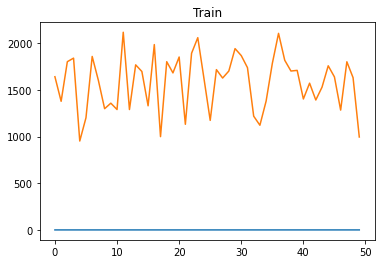

2/2 [==============================] - 1s 5ms/step


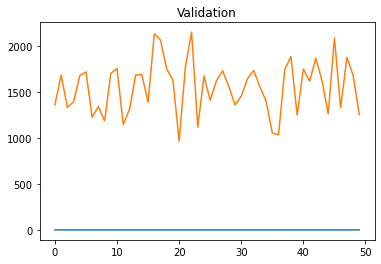

3/3 [==============================] - 0s 4ms/step


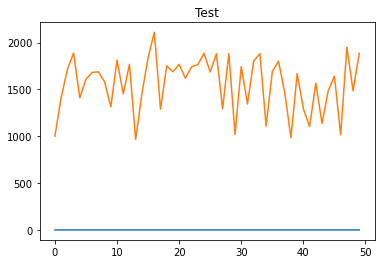

3/3 [==============================] - 0s 5ms/step


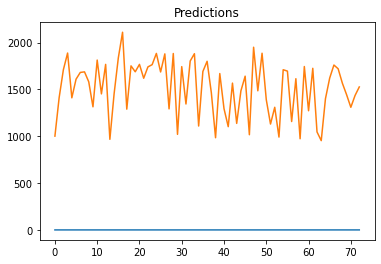

In [17]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
model.add(Dense(8, 'relu'))
model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [18]:
auto_lstm_mse

2377000.5279860185

### RNN

Epoch 1/30
4/8 [==============>...............] - ETA: 0s - loss: 2509726.0000 - root_mean_squared_error: 1584.2114 INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 703ms/step - loss: 2527751.0000 - root_mean_squared_error: 1589.8903 - val_loss: 2501532.5000 - val_root_mean_squared_error: 1581.6234
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 2527405.0000 - root_mean_squared_error: 1589.7814INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 684ms/step - loss: 2527405.0000 - root_mean_squared_error: 1589.7814 - val_loss: 2501287.2500 - val_root_mean_squared_error: 1581.5459
Epoch 3/30
1/8 [==>...........................] - ETA: 0s - loss: 2564695.2500 - root_mean_squared_error: 1601.4666INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 587ms/step - loss: 2527613.5000 - root_mean_squared_error: 1589.8470 - val_loss: 2501114.7500 - val_root_mean_squared_error: 1581.4913
Epoch 4/30
1/8 [==>...........................] - ETA: 0s - loss: 2500557.2500 - root_mean_squared_error: 1581.3151INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 578ms/step - loss: 2527109.2500 - root_mean_squared_error: 1589.6884 - val_loss: 2500951.7500 - val_root_mean_squared_error: 1581.4398
Epoch 5/30
1/8 [==>...........................] - ETA: 0s - loss: 2528690.0000 - root_mean_squared_error: 1590.1855INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 563ms/step - loss: 2526904.2500 - root_mean_squared_error: 1589.6239 - val_loss: 2500790.2500 - val_root_mean_squared_error: 1581.3887
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 2634200.7500 - root_mean_squared_error: 1623.0221INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 3s 463ms/step - loss: 2526873.0000 - root_mean_squared_error: 1589.6141 - val_loss: 2500630.0000 - val_root_mean_squared_error: 1581.3380
Epoch 7/30
5/8 [=================>............] - ETA: 0s - loss: 2555224.5000 - root_mean_squared_error: 1598.5070INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 544ms/step - loss: 2526676.0000 - root_mean_squared_error: 1589.5521 - val_loss: 2500470.0000 - val_root_mean_squared_error: 1581.2875
Epoch 8/30
1/8 [==>...........................] - ETA: 0s - loss: 2557596.5000 - root_mean_squared_error: 1599.2488INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 573ms/step - loss: 2526666.5000 - root_mean_squared_error: 1589.5492 - val_loss: 2500310.5000 - val_root_mean_squared_error: 1581.2371
Epoch 9/30
1/8 [==>...........................] - ETA: 0s - loss: 2227993.7500 - root_mean_squared_error: 1492.6466INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 593ms/step - loss: 2526422.7500 - root_mean_squared_error: 1589.4725 - val_loss: 2500150.5000 - val_root_mean_squared_error: 1581.1864
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 2526743.7500 - root_mean_squared_error: 1589.5735INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 3s 464ms/step - loss: 2526743.7500 - root_mean_squared_error: 1589.5735 - val_loss: 2499991.0000 - val_root_mean_squared_error: 1581.1359
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 2518057.2500 - root_mean_squared_error: 1586.8387INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 520ms/step - loss: 2526231.5000 - root_mean_squared_error: 1589.4124 - val_loss: 2499831.7500 - val_root_mean_squared_error: 1581.0856
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 2437709.0000 - root_mean_squared_error: 1561.3164INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 585ms/step - loss: 2525680.5000 - root_mean_squared_error: 1589.2390 - val_loss: 2499673.7500 - val_root_mean_squared_error: 1581.0356
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 2525892.0000 - root_mean_squared_error: 1589.3055INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 560ms/step - loss: 2525892.0000 - root_mean_squared_error: 1589.3055 - val_loss: 2499516.2500 - val_root_mean_squared_error: 1580.9858
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 2525864.5000 - root_mean_squared_error: 1589.2969INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 3s 421ms/step - loss: 2525864.5000 - root_mean_squared_error: 1589.2969 - val_loss: 2499357.5000 - val_root_mean_squared_error: 1580.9357
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 2336033.0000 - root_mean_squared_error: 1528.4087INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 3s 368ms/step - loss: 2525184.0000 - root_mean_squared_error: 1589.0828 - val_loss: 2499197.7500 - val_root_mean_squared_error: 1580.8851
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 2701174.0000 - root_mean_squared_error: 1643.5249INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 504ms/step - loss: 2524978.5000 - root_mean_squared_error: 1589.0181 - val_loss: 2499037.5000 - val_root_mean_squared_error: 1580.8345
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 2525107.2500 - root_mean_squared_error: 1589.0586INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 504ms/step - loss: 2525107.2500 - root_mean_squared_error: 1589.0586 - val_loss: 2498878.5000 - val_root_mean_squared_error: 1580.7842
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 2524943.0000 - root_mean_squared_error: 1589.0070INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 3s 490ms/step - loss: 2524943.0000 - root_mean_squared_error: 1589.0070 - val_loss: 2498719.5000 - val_root_mean_squared_error: 1580.7339
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 2479392.0000 - root_mean_squared_error: 1574.6085INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 3s 371ms/step - loss: 2525076.7500 - root_mean_squared_error: 1589.0490 - val_loss: 2498559.5000 - val_root_mean_squared_error: 1580.6832
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 2554558.7500 - root_mean_squared_error: 1598.2987INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 3s 453ms/step - loss: 2524545.5000 - root_mean_squared_error: 1588.8818 - val_loss: 2498399.7500 - val_root_mean_squared_error: 1580.6327
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 2659300.0000 - root_mean_squared_error: 1630.7361INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 3s 375ms/step - loss: 2524389.5000 - root_mean_squared_error: 1588.8328 - val_loss: 2498242.2500 - val_root_mean_squared_error: 1580.5829
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 2519293.2500 - root_mean_squared_error: 1587.2281INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 3s 383ms/step - loss: 2524264.2500 - root_mean_squared_error: 1588.7933 - val_loss: 2498082.2500 - val_root_mean_squared_error: 1580.5322
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 2427464.7500 - root_mean_squared_error: 1558.0323INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 3s 475ms/step - loss: 2524078.5000 - root_mean_squared_error: 1588.7349 - val_loss: 2497922.7500 - val_root_mean_squared_error: 1580.4818
Epoch 24/30
5/8 [=================>............] - ETA: 0s - loss: 2535724.5000 - root_mean_squared_error: 1592.3959INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 516ms/step - loss: 2523940.0000 - root_mean_squared_error: 1588.6913 - val_loss: 2497763.2500 - val_root_mean_squared_error: 1580.4314
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 2756657.0000 - root_mean_squared_error: 1660.3184INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 3s 432ms/step - loss: 2524044.7500 - root_mean_squared_error: 1588.7242 - val_loss: 2497604.2500 - val_root_mean_squared_error: 1580.3811
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 2552738.0000 - root_mean_squared_error: 1597.7290INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 3s 408ms/step - loss: 2523534.5000 - root_mean_squared_error: 1588.5636 - val_loss: 2497444.7500 - val_root_mean_squared_error: 1580.3306
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 2615067.0000 - root_mean_squared_error: 1617.1168INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 514ms/step - loss: 2523236.2500 - root_mean_squared_error: 1588.4697 - val_loss: 2497283.7500 - val_root_mean_squared_error: 1580.2797
Epoch 28/30
6/8 [=====================>........] - ETA: 0s - loss: 2523920.7500 - root_mean_squared_error: 1588.6852INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 558ms/step - loss: 2523249.0000 - root_mean_squared_error: 1588.4738 - val_loss: 2497123.2500 - val_root_mean_squared_error: 1580.2289
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 2553702.0000 - root_mean_squared_error: 1598.0306INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 3s 464ms/step - loss: 2523212.5000 - root_mean_squared_error: 1588.4623 - val_loss: 2496963.7500 - val_root_mean_squared_error: 1580.1783
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 2565855.5000 - root_mean_squared_error: 1601.8289INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 0s 4ms/step


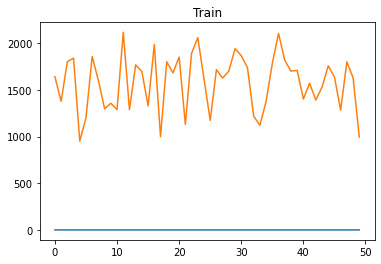

2/2 [==============================] - 0s 4ms/step


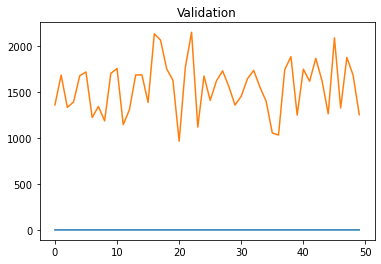

3/3 [==============================] - 0s 4ms/step


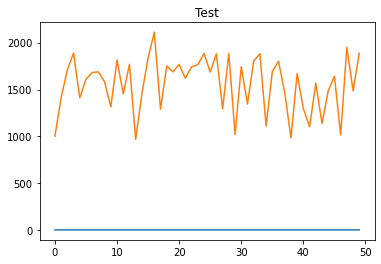

3/3 [==============================] - 0s 4ms/step


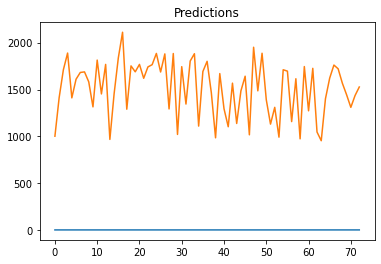

In [19]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [20]:
auto_rnn_mse

2371995.3831843124

# Moving Average with Encoder

### CNN

Epoch 1/10
7/8 [=========================>....] - ETA: 0s - loss: 3093332.2500 - root_mean_squared_error: 1758.7871 

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 427ms/step - loss: 3089599.2500 - root_mean_squared_error: 1757.7256 - val_loss: 3192988.2500 - val_root_mean_squared_error: 1786.8934
Epoch 2/10
6/8 [=====================>........] - ETA: 0s - loss: 2786988.0000 - root_mean_squared_error: 1669.4275

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 2s 327ms/step - loss: 2809548.2500 - root_mean_squared_error: 1676.1707 - val_loss: 2917948.7500 - val_root_mean_squared_error: 1708.2004
Epoch 3/10
8/8 [==============================] - ETA: 0s - loss: 2422177.0000 - root_mean_squared_error: 1556.3345

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 2s 342ms/step - loss: 2422177.0000 - root_mean_squared_error: 1556.3345 - val_loss: 2609104.5000 - val_root_mean_squared_error: 1615.2722
Epoch 4/10
8/8 [==============================] - ETA: 0s - loss: 2187207.0000 - root_mean_squared_error: 1478.9209

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 2s 293ms/step - loss: 2187207.0000 - root_mean_squared_error: 1478.9209 - val_loss: 2230280.2500 - val_root_mean_squared_error: 1493.4122
Epoch 5/10
1/8 [==>...........................] - ETA: 0s - loss: 2163603.0000 - root_mean_squared_error: 1470.9191

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 394ms/step - loss: 1858801.6250 - root_mean_squared_error: 1363.3788 - val_loss: 1758231.7500 - val_root_mean_squared_error: 1325.9833
Epoch 6/10
8/8 [==============================] - ETA: 0s - loss: 1529475.1250 - root_mean_squared_error: 1236.7195

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 2s 296ms/step - loss: 1529475.1250 - root_mean_squared_error: 1236.7195 - val_loss: 1332616.5000 - val_root_mean_squared_error: 1154.3901
Epoch 7/10
6/8 [=====================>........] - ETA: 0s - loss: 1270854.1250 - root_mean_squared_error: 1127.3217

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 392ms/step - loss: 1254896.3750 - root_mean_squared_error: 1120.2216 - val_loss: 958339.8750 - val_root_mean_squared_error: 978.9484
Epoch 8/10
8/8 [==============================] - ETA: 0s - loss: 1051550.1250 - root_mean_squared_error: 1025.4512

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 2s 322ms/step - loss: 1051550.1250 - root_mean_squared_error: 1025.4512 - val_loss: 651874.8125 - val_root_mean_squared_error: 807.3876
Epoch 9/10
1/8 [==>...........................] - ETA: 0s - loss: 959132.0625 - root_mean_squared_error: 979.3529

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 2s 259ms/step - loss: 881326.5625 - root_mean_squared_error: 938.7899 - val_loss: 415232.7188 - val_root_mean_squared_error: 644.3856
Epoch 10/10
7/8 [=========================>....] - ETA: 0s - loss: 711328.3750 - root_mean_squared_error: 843.4028

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 0s 4ms/step


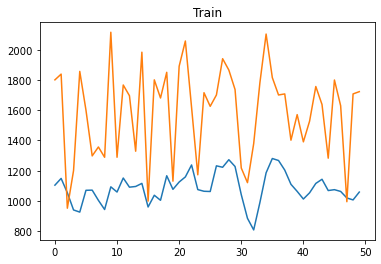

2/2 [==============================] - 0s 15ms/step


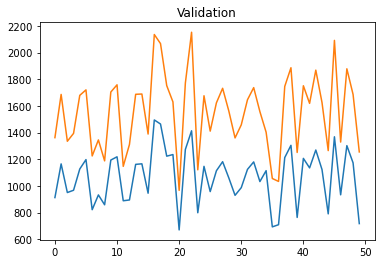

3/3 [==============================] - 0s 12ms/step


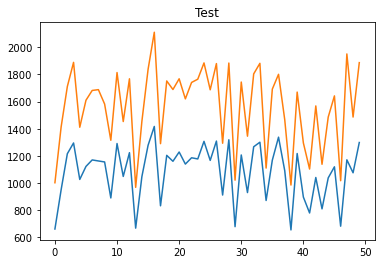

3/3 [==============================] - 0s 11ms/step


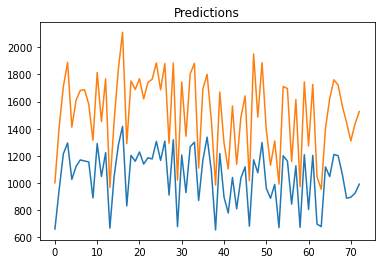

In [21]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, 10, moving_avg_data, target, x_val, y_val)

plot_train("mavg_autoencoder_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [22]:
mavg_auto_cnn_mse

227364.18467028724

### RNN

Epoch 1/10
1/8 [==>...........................] - ETA: 10s - loss: 2298344.5000 - root_mean_squared_error: 1516.0292INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 5s 437ms/step - loss: 2535077.2500 - root_mean_squared_error: 1592.1926 - val_loss: 2506805.7500 - val_root_mean_squared_error: 1583.2896
Epoch 2/10
1/8 [==>...........................] - ETA: 0s - loss: 2485846.0000 - root_mean_squared_error: 1576.6566INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 3s 468ms/step - loss: 2535056.2500 - root_mean_squared_error: 1592.1860 - val_loss: 2506645.7500 - val_root_mean_squared_error: 1583.2390
Epoch 3/10
1/8 [==>...........................] - ETA: 0s - loss: 2712933.5000 - root_mean_squared_error: 1647.0985INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 3s 456ms/step - loss: 2534672.7500 - root_mean_squared_error: 1592.0656 - val_loss: 2506485.7500 - val_root_mean_squared_error: 1583.1885
Epoch 4/10
8/8 [==============================] - ETA: 0s - loss: 2534562.0000 - root_mean_squared_error: 1592.0308INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 3s 493ms/step - loss: 2534562.0000 - root_mean_squared_error: 1592.0308 - val_loss: 2506326.2500 - val_root_mean_squared_error: 1583.1381
Epoch 5/10
1/8 [==>...........................] - ETA: 0s - loss: 2422358.0000 - root_mean_squared_error: 1556.3926INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 3s 396ms/step - loss: 2534348.0000 - root_mean_squared_error: 1591.9636 - val_loss: 2506166.5000 - val_root_mean_squared_error: 1583.0876
Epoch 6/10
1/8 [==>...........................] - ETA: 0s - loss: 2643413.0000 - root_mean_squared_error: 1625.8577INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 3s 457ms/step - loss: 2534235.5000 - root_mean_squared_error: 1591.9282 - val_loss: 2506002.7500 - val_root_mean_squared_error: 1583.0359
Epoch 7/10
1/8 [==>...........................] - ETA: 0s - loss: 2483920.2500 - root_mean_squared_error: 1576.0458INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 3s 437ms/step - loss: 2533732.2500 - root_mean_squared_error: 1591.7701 - val_loss: 2505789.7500 - val_root_mean_squared_error: 1582.9686
Epoch 8/10
1/8 [==>...........................] - ETA: 0s - loss: 2735854.2500 - root_mean_squared_error: 1654.0417INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 3s 462ms/step - loss: 2534384.2500 - root_mean_squared_error: 1591.9750 - val_loss: 2505224.7500 - val_root_mean_squared_error: 1582.7902
Epoch 9/10
1/8 [==>...........................] - ETA: 0s - loss: 2595972.2500 - root_mean_squared_error: 1611.2021INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 3s 454ms/step - loss: 2533148.5000 - root_mean_squared_error: 1591.5868 - val_loss: 2504907.0000 - val_root_mean_squared_error: 1582.6898
Epoch 10/10
8/8 [==============================] - ETA: 0s - loss: 2533216.7500 - root_mean_squared_error: 1591.6083INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 0s 3ms/step


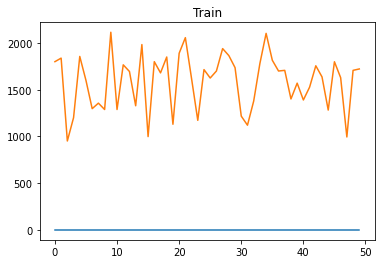

2/2 [==============================] - 1s 5ms/step


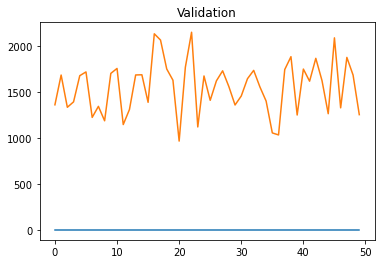

3/3 [==============================] - 0s 4ms/step


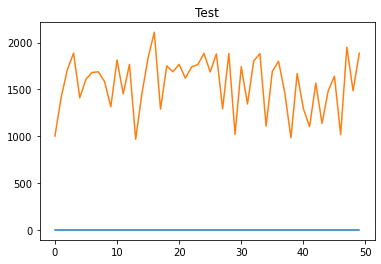

3/3 [==============================] - 0s 4ms/step


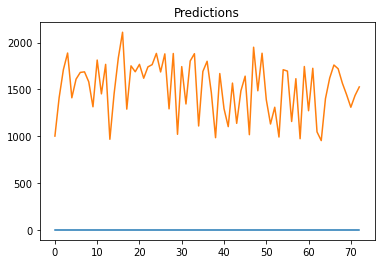

In [23]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_rnn/', save_best_only=True)
model = fit_model(model, cp, 10,moving_avg_data,target, x_val, y_val)


plot_train("mavg_auto_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [24]:
mavg_auto_rnn_mse

2379715.0196385807

### GRU

Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 2534553.5000 - root_mean_squared_error: 1592.0281 

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 14s 1s/step - loss: 2534553.5000 - root_mean_squared_error: 1592.0281 - val_loss: 2506134.5000 - val_root_mean_squared_error: 1583.0775
Epoch 2/10
6/8 [=====================>........] - ETA: 0s - loss: 2508337.5000 - root_mean_squared_error: 1583.7732

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 6s 882ms/step - loss: 2534323.2500 - root_mean_squared_error: 1591.9558 - val_loss: 2505888.5000 - val_root_mean_squared_error: 1582.9999
Epoch 3/10
1/8 [==>...........................] - ETA: 0s - loss: 2475546.5000 - root_mean_squared_error: 1573.3870

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 6s 905ms/step - loss: 2533833.0000 - root_mean_squared_error: 1591.8018 - val_loss: 2505430.5000 - val_root_mean_squared_error: 1582.8552
Epoch 4/10
6/8 [=====================>........] - ETA: 0s - loss: 2536071.2500 - root_mean_squared_error: 1592.5048

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 6s 886ms/step - loss: 2533433.5000 - root_mean_squared_error: 1591.6763 - val_loss: 2505120.0000 - val_root_mean_squared_error: 1582.7571
Epoch 5/10
7/8 [=========================>....] - ETA: 0s - loss: 2543111.7500 - root_mean_squared_error: 1594.7137

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2533499.0000 - root_mean_squared_error: 1591.6969 - val_loss: 2504926.2500 - val_root_mean_squared_error: 1582.6959
Epoch 6/10
1/8 [==>...........................] - ETA: 0s - loss: 2518378.2500 - root_mean_squared_error: 1586.9399

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 2532996.2500 - root_mean_squared_error: 1591.5389 - val_loss: 2504517.7500 - val_root_mean_squared_error: 1582.5668
Epoch 7/10
8/8 [==============================] - ETA: 0s - loss: 2532558.5000 - root_mean_squared_error: 1591.4014

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2532558.5000 - root_mean_squared_error: 1591.4014 - val_loss: 2504231.0000 - val_root_mean_squared_error: 1582.4762
Epoch 8/10
6/8 [=====================>........] - ETA: 0s - loss: 2476272.2500 - root_mean_squared_error: 1573.6176

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2532539.7500 - root_mean_squared_error: 1591.3955 - val_loss: 2504150.5000 - val_root_mean_squared_error: 1582.4508
Epoch 9/10
6/8 [=====================>........] - ETA: 0s - loss: 2530581.2500 - root_mean_squared_error: 1590.7800

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2532435.2500 - root_mean_squared_error: 1591.3627 - val_loss: 2504080.5000 - val_root_mean_squared_error: 1582.4287
Epoch 10/10
1/8 [==>...........................] - ETA: 0s - loss: 2553956.0000 - root_mean_squared_error: 1598.1101

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 2s 4ms/step


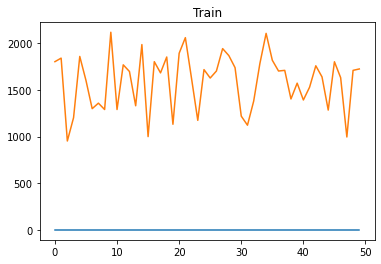

2/2 [==============================] - 1s 10ms/step


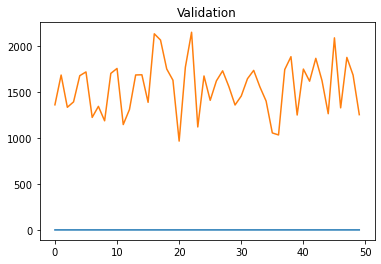

3/3 [==============================] - 0s 4ms/step


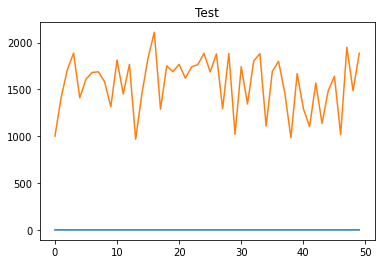

3/3 [==============================] - 0s 5ms/step


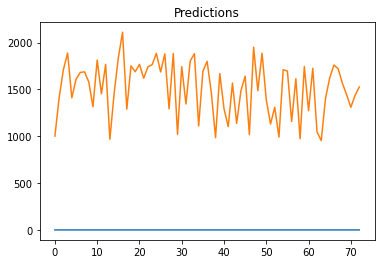

In [25]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_gru/', save_best_only=True)

model = fit_model(model, cp, 10, moving_avg_data, target, x_val, y_val)

plot_train("mavg_auto_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [26]:
mavg_auto_gru_mse

2379000.465181186

### LSTM

Epoch 1/10
5/8 [=================>............] - ETA: 0s - loss: 2534297.5000 - root_mean_squared_error: 1591.9478 

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 18s 2s/step - loss: 2534214.7500 - root_mean_squared_error: 1591.9218 - val_loss: 2506125.2500 - val_root_mean_squared_error: 1583.0746
Epoch 2/10
4/8 [==============>...............] - ETA: 0s - loss: 2491781.2500 - root_mean_squared_error: 1578.5377

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2534329.7500 - root_mean_squared_error: 1591.9579 - val_loss: 2506077.7500 - val_root_mean_squared_error: 1583.0596
Epoch 3/10
6/8 [=====================>........] - ETA: 0s - loss: 2514722.5000 - root_mean_squared_error: 1585.7877

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2534291.0000 - root_mean_squared_error: 1591.9457 - val_loss: 2506029.0000 - val_root_mean_squared_error: 1583.0442
Epoch 4/10
5/8 [=================>............] - ETA: 0s - loss: 2570906.5000 - root_mean_squared_error: 1603.4047

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2534082.5000 - root_mean_squared_error: 1591.8801 - val_loss: 2505972.2500 - val_root_mean_squared_error: 1583.0262
Epoch 5/10
7/8 [=========================>....] - ETA: 0s - loss: 2535080.5000 - root_mean_squared_error: 1592.1936

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2534087.0000 - root_mean_squared_error: 1591.8816 - val_loss: 2505885.2500 - val_root_mean_squared_error: 1582.9988
Epoch 6/10
6/8 [=====================>........] - ETA: 0s - loss: 2509414.7500 - root_mean_squared_error: 1584.1133

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2534171.7500 - root_mean_squared_error: 1591.9082 - val_loss: 2505767.5000 - val_root_mean_squared_error: 1582.9617
Epoch 7/10
8/8 [==============================] - ETA: 0s - loss: 2533772.7500 - root_mean_squared_error: 1591.7828

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2533772.7500 - root_mean_squared_error: 1591.7828 - val_loss: 2505666.7500 - val_root_mean_squared_error: 1582.9298
Epoch 8/10
7/8 [=========================>....] - ETA: 0s - loss: 2538019.7500 - root_mean_squared_error: 1593.1163

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2533770.5000 - root_mean_squared_error: 1591.7822 - val_loss: 2505444.5000 - val_root_mean_squared_error: 1582.8596
Epoch 9/10
8/8 [==============================] - ETA: 0s - loss: 2533603.2500 - root_mean_squared_error: 1591.7296

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2533603.2500 - root_mean_squared_error: 1591.7296 - val_loss: 2504940.2500 - val_root_mean_squared_error: 1582.7003
Epoch 10/10
6/8 [=====================>........] - ETA: 0s - loss: 2572155.5000 - root_mean_squared_error: 1603.7941

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 2s 3ms/step


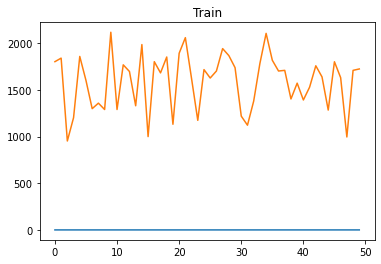

2/2 [==============================] - 1s 4ms/step


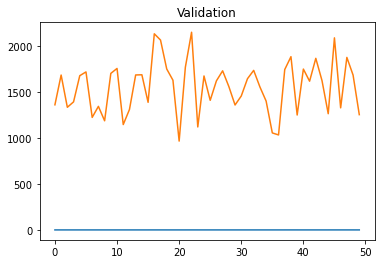

3/3 [==============================] - 0s 7ms/step


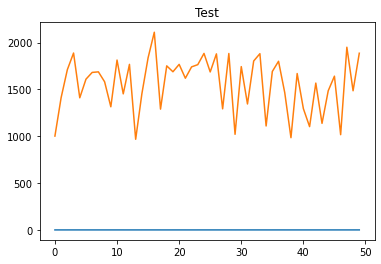

3/3 [==============================] - 0s 4ms/step


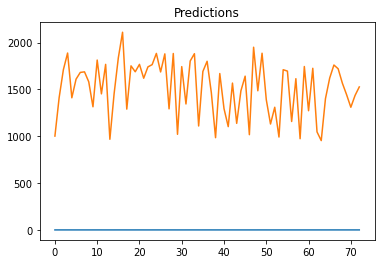

In [27]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
#model.add(Dense(8, 'relu'))
#model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_lstm/', save_best_only=True)
model = fit_model(model, cp, 10,moving_avg_data, target, x_val, y_val)


plot_train("mavg_auto_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [28]:
mavg_auto_lstm_mse

2379335.758765789

# Hybrid

## General

### CNN LSTM

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 2530283.2500 - root_mean_squared_error: 1590.6864

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 34s 3s/step - loss: 2530283.2500 - root_mean_squared_error: 1590.6864 - val_loss: 2503792.2500 - val_root_mean_squared_error: 1582.3375
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 2535094.7500 - root_mean_squared_error: 1592.1981

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2529749.0000 - root_mean_squared_error: 1590.5184 - val_loss: 2503217.7500 - val_root_mean_squared_error: 1582.1560
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 2533682.7500 - root_mean_squared_error: 1591.7546

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2529044.5000 - root_mean_squared_error: 1590.2970 - val_loss: 2502576.5000 - val_root_mean_squared_error: 1581.9534
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 2543128.0000 - root_mean_squared_error: 1594.7188

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2528473.2500 - root_mean_squared_error: 1590.1173 - val_loss: 2502024.0000 - val_root_mean_squared_error: 1581.7787
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 2507102.2500 - root_mean_squared_error: 1583.3832

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2527997.0000 - root_mean_squared_error: 1589.9677 - val_loss: 2501445.5000 - val_root_mean_squared_error: 1581.5958
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 2522241.2500 - root_mean_squared_error: 1588.1566

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2527418.2500 - root_mean_squared_error: 1589.7856 - val_loss: 2500967.2500 - val_root_mean_squared_error: 1581.4447
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 2534347.2500 - root_mean_squared_error: 1591.9634

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2526827.0000 - root_mean_squared_error: 1589.5996 - val_loss: 2500260.5000 - val_root_mean_squared_error: 1581.2212
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 2544292.5000 - root_mean_squared_error: 1595.0839

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2526063.7500 - root_mean_squared_error: 1589.3595 - val_loss: 2499299.5000 - val_root_mean_squared_error: 1580.9172
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 2525221.5000 - root_mean_squared_error: 1589.0946

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2525221.5000 - root_mean_squared_error: 1589.0946 - val_loss: 2498662.0000 - val_root_mean_squared_error: 1580.7157
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 2534954.2500 - root_mean_squared_error: 1592.1539

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2524578.7500 - root_mean_squared_error: 1588.8923 - val_loss: 2497963.5000 - val_root_mean_squared_error: 1580.4948
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 2512434.7500 - root_mean_squared_error: 1585.0662

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2523799.0000 - root_mean_squared_error: 1588.6469 - val_loss: 2497214.2500 - val_root_mean_squared_error: 1580.2577
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 2525164.5000 - root_mean_squared_error: 1589.0767

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2523143.7500 - root_mean_squared_error: 1588.4407 - val_loss: 2496638.0000 - val_root_mean_squared_error: 1580.0753
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 2522544.5000 - root_mean_squared_error: 1588.2521

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2522544.5000 - root_mean_squared_error: 1588.2521 - val_loss: 2495882.5000 - val_root_mean_squared_error: 1579.8362
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 2521711.2500 - root_mean_squared_error: 1587.9897

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2521630.0000 - root_mean_squared_error: 1587.9641 - val_loss: 2495030.2500 - val_root_mean_squared_error: 1579.5665
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 2528617.2500 - root_mean_squared_error: 1590.1626

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2520942.5000 - root_mean_squared_error: 1587.7476 - val_loss: 2494353.0000 - val_root_mean_squared_error: 1579.3521
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 2526561.7500 - root_mean_squared_error: 1589.5162

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2520191.7500 - root_mean_squared_error: 1587.5112 - val_loss: 2493610.7500 - val_root_mean_squared_error: 1579.1172
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 2499922.0000 - root_mean_squared_error: 1581.1141

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2519531.2500 - root_mean_squared_error: 1587.3031 - val_loss: 2493014.5000 - val_root_mean_squared_error: 1578.9282
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 2518939.5000 - root_mean_squared_error: 1587.1167

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2518939.5000 - root_mean_squared_error: 1587.1167 - val_loss: 2492400.0000 - val_root_mean_squared_error: 1578.7336
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 2518262.5000 - root_mean_squared_error: 1586.9034

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2518262.5000 - root_mean_squared_error: 1586.9034 - val_loss: 2491714.7500 - val_root_mean_squared_error: 1578.5166
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 2517664.2500 - root_mean_squared_error: 1586.7150

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2517664.2500 - root_mean_squared_error: 1586.7150 - val_loss: 2491197.7500 - val_root_mean_squared_error: 1578.3529
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 2526040.7500 - root_mean_squared_error: 1589.3523

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2517160.2500 - root_mean_squared_error: 1586.5562 - val_loss: 2490706.7500 - val_root_mean_squared_error: 1578.1973
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 2536952.5000 - root_mean_squared_error: 1592.7814

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2516679.5000 - root_mean_squared_error: 1586.4045 - val_loss: 2490243.2500 - val_root_mean_squared_error: 1578.0504
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 2530584.2500 - root_mean_squared_error: 1590.7810

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2516223.7500 - root_mean_squared_error: 1586.2610 - val_loss: 2489804.2500 - val_root_mean_squared_error: 1577.9114
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 2510846.0000 - root_mean_squared_error: 1584.5649

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2515791.5000 - root_mean_squared_error: 1586.1246 - val_loss: 2489377.7500 - val_root_mean_squared_error: 1577.7762
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 2528431.2500 - root_mean_squared_error: 1590.1041

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2515361.2500 - root_mean_squared_error: 1585.9890 - val_loss: 2488917.2500 - val_root_mean_squared_error: 1577.6302
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 2514917.5000 - root_mean_squared_error: 1585.8491

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2514917.5000 - root_mean_squared_error: 1585.8491 - val_loss: 2488524.2500 - val_root_mean_squared_error: 1577.5057
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 2519079.7500 - root_mean_squared_error: 1587.1609

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2514528.5000 - root_mean_squared_error: 1585.7264 - val_loss: 2488143.5000 - val_root_mean_squared_error: 1577.3850
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 2510608.7500 - root_mean_squared_error: 1584.4901

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2514149.7500 - root_mean_squared_error: 1585.6071 - val_loss: 2487768.5000 - val_root_mean_squared_error: 1577.2661
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 2514486.0000 - root_mean_squared_error: 1585.7131

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2513776.5000 - root_mean_squared_error: 1585.4894 - val_loss: 2487396.7500 - val_root_mean_squared_error: 1577.1483
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 2501597.5000 - root_mean_squared_error: 1581.6439

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 3s 25ms/step


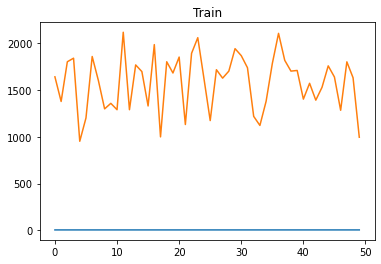

2/2 [==============================] - 2s 13ms/step


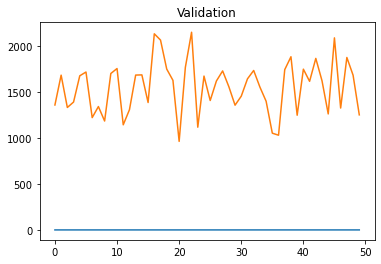

3/3 [==============================] - 0s 28ms/step


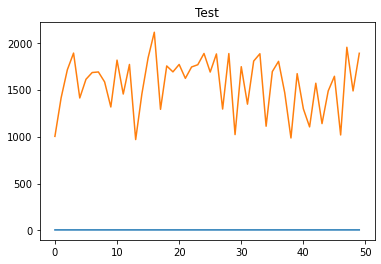

3/3 [==============================] - 0s 10ms/step


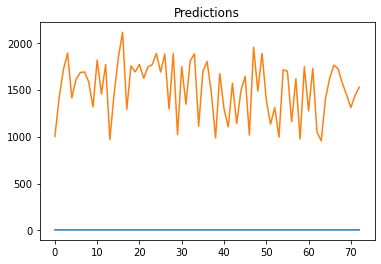

In [29]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [30]:
hybrid_cnn_lstm_mse

2362497.056528036

### RNN LSTM

Epoch 1/30
4/8 [==============>...............] - ETA: 0s - loss: 2521750.0000 - root_mean_squared_error: 1588.0018 

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 24s 2s/step - loss: 2530838.2500 - root_mean_squared_error: 1590.8608 - val_loss: 2504329.5000 - val_root_mean_squared_error: 1582.5073
Epoch 2/30
6/8 [=====================>........] - ETA: 0s - loss: 2539235.7500 - root_mean_squared_error: 1593.4979

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2530257.7500 - root_mean_squared_error: 1590.6783 - val_loss: 2503746.7500 - val_root_mean_squared_error: 1582.3232
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 2524371.5000 - root_mean_squared_error: 1588.8270

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2529668.7500 - root_mean_squared_error: 1590.4933 - val_loss: 2503138.2500 - val_root_mean_squared_error: 1582.1310
Epoch 4/30
6/8 [=====================>........] - ETA: 0s - loss: 2500596.0000 - root_mean_squared_error: 1581.3273

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2529016.7500 - root_mean_squared_error: 1590.2882 - val_loss: 2502384.5000 - val_root_mean_squared_error: 1581.8927
Epoch 5/30
6/8 [=====================>........] - ETA: 0s - loss: 2504776.0000 - root_mean_squared_error: 1582.6484

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2528243.2500 - root_mean_squared_error: 1590.0450 - val_loss: 2501670.0000 - val_root_mean_squared_error: 1581.6667
Epoch 6/30
6/8 [=====================>........] - ETA: 0s - loss: 2498118.7500 - root_mean_squared_error: 1580.5438

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2527586.7500 - root_mean_squared_error: 1589.8386 - val_loss: 2501066.0000 - val_root_mean_squared_error: 1581.4760
Epoch 7/30
6/8 [=====================>........] - ETA: 0s - loss: 2563592.5000 - root_mean_squared_error: 1601.1223

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2526985.5000 - root_mean_squared_error: 1589.6495 - val_loss: 2500464.0000 - val_root_mean_squared_error: 1581.2855
Epoch 8/30
5/8 [=================>............] - ETA: 0s - loss: 2540261.2500 - root_mean_squared_error: 1593.8197

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2526385.0000 - root_mean_squared_error: 1589.4606 - val_loss: 2499861.5000 - val_root_mean_squared_error: 1581.0951
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 2525994.7500 - root_mean_squared_error: 1589.3379

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2525783.5000 - root_mean_squared_error: 1589.2714 - val_loss: 2499261.7500 - val_root_mean_squared_error: 1580.9054
Epoch 10/30
5/8 [=================>............] - ETA: 0s - loss: 2535045.5000 - root_mean_squared_error: 1592.1826

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2525182.2500 - root_mean_squared_error: 1589.0822 - val_loss: 2498662.2500 - val_root_mean_squared_error: 1580.7157
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 2524580.0000 - root_mean_squared_error: 1588.8927

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2524580.0000 - root_mean_squared_error: 1588.8927 - val_loss: 2498061.7500 - val_root_mean_squared_error: 1580.5258
Epoch 12/30
5/8 [=================>............] - ETA: 0s - loss: 2509347.7500 - root_mean_squared_error: 1584.0920

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2523983.0000 - root_mean_squared_error: 1588.7048 - val_loss: 2497464.2500 - val_root_mean_squared_error: 1580.3368
Epoch 13/30
4/8 [==============>...............] - ETA: 0s - loss: 2499538.0000 - root_mean_squared_error: 1580.9927

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2523385.0000 - root_mean_squared_error: 1588.5166 - val_loss: 2496871.0000 - val_root_mean_squared_error: 1580.1490
Epoch 14/30
6/8 [=====================>........] - ETA: 0s - loss: 2513351.2500 - root_mean_squared_error: 1585.3552

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2522793.0000 - root_mean_squared_error: 1588.3302 - val_loss: 2496278.0000 - val_root_mean_squared_error: 1579.9614
Epoch 15/30
4/8 [==============>...............] - ETA: 0s - loss: 2427337.7500 - root_mean_squared_error: 1557.9916

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2522200.7500 - root_mean_squared_error: 1588.1438 - val_loss: 2495693.7500 - val_root_mean_squared_error: 1579.7765
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 2521618.2500 - root_mean_squared_error: 1587.9604

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2521618.2500 - root_mean_squared_error: 1587.9604 - val_loss: 2495109.2500 - val_root_mean_squared_error: 1579.5914
Epoch 17/30
5/8 [=================>............] - ETA: 0s - loss: 2487883.2500 - root_mean_squared_error: 1577.3025

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2521037.0000 - root_mean_squared_error: 1587.7773 - val_loss: 2494530.7500 - val_root_mean_squared_error: 1579.4083
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 2509649.2500 - root_mean_squared_error: 1584.1873

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2520460.2500 - root_mean_squared_error: 1587.5957 - val_loss: 2493952.2500 - val_root_mean_squared_error: 1579.2252
Epoch 19/30
6/8 [=====================>........] - ETA: 0s - loss: 2500036.0000 - root_mean_squared_error: 1581.1503

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2519880.5000 - root_mean_squared_error: 1587.4132 - val_loss: 2493376.5000 - val_root_mean_squared_error: 1579.0428
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 2523116.5000 - root_mean_squared_error: 1588.4321

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2519306.2500 - root_mean_squared_error: 1587.2323 - val_loss: 2492805.5000 - val_root_mean_squared_error: 1578.8621
Epoch 21/30
6/8 [=====================>........] - ETA: 0s - loss: 2570941.2500 - root_mean_squared_error: 1603.4155

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2518741.2500 - root_mean_squared_error: 1587.0543 - val_loss: 2492244.2500 - val_root_mean_squared_error: 1578.6843
Epoch 22/30
6/8 [=====================>........] - ETA: 0s - loss: 2511653.7500 - root_mean_squared_error: 1584.8198

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2518184.2500 - root_mean_squared_error: 1586.8788 - val_loss: 2491696.5000 - val_root_mean_squared_error: 1578.5109
Epoch 23/30
5/8 [=================>............] - ETA: 0s - loss: 2470337.5000 - root_mean_squared_error: 1571.7307

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2517637.7500 - root_mean_squared_error: 1586.7065 - val_loss: 2491163.0000 - val_root_mean_squared_error: 1578.3418
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 2513993.2500 - root_mean_squared_error: 1585.5577

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2517110.5000 - root_mean_squared_error: 1586.5404 - val_loss: 2490643.2500 - val_root_mean_squared_error: 1578.1772
Epoch 25/30
6/8 [=====================>........] - ETA: 0s - loss: 2557915.2500 - root_mean_squared_error: 1599.3484

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2516602.0000 - root_mean_squared_error: 1586.3801 - val_loss: 2490140.2500 - val_root_mean_squared_error: 1578.0178
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 2503898.5000 - root_mean_squared_error: 1582.3712

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2516104.5000 - root_mean_squared_error: 1586.2234 - val_loss: 2489660.7500 - val_root_mean_squared_error: 1577.8658
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 2502129.5000 - root_mean_squared_error: 1581.8121

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2515633.0000 - root_mean_squared_error: 1586.0747 - val_loss: 2489200.2500 - val_root_mean_squared_error: 1577.7200
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 2510946.7500 - root_mean_squared_error: 1584.5967

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2515177.5000 - root_mean_squared_error: 1585.9312 - val_loss: 2488761.5000 - val_root_mean_squared_error: 1577.5809
Epoch 29/30
5/8 [=================>............] - ETA: 0s - loss: 2475384.0000 - root_mean_squared_error: 1573.3353

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2514748.0000 - root_mean_squared_error: 1585.7957 - val_loss: 2488340.2500 - val_root_mean_squared_error: 1577.4474
Epoch 30/30
6/8 [=====================>........] - ETA: 0s - loss: 2449611.0000 - root_mean_squared_error: 1565.1233

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 2s 5ms/step


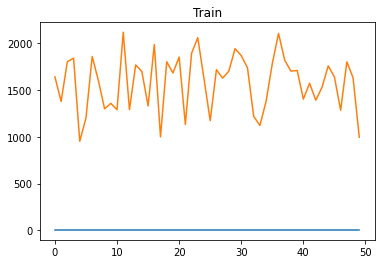

2/2 [==============================] - 1s 5ms/step


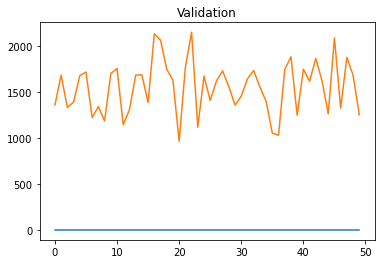

3/3 [==============================] - 0s 19ms/step


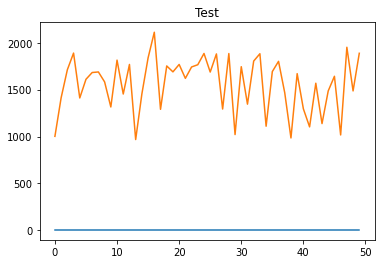

3/3 [==============================] - 0s 5ms/step


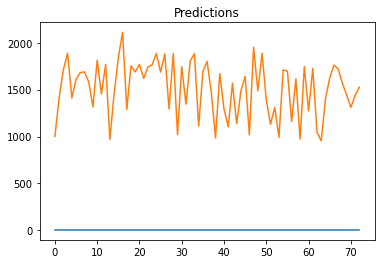

In [31]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(3,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [32]:
hybrid_rnn_lstm_mse

2363378.3336280077

### RNN GRU

Epoch 1/30
6/8 [=====================>........] - ETA: 0s - loss: 2516293.5000 - root_mean_squared_error: 1586.2830

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 22s 2s/step - loss: 2535402.7500 - root_mean_squared_error: 1592.2948 - val_loss: 2508822.0000 - val_root_mean_squared_error: 1583.9261
Epoch 2/30
5/8 [=================>............] - ETA: 0s - loss: 2553681.0000 - root_mean_squared_error: 1598.0240

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2534698.7500 - root_mean_squared_error: 1592.0737 - val_loss: 2508108.7500 - val_root_mean_squared_error: 1583.7009
Epoch 3/30
5/8 [=================>............] - ETA: 0s - loss: 2531251.2500 - root_mean_squared_error: 1590.9906

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2534002.2500 - root_mean_squared_error: 1591.8550 - val_loss: 2507437.2500 - val_root_mean_squared_error: 1583.4889
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2533336.0000 - root_mean_squared_error: 1591.6456

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2533336.0000 - root_mean_squared_error: 1591.6456 - val_loss: 2506774.0000 - val_root_mean_squared_error: 1583.2795
Epoch 5/30
6/8 [=====================>........] - ETA: 0s - loss: 2516185.2500 - root_mean_squared_error: 1586.2488

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2532672.2500 - root_mean_squared_error: 1591.4371 - val_loss: 2506114.2500 - val_root_mean_squared_error: 1583.0712
Epoch 6/30
6/8 [=====================>........] - ETA: 0s - loss: 2537769.2500 - root_mean_squared_error: 1593.0377

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2532011.0000 - root_mean_squared_error: 1591.2294 - val_loss: 2505445.2500 - val_root_mean_squared_error: 1582.8599
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 2523553.5000 - root_mean_squared_error: 1588.5696

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2531338.7500 - root_mean_squared_error: 1591.0182 - val_loss: 2504773.2500 - val_root_mean_squared_error: 1582.6476
Epoch 8/30
6/8 [=====================>........] - ETA: 0s - loss: 2550219.7500 - root_mean_squared_error: 1596.9408

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2530665.7500 - root_mean_squared_error: 1590.8066 - val_loss: 2504097.0000 - val_root_mean_squared_error: 1582.4338
Epoch 9/30
5/8 [=================>............] - ETA: 0s - loss: 2499209.5000 - root_mean_squared_error: 1580.8888

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2529988.0000 - root_mean_squared_error: 1590.5936 - val_loss: 2503419.2500 - val_root_mean_squared_error: 1582.2197
Epoch 10/30
6/8 [=====================>........] - ETA: 0s - loss: 2537895.0000 - root_mean_squared_error: 1593.0773

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2529310.0000 - root_mean_squared_error: 1590.3805 - val_loss: 2502736.2500 - val_root_mean_squared_error: 1582.0039
Epoch 11/30
6/8 [=====================>........] - ETA: 0s - loss: 2470981.7500 - root_mean_squared_error: 1571.9357

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2528621.0000 - root_mean_squared_error: 1590.1638 - val_loss: 2502053.7500 - val_root_mean_squared_error: 1581.7882
Epoch 12/30
6/8 [=====================>........] - ETA: 0s - loss: 2539015.2500 - root_mean_squared_error: 1593.4287

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2527942.0000 - root_mean_squared_error: 1589.9503 - val_loss: 2501367.7500 - val_root_mean_squared_error: 1581.5713
Epoch 13/30
6/8 [=====================>........] - ETA: 0s - loss: 2526724.7500 - root_mean_squared_error: 1589.5675

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2527255.7500 - root_mean_squared_error: 1589.7345 - val_loss: 2500682.2500 - val_root_mean_squared_error: 1581.3546
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 2514309.7500 - root_mean_squared_error: 1585.6575

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2526567.5000 - root_mean_squared_error: 1589.5181 - val_loss: 2499996.2500 - val_root_mean_squared_error: 1581.1377
Epoch 15/30
5/8 [=================>............] - ETA: 0s - loss: 2557998.7500 - root_mean_squared_error: 1599.3745

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2525883.7500 - root_mean_squared_error: 1589.3029 - val_loss: 2499308.2500 - val_root_mean_squared_error: 1580.9200
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 2548175.7500 - root_mean_squared_error: 1596.3007

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2525196.0000 - root_mean_squared_error: 1589.0865 - val_loss: 2498625.7500 - val_root_mean_squared_error: 1580.7042
Epoch 17/30
6/8 [=====================>........] - ETA: 0s - loss: 2500203.7500 - root_mean_squared_error: 1581.2032

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2524517.2500 - root_mean_squared_error: 1588.8729 - val_loss: 2497952.0000 - val_root_mean_squared_error: 1580.4911
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 2523848.5000 - root_mean_squared_error: 1588.6625

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2523848.5000 - root_mean_squared_error: 1588.6625 - val_loss: 2497276.7500 - val_root_mean_squared_error: 1580.2775
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 2522045.7500 - root_mean_squared_error: 1588.0950

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2523170.2500 - root_mean_squared_error: 1588.4490 - val_loss: 2496604.2500 - val_root_mean_squared_error: 1580.0647
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 2522494.2500 - root_mean_squared_error: 1588.2362

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2522494.2500 - root_mean_squared_error: 1588.2362 - val_loss: 2495922.5000 - val_root_mean_squared_error: 1579.8489
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 2527841.5000 - root_mean_squared_error: 1589.9187

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2521807.2500 - root_mean_squared_error: 1588.0199 - val_loss: 2495233.7500 - val_root_mean_squared_error: 1579.6309
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 2515789.7500 - root_mean_squared_error: 1586.1241

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2521114.5000 - root_mean_squared_error: 1587.8018 - val_loss: 2494538.5000 - val_root_mean_squared_error: 1579.4108
Epoch 23/30
6/8 [=====================>........] - ETA: 0s - loss: 2456023.2500 - root_mean_squared_error: 1567.1704

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2520417.0000 - root_mean_squared_error: 1587.5822 - val_loss: 2493840.2500 - val_root_mean_squared_error: 1579.1897
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 2522158.7500 - root_mean_squared_error: 1588.1306

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2519724.0000 - root_mean_squared_error: 1587.3639 - val_loss: 2493147.5000 - val_root_mean_squared_error: 1578.9703
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 2493548.2500 - root_mean_squared_error: 1579.0973

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2519032.2500 - root_mean_squared_error: 1587.1460 - val_loss: 2492475.2500 - val_root_mean_squared_error: 1578.7574
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 2501443.5000 - root_mean_squared_error: 1581.5952

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2518371.5000 - root_mean_squared_error: 1586.9377 - val_loss: 2491816.7500 - val_root_mean_squared_error: 1578.5490
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 2517724.5000 - root_mean_squared_error: 1586.7339

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2517724.5000 - root_mean_squared_error: 1586.7339 - val_loss: 2491189.0000 - val_root_mean_squared_error: 1578.3501
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 2517915.5000 - root_mean_squared_error: 1586.7941

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2517109.7500 - root_mean_squared_error: 1586.5402 - val_loss: 2490595.7500 - val_root_mean_squared_error: 1578.1621
Epoch 29/30
6/8 [=====================>........] - ETA: 0s - loss: 2493207.0000 - root_mean_squared_error: 1578.9893

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2516527.7500 - root_mean_squared_error: 1586.3568 - val_loss: 2490037.2500 - val_root_mean_squared_error: 1577.9852
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 2518142.2500 - root_mean_squared_error: 1586.8656

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 3s 9ms/step


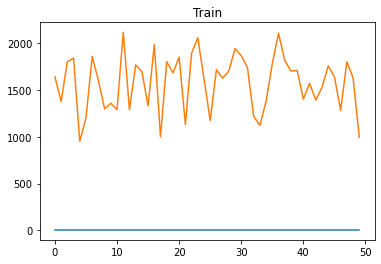

2/2 [==============================] - 1s 7ms/step


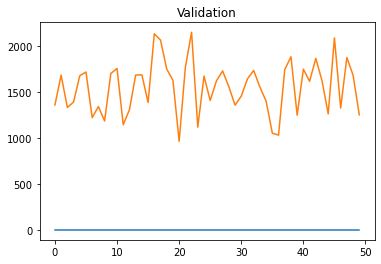

3/3 [==============================] - 0s 12ms/step


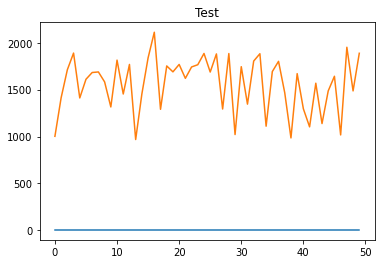

3/3 [==============================] - 0s 22ms/step


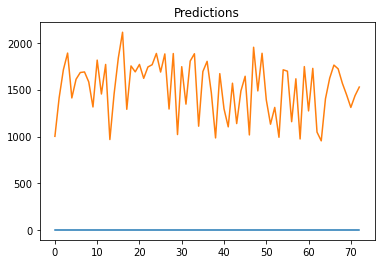

In [33]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [34]:
hybrid_rnn_gru_mse

2364905.5129619744

### CNN GRU

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 2538407.7500 - root_mean_squared_error: 1593.2382

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 32s 3s/step - loss: 2528634.7500 - root_mean_squared_error: 1590.1681 - val_loss: 2502199.7500 - val_root_mean_squared_error: 1581.8344
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 2549745.2500 - root_mean_squared_error: 1596.7921

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2528150.7500 - root_mean_squared_error: 1590.0160 - val_loss: 2501623.0000 - val_root_mean_squared_error: 1581.6520
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 2499966.2500 - root_mean_squared_error: 1581.1282

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2527589.2500 - root_mean_squared_error: 1589.8394 - val_loss: 2501147.0000 - val_root_mean_squared_error: 1581.5015
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 2521377.5000 - root_mean_squared_error: 1587.8846

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2527077.7500 - root_mean_squared_error: 1589.6785 - val_loss: 2500565.7500 - val_root_mean_squared_error: 1581.3177
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 2530095.7500 - root_mean_squared_error: 1590.6274

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2526520.5000 - root_mean_squared_error: 1589.5032 - val_loss: 2500070.5000 - val_root_mean_squared_error: 1581.1610
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 2526112.7500 - root_mean_squared_error: 1589.3750

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2525987.5000 - root_mean_squared_error: 1589.3356 - val_loss: 2499350.0000 - val_root_mean_squared_error: 1580.9332
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 2525294.7500 - root_mean_squared_error: 1589.1176

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2525294.7500 - root_mean_squared_error: 1589.1176 - val_loss: 2498816.7500 - val_root_mean_squared_error: 1580.7645
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 2511669.7500 - root_mean_squared_error: 1584.8248

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2524754.7500 - root_mean_squared_error: 1588.9476 - val_loss: 2498250.0000 - val_root_mean_squared_error: 1580.5853
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 2521994.2500 - root_mean_squared_error: 1588.0787

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2523954.5000 - root_mean_squared_error: 1588.6958 - val_loss: 2497214.0000 - val_root_mean_squared_error: 1580.2576
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 2530662.2500 - root_mean_squared_error: 1590.8055

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2523190.0000 - root_mean_squared_error: 1588.4552 - val_loss: 2496738.2500 - val_root_mean_squared_error: 1580.1071
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 2522737.0000 - root_mean_squared_error: 1588.3126

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2522737.0000 - root_mean_squared_error: 1588.3126 - val_loss: 2496307.0000 - val_root_mean_squared_error: 1579.9706
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 2522309.2500 - root_mean_squared_error: 1588.1780

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2522309.2500 - root_mean_squared_error: 1588.1780 - val_loss: 2495888.7500 - val_root_mean_squared_error: 1579.8383
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 2542198.0000 - root_mean_squared_error: 1594.4271

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2521891.2500 - root_mean_squared_error: 1588.0464 - val_loss: 2495486.0000 - val_root_mean_squared_error: 1579.7107
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 2526205.2500 - root_mean_squared_error: 1589.4041

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2521490.5000 - root_mean_squared_error: 1587.9202 - val_loss: 2495095.0000 - val_root_mean_squared_error: 1579.5869
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 2530171.2500 - root_mean_squared_error: 1590.6512

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2521103.5000 - root_mean_squared_error: 1587.7983 - val_loss: 2494710.0000 - val_root_mean_squared_error: 1579.4651
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 2520721.7500 - root_mean_squared_error: 1587.6781

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2520721.7500 - root_mean_squared_error: 1587.6781 - val_loss: 2494335.0000 - val_root_mean_squared_error: 1579.3464
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 2524326.0000 - root_mean_squared_error: 1588.8127

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2520350.2500 - root_mean_squared_error: 1587.5612 - val_loss: 2493967.7500 - val_root_mean_squared_error: 1579.2301
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 2517426.2500 - root_mean_squared_error: 1586.6399

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2519986.2500 - root_mean_squared_error: 1587.4464 - val_loss: 2493608.2500 - val_root_mean_squared_error: 1579.1163
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 2506267.5000 - root_mean_squared_error: 1583.1195

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2519630.2500 - root_mean_squared_error: 1587.3344 - val_loss: 2493256.2500 - val_root_mean_squared_error: 1579.0049
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 2503624.2500 - root_mean_squared_error: 1582.2845

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2519278.2500 - root_mean_squared_error: 1587.2234 - val_loss: 2492911.7500 - val_root_mean_squared_error: 1578.8959
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 2503047.5000 - root_mean_squared_error: 1582.1023

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2518935.7500 - root_mean_squared_error: 1587.1156 - val_loss: 2492574.2500 - val_root_mean_squared_error: 1578.7888
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 2539360.2500 - root_mean_squared_error: 1593.5370

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2518599.7500 - root_mean_squared_error: 1587.0096 - val_loss: 2492241.5000 - val_root_mean_squared_error: 1578.6835
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 2517406.5000 - root_mean_squared_error: 1586.6337

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2518263.5000 - root_mean_squared_error: 1586.9037 - val_loss: 2491894.0000 - val_root_mean_squared_error: 1578.5734
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 2523623.2500 - root_mean_squared_error: 1588.5916

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2517878.7500 - root_mean_squared_error: 1586.7825 - val_loss: 2491469.7500 - val_root_mean_squared_error: 1578.4390
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 2521061.2500 - root_mean_squared_error: 1587.7850

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2517504.5000 - root_mean_squared_error: 1586.6646 - val_loss: 2491154.0000 - val_root_mean_squared_error: 1578.3390
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 2520821.2500 - root_mean_squared_error: 1587.7095

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2517195.0000 - root_mean_squared_error: 1586.5670 - val_loss: 2490851.7500 - val_root_mean_squared_error: 1578.2433
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 2535956.5000 - root_mean_squared_error: 1592.4686

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2516894.5000 - root_mean_squared_error: 1586.4723 - val_loss: 2490549.5000 - val_root_mean_squared_error: 1578.1475
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 2509303.7500 - root_mean_squared_error: 1584.0782

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2516584.0000 - root_mean_squared_error: 1586.3745 - val_loss: 2490245.0000 - val_root_mean_squared_error: 1578.0510
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 2516158.2500 - root_mean_squared_error: 1586.2402

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2516287.5000 - root_mean_squared_error: 1586.2810 - val_loss: 2489946.5000 - val_root_mean_squared_error: 1577.9564
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 2496052.0000 - root_mean_squared_error: 1579.8899

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 2s 14ms/step


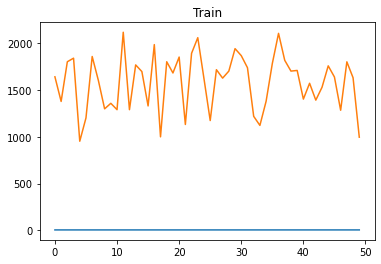

2/2 [==============================] - 2s 8ms/step


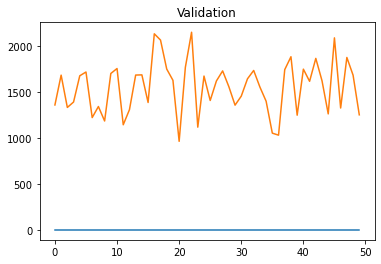

3/3 [==============================] - 0s 49ms/step


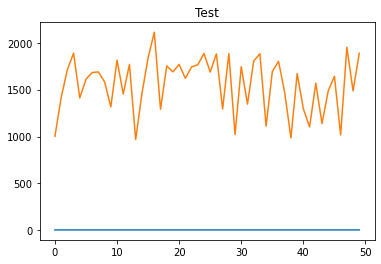

3/3 [==============================] - 0s 9ms/step


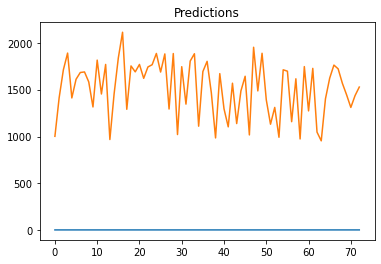

In [35]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [36]:
hybrid_cnn_gru_mse

2365051.3564658714

### CNN RNN GRU

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 2545250.7500 - root_mean_squared_error: 1595.3842

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 26s 2s/step - loss: 2532164.0000 - root_mean_squared_error: 1591.2775 - val_loss: 2505593.7500 - val_root_mean_squared_error: 1582.9067
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 2521155.2500 - root_mean_squared_error: 1587.8146

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2531332.2500 - root_mean_squared_error: 1591.0161 - val_loss: 2504425.7500 - val_root_mean_squared_error: 1582.5377
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 2531520.0000 - root_mean_squared_error: 1591.0751

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2529684.2500 - root_mean_squared_error: 1590.4982 - val_loss: 2502625.0000 - val_root_mean_squared_error: 1581.9688
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 2544974.2500 - root_mean_squared_error: 1595.2975

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2528321.0000 - root_mean_squared_error: 1590.0695 - val_loss: 2501485.0000 - val_root_mean_squared_error: 1581.6084
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 2537057.2500 - root_mean_squared_error: 1592.8142

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2527182.5000 - root_mean_squared_error: 1589.7114 - val_loss: 2500437.7500 - val_root_mean_squared_error: 1581.2772
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 2507430.5000 - root_mean_squared_error: 1583.4868

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2526299.7500 - root_mean_squared_error: 1589.4338 - val_loss: 2499584.0000 - val_root_mean_squared_error: 1581.0073
Epoch 7/30
6/8 [=====================>........] - ETA: 0s - loss: 2496596.0000 - root_mean_squared_error: 1580.0620

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2525491.0000 - root_mean_squared_error: 1589.1793 - val_loss: 2498787.7500 - val_root_mean_squared_error: 1580.7555
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 2524700.5000 - root_mean_squared_error: 1588.9307

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2524700.5000 - root_mean_squared_error: 1588.9307 - val_loss: 2498010.5000 - val_root_mean_squared_error: 1580.5095
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 2523906.2500 - root_mean_squared_error: 1588.6807

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2523906.2500 - root_mean_squared_error: 1588.6807 - val_loss: 2497177.0000 - val_root_mean_squared_error: 1580.2458
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 2523080.7500 - root_mean_squared_error: 1588.4208

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2523080.7500 - root_mean_squared_error: 1588.4208 - val_loss: 2496362.5000 - val_root_mean_squared_error: 1579.9882
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 2503405.2500 - root_mean_squared_error: 1582.2153

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2522274.7500 - root_mean_squared_error: 1588.1671 - val_loss: 2495556.5000 - val_root_mean_squared_error: 1579.7330
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 2548800.7500 - root_mean_squared_error: 1596.4963

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2521477.7500 - root_mean_squared_error: 1587.9161 - val_loss: 2494755.5000 - val_root_mean_squared_error: 1579.4795
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 2520682.0000 - root_mean_squared_error: 1587.6655

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2520682.0000 - root_mean_squared_error: 1587.6655 - val_loss: 2493981.2500 - val_root_mean_squared_error: 1579.2344
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 2519901.0000 - root_mean_squared_error: 1587.4196

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2519901.0000 - root_mean_squared_error: 1587.4196 - val_loss: 2493215.5000 - val_root_mean_squared_error: 1578.9919
Epoch 15/30
6/8 [=====================>........] - ETA: 0s - loss: 2537328.2500 - root_mean_squared_error: 1592.8993

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2519130.7500 - root_mean_squared_error: 1587.1770 - val_loss: 2492459.0000 - val_root_mean_squared_error: 1578.7523
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 2518376.5000 - root_mean_squared_error: 1586.9393

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2518376.5000 - root_mean_squared_error: 1586.9393 - val_loss: 2491727.5000 - val_root_mean_squared_error: 1578.5206
Epoch 17/30
6/8 [=====================>........] - ETA: 0s - loss: 2490642.2500 - root_mean_squared_error: 1578.1769

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2517654.7500 - root_mean_squared_error: 1586.7119 - val_loss: 2491019.5000 - val_root_mean_squared_error: 1578.2964
Epoch 18/30
6/8 [=====================>........] - ETA: 0s - loss: 2477366.5000 - root_mean_squared_error: 1573.9652

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2516949.0000 - root_mean_squared_error: 1586.4895 - val_loss: 2490336.0000 - val_root_mean_squared_error: 1578.0798
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 2499063.5000 - root_mean_squared_error: 1580.8427

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2516268.5000 - root_mean_squared_error: 1586.2750 - val_loss: 2489672.5000 - val_root_mean_squared_error: 1577.8696
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 2535510.2500 - root_mean_squared_error: 1592.3286

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2515606.7500 - root_mean_squared_error: 1586.0664 - val_loss: 2489029.7500 - val_root_mean_squared_error: 1577.6659
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 2503055.7500 - root_mean_squared_error: 1582.1049

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2514966.0000 - root_mean_squared_error: 1585.8644 - val_loss: 2488416.5000 - val_root_mean_squared_error: 1577.4716
Epoch 22/30
6/8 [=====================>........] - ETA: 0s - loss: 2505607.2500 - root_mean_squared_error: 1582.9110

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2514357.2500 - root_mean_squared_error: 1585.6725 - val_loss: 2487821.2500 - val_root_mean_squared_error: 1577.2828
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 2513769.2500 - root_mean_squared_error: 1585.4871

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2513769.2500 - root_mean_squared_error: 1585.4871 - val_loss: 2487244.7500 - val_root_mean_squared_error: 1577.1001
Epoch 24/30
6/8 [=====================>........] - ETA: 0s - loss: 2485587.7500 - root_mean_squared_error: 1576.5747

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2513196.2500 - root_mean_squared_error: 1585.3064 - val_loss: 2486693.0000 - val_root_mean_squared_error: 1576.9252
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 2512652.2500 - root_mean_squared_error: 1585.1348

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2512652.2500 - root_mean_squared_error: 1585.1348 - val_loss: 2486159.5000 - val_root_mean_squared_error: 1576.7560
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 2512968.5000 - root_mean_squared_error: 1585.2345

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2512128.7500 - root_mean_squared_error: 1584.9696 - val_loss: 2485646.2500 - val_root_mean_squared_error: 1576.5933
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 2507684.2500 - root_mean_squared_error: 1583.5669

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2511621.5000 - root_mean_squared_error: 1584.8096 - val_loss: 2485150.0000 - val_root_mean_squared_error: 1576.4359
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2511129.0000 - root_mean_squared_error: 1584.6542

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2511129.0000 - root_mean_squared_error: 1584.6542 - val_loss: 2484667.5000 - val_root_mean_squared_error: 1576.2828
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 2503538.7500 - root_mean_squared_error: 1582.2574

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2510648.7500 - root_mean_squared_error: 1584.5027 - val_loss: 2484197.7500 - val_root_mean_squared_error: 1576.1338
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 2510181.5000 - root_mean_squared_error: 1584.3552

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 2s 21ms/step


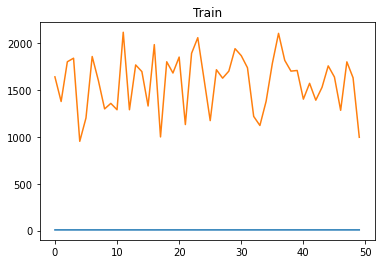

2/2 [==============================] - 2s 9ms/step


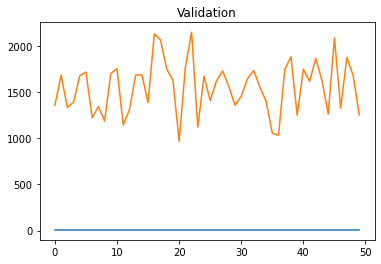

3/3 [==============================] - 0s 11ms/step


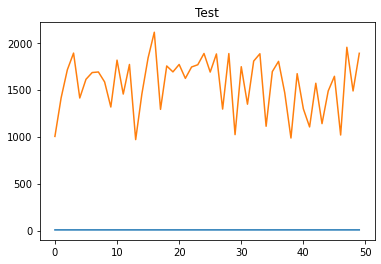

3/3 [==============================] - 0s 8ms/step


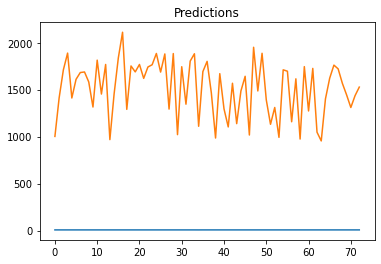

In [37]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3, 1)))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [38]:
hybrid_cnn_rnn_gru_mse

2359303.685292974

### LSTM RNN GRU

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 2523159.7500 - root_mean_squared_error: 1588.4457

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 35s 4s/step - loss: 2531045.2500 - root_mean_squared_error: 1590.9259 - val_loss: 2504042.0000 - val_root_mean_squared_error: 1582.4164
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 2514182.5000 - root_mean_squared_error: 1585.6174

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2529649.2500 - root_mean_squared_error: 1590.4871 - val_loss: 2502634.2500 - val_root_mean_squared_error: 1581.9717
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 2528223.7500 - root_mean_squared_error: 1590.0389

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2528223.7500 - root_mean_squared_error: 1590.0389 - val_loss: 2501149.2500 - val_root_mean_squared_error: 1581.5022
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 2505957.2500 - root_mean_squared_error: 1583.0216

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2526691.5000 - root_mean_squared_error: 1589.5570 - val_loss: 2499517.0000 - val_root_mean_squared_error: 1580.9861
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 2538904.5000 - root_mean_squared_error: 1593.3940

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2524985.7500 - root_mean_squared_error: 1589.0204 - val_loss: 2497669.2500 - val_root_mean_squared_error: 1580.4017
Epoch 6/30
6/8 [=====================>........] - ETA: 0s - loss: 2478372.2500 - root_mean_squared_error: 1574.2847

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2523034.0000 - root_mean_squared_error: 1588.4061 - val_loss: 2495588.5000 - val_root_mean_squared_error: 1579.7432
Epoch 7/30
6/8 [=====================>........] - ETA: 0s - loss: 2513976.7500 - root_mean_squared_error: 1585.5525

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2520847.5000 - root_mean_squared_error: 1587.7177 - val_loss: 2493248.0000 - val_root_mean_squared_error: 1579.0022
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 2526789.2500 - root_mean_squared_error: 1589.5878

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2518425.0000 - root_mean_squared_error: 1586.9546 - val_loss: 2490699.5000 - val_root_mean_squared_error: 1578.1951
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 2515351.2500 - root_mean_squared_error: 1585.9858

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2515815.2500 - root_mean_squared_error: 1586.1322 - val_loss: 2488064.5000 - val_root_mean_squared_error: 1577.3600
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 2521088.5000 - root_mean_squared_error: 1587.7936

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2513175.5000 - root_mean_squared_error: 1585.2998 - val_loss: 2485457.0000 - val_root_mean_squared_error: 1576.5332
Epoch 11/30
6/8 [=====================>........] - ETA: 0s - loss: 2516885.2500 - root_mean_squared_error: 1586.4695

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2510630.5000 - root_mean_squared_error: 1584.4969 - val_loss: 2483014.2500 - val_root_mean_squared_error: 1575.7583
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 2508284.5000 - root_mean_squared_error: 1583.7565

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2508284.5000 - root_mean_squared_error: 1583.7565 - val_loss: 2480829.0000 - val_root_mean_squared_error: 1575.0648
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 2506223.0000 - root_mean_squared_error: 1583.1055

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2506223.0000 - root_mean_squared_error: 1583.1055 - val_loss: 2478951.2500 - val_root_mean_squared_error: 1574.4685
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 2504465.0000 - root_mean_squared_error: 1582.5502

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2504465.0000 - root_mean_squared_error: 1582.5502 - val_loss: 2477388.5000 - val_root_mean_squared_error: 1573.9722
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 2503009.5000 - root_mean_squared_error: 1582.0902

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2503009.5000 - root_mean_squared_error: 1582.0902 - val_loss: 2476098.7500 - val_root_mean_squared_error: 1573.5625
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 2498076.0000 - root_mean_squared_error: 1580.5303

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2501817.7500 - root_mean_squared_error: 1581.7135 - val_loss: 2475030.2500 - val_root_mean_squared_error: 1573.2229
Epoch 17/30
6/8 [=====================>........] - ETA: 0s - loss: 2504393.7500 - root_mean_squared_error: 1582.5276

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2500821.5000 - root_mean_squared_error: 1581.3986 - val_loss: 2474144.2500 - val_root_mean_squared_error: 1572.9414
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 2494753.5000 - root_mean_squared_error: 1579.4789

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2499987.5000 - root_mean_squared_error: 1581.1349 - val_loss: 2473401.7500 - val_root_mean_squared_error: 1572.7052
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 2476122.7500 - root_mean_squared_error: 1573.5701

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2499293.7500 - root_mean_squared_error: 1580.9155 - val_loss: 2472763.2500 - val_root_mean_squared_error: 1572.5022
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 2484309.2500 - root_mean_squared_error: 1576.1692

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2498689.0000 - root_mean_squared_error: 1580.7242 - val_loss: 2472209.0000 - val_root_mean_squared_error: 1572.3259
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 2476619.5000 - root_mean_squared_error: 1573.7279

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2498163.5000 - root_mean_squared_error: 1580.5580 - val_loss: 2471722.5000 - val_root_mean_squared_error: 1572.1713
Epoch 22/30
6/8 [=====================>........] - ETA: 0s - loss: 2487517.7500 - root_mean_squared_error: 1577.1866

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2497699.5000 - root_mean_squared_error: 1580.4111 - val_loss: 2471290.7500 - val_root_mean_squared_error: 1572.0339
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 2503312.5000 - root_mean_squared_error: 1582.1860

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2497287.0000 - root_mean_squared_error: 1580.2806 - val_loss: 2470904.2500 - val_root_mean_squared_error: 1571.9110
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 2496915.7500 - root_mean_squared_error: 1580.1632

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 25s 3s/step - loss: 2496915.7500 - root_mean_squared_error: 1580.1632 - val_loss: 2470555.5000 - val_root_mean_squared_error: 1571.8000
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 2496579.2500 - root_mean_squared_error: 1580.0568

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2496579.2500 - root_mean_squared_error: 1580.0568 - val_loss: 2470236.7500 - val_root_mean_squared_error: 1571.6987
Epoch 26/30
6/8 [=====================>........] - ETA: 0s - loss: 2509101.2500 - root_mean_squared_error: 1584.0143

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2496268.5000 - root_mean_squared_error: 1579.9584 - val_loss: 2469938.7500 - val_root_mean_squared_error: 1571.6039
Epoch 27/30
6/8 [=====================>........] - ETA: 0s - loss: 2482188.0000 - root_mean_squared_error: 1575.4961

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2495978.0000 - root_mean_squared_error: 1579.8665 - val_loss: 2469660.5000 - val_root_mean_squared_error: 1571.5154
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2495706.0000 - root_mean_squared_error: 1579.7804

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2495706.0000 - root_mean_squared_error: 1579.7804 - val_loss: 2469395.2500 - val_root_mean_squared_error: 1571.4309
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 2479857.2500 - root_mean_squared_error: 1574.7562

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2495445.2500 - root_mean_squared_error: 1579.6979 - val_loss: 2469143.7500 - val_root_mean_squared_error: 1571.3510
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 2495198.0000 - root_mean_squared_error: 1579.6196

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 3s 22ms/step


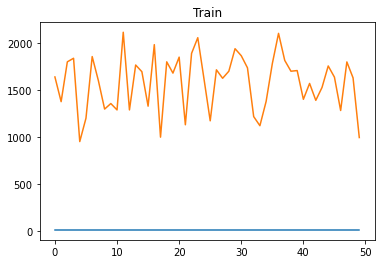

2/2 [==============================] - 2s 10ms/step


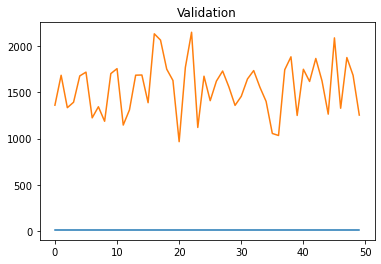

3/3 [==============================] - 0s 132ms/step


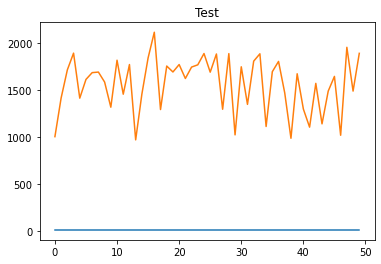

3/3 [==============================] - 0s 6ms/step


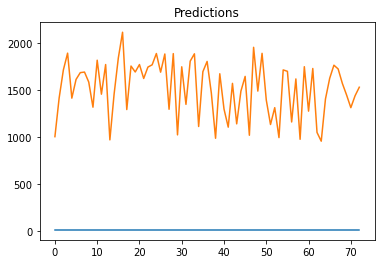

In [39]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_lstm_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [40]:
hybrid_lstm_rnn_gru_mse

2344880.934816418

## Moving Average

### CNN LSTM

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 2522408.5000 - root_mean_squared_error: 1588.2092

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 42s 4s/step - loss: 2530957.5000 - root_mean_squared_error: 1590.8983 - val_loss: 2502242.2500 - val_root_mean_squared_error: 1581.8478
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 2530240.0000 - root_mean_squared_error: 1590.6729

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2530240.0000 - root_mean_squared_error: 1590.6729 - val_loss: 2501597.2500 - val_root_mean_squared_error: 1581.6438
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 2529570.0000 - root_mean_squared_error: 1590.4622

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2529570.0000 - root_mean_squared_error: 1590.4622 - val_loss: 2500919.2500 - val_root_mean_squared_error: 1581.4294
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 2536626.7500 - root_mean_squared_error: 1592.6791

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2528827.5000 - root_mean_squared_error: 1590.2288 - val_loss: 2500118.2500 - val_root_mean_squared_error: 1581.1763
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2528114.5000 - root_mean_squared_error: 1590.0045

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2528114.5000 - root_mean_squared_error: 1590.0045 - val_loss: 2499531.0000 - val_root_mean_squared_error: 1580.9905
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 2537085.7500 - root_mean_squared_error: 1592.8232

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2527540.5000 - root_mean_squared_error: 1589.8241 - val_loss: 2498954.2500 - val_root_mean_squared_error: 1580.8081
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 2526965.5000 - root_mean_squared_error: 1589.6432

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2526965.5000 - root_mean_squared_error: 1589.6432 - val_loss: 2498379.7500 - val_root_mean_squared_error: 1580.6263
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 2521462.7500 - root_mean_squared_error: 1587.9115

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2526390.0000 - root_mean_squared_error: 1589.4622 - val_loss: 2497803.7500 - val_root_mean_squared_error: 1580.4442
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 2534866.2500 - root_mean_squared_error: 1592.1263

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2525805.0000 - root_mean_squared_error: 1589.2782 - val_loss: 2497174.0000 - val_root_mean_squared_error: 1580.2449
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 2534348.5000 - root_mean_squared_error: 1591.9637

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2525044.5000 - root_mean_squared_error: 1589.0388 - val_loss: 2496357.5000 - val_root_mean_squared_error: 1579.9866
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 2520938.7500 - root_mean_squared_error: 1587.7465

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2524281.2500 - root_mean_squared_error: 1588.7987 - val_loss: 2495499.5000 - val_root_mean_squared_error: 1579.7150
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 2517448.7500 - root_mean_squared_error: 1586.6470

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2523416.7500 - root_mean_squared_error: 1588.5266 - val_loss: 2494774.0000 - val_root_mean_squared_error: 1579.4854
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 2529864.5000 - root_mean_squared_error: 1590.5548

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2522742.0000 - root_mean_squared_error: 1588.3142 - val_loss: 2494084.5000 - val_root_mean_squared_error: 1579.2671
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 2527302.0000 - root_mean_squared_error: 1589.7490

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2522028.5000 - root_mean_squared_error: 1588.0896 - val_loss: 2493408.5000 - val_root_mean_squared_error: 1579.0531
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 2521383.7500 - root_mean_squared_error: 1587.8866

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2521383.7500 - root_mean_squared_error: 1587.8866 - val_loss: 2492779.2500 - val_root_mean_squared_error: 1578.8538
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 2510561.7500 - root_mean_squared_error: 1584.4752

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2520756.5000 - root_mean_squared_error: 1587.6891 - val_loss: 2492148.7500 - val_root_mean_squared_error: 1578.6541
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 2524058.7500 - root_mean_squared_error: 1588.7286

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2520131.0000 - root_mean_squared_error: 1587.4921 - val_loss: 2491539.2500 - val_root_mean_squared_error: 1578.4611
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 2499328.7500 - root_mean_squared_error: 1580.9265

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2519530.2500 - root_mean_squared_error: 1587.3029 - val_loss: 2491018.5000 - val_root_mean_squared_error: 1578.2960
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 2507909.7500 - root_mean_squared_error: 1583.6382

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2518961.0000 - root_mean_squared_error: 1587.1235 - val_loss: 2490390.5000 - val_root_mean_squared_error: 1578.0972
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 2512273.7500 - root_mean_squared_error: 1585.0154

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2518400.0000 - root_mean_squared_error: 1586.9468 - val_loss: 2489853.7500 - val_root_mean_squared_error: 1577.9270
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 2517872.2500 - root_mean_squared_error: 1586.7805

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2517872.2500 - root_mean_squared_error: 1586.7805 - val_loss: 2489331.2500 - val_root_mean_squared_error: 1577.7615
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 2517311.5000 - root_mean_squared_error: 1586.6038

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2517311.5000 - root_mean_squared_error: 1586.6038 - val_loss: 2488740.2500 - val_root_mean_squared_error: 1577.5742
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 2530375.5000 - root_mean_squared_error: 1590.7155

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2516766.0000 - root_mean_squared_error: 1586.4319 - val_loss: 2488240.5000 - val_root_mean_squared_error: 1577.4158
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 2520914.0000 - root_mean_squared_error: 1587.7386

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2516266.5000 - root_mean_squared_error: 1586.2744 - val_loss: 2487726.2500 - val_root_mean_squared_error: 1577.2528
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 2507604.7500 - root_mean_squared_error: 1583.5419

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2515749.7500 - root_mean_squared_error: 1586.1116 - val_loss: 2487254.5000 - val_root_mean_squared_error: 1577.1031
Epoch 26/30
6/8 [=====================>........] - ETA: 0s - loss: 2519028.0000 - root_mean_squared_error: 1587.1447

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2515300.2500 - root_mean_squared_error: 1585.9698 - val_loss: 2486816.0000 - val_root_mean_squared_error: 1576.9641
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 2514339.5000 - root_mean_squared_error: 1585.6669

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2514870.2500 - root_mean_squared_error: 1585.8342 - val_loss: 2486401.0000 - val_root_mean_squared_error: 1576.8326
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 2497416.7500 - root_mean_squared_error: 1580.3218

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2514464.2500 - root_mean_squared_error: 1585.7062 - val_loss: 2486000.0000 - val_root_mean_squared_error: 1576.7054
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 2511668.5000 - root_mean_squared_error: 1584.8245

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2514065.0000 - root_mean_squared_error: 1585.5803 - val_loss: 2485608.2500 - val_root_mean_squared_error: 1576.5812
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 2516845.7500 - root_mean_squared_error: 1586.4570

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 3s 13ms/step


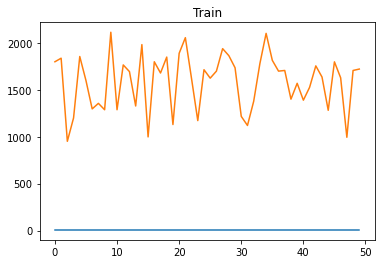

2/2 [==============================] - 2s 16ms/step


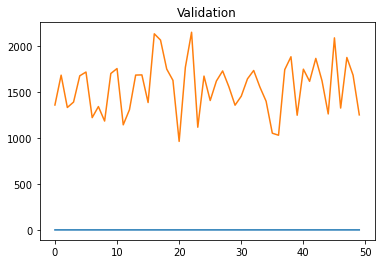

3/3 [==============================] - 0s 50ms/step


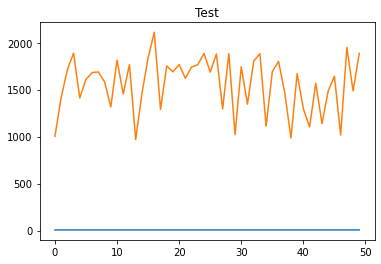

3/3 [==============================] - 0s 8ms/step


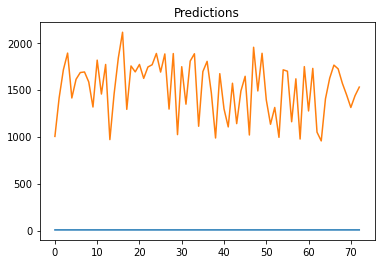

In [41]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [42]:
mavg_hybrid_cnn_lstm_mse

2360740.746732228

### RNN LSTM

Epoch 1/30
5/8 [=================>............] - ETA: 0s - loss: 2502369.0000 - root_mean_squared_error: 1581.8878  

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 24s 2s/step - loss: 2533451.7500 - root_mean_squared_error: 1591.6820 - val_loss: 2504924.5000 - val_root_mean_squared_error: 1582.6953
Epoch 2/30
5/8 [=================>............] - ETA: 0s - loss: 2642247.2500 - root_mean_squared_error: 1625.4990

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2532977.5000 - root_mean_squared_error: 1591.5331 - val_loss: 2504435.7500 - val_root_mean_squared_error: 1582.5409
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 2532091.5000 - root_mean_squared_error: 1591.2546

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2532467.2500 - root_mean_squared_error: 1591.3728 - val_loss: 2503850.2500 - val_root_mean_squared_error: 1582.3560
Epoch 4/30
5/8 [=================>............] - ETA: 0s - loss: 2512157.5000 - root_mean_squared_error: 1584.9788

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2531732.5000 - root_mean_squared_error: 1591.1418 - val_loss: 2502906.5000 - val_root_mean_squared_error: 1582.0577
Epoch 5/30
5/8 [=================>............] - ETA: 0s - loss: 2531801.2500 - root_mean_squared_error: 1591.1635

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2530872.5000 - root_mean_squared_error: 1590.8716 - val_loss: 2502301.7500 - val_root_mean_squared_error: 1581.8666
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 2530349.7500 - root_mean_squared_error: 1590.7073

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2530349.7500 - root_mean_squared_error: 1590.7073 - val_loss: 2501824.2500 - val_root_mean_squared_error: 1581.7156
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 2529874.5000 - root_mean_squared_error: 1590.5579

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2529874.5000 - root_mean_squared_error: 1590.5579 - val_loss: 2501356.2500 - val_root_mean_squared_error: 1581.5676
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 2541053.7500 - root_mean_squared_error: 1594.0684

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2529408.2500 - root_mean_squared_error: 1590.4114 - val_loss: 2500885.2500 - val_root_mean_squared_error: 1581.4187
Epoch 9/30
6/8 [=====================>........] - ETA: 0s - loss: 2515812.5000 - root_mean_squared_error: 1586.1313

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2528936.0000 - root_mean_squared_error: 1590.2628 - val_loss: 2500421.5000 - val_root_mean_squared_error: 1581.2721
Epoch 10/30
6/8 [=====================>........] - ETA: 0s - loss: 2464574.5000 - root_mean_squared_error: 1569.8964

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2528471.0000 - root_mean_squared_error: 1590.1167 - val_loss: 2499956.5000 - val_root_mean_squared_error: 1581.1251
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 2528010.2500 - root_mean_squared_error: 1589.9718

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2528010.2500 - root_mean_squared_error: 1589.9718 - val_loss: 2499496.2500 - val_root_mean_squared_error: 1580.9795
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 2527551.7500 - root_mean_squared_error: 1589.8276

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2527551.7500 - root_mean_squared_error: 1589.8276 - val_loss: 2499045.7500 - val_root_mean_squared_error: 1580.8370
Epoch 13/30
6/8 [=====================>........] - ETA: 0s - loss: 2501617.2500 - root_mean_squared_error: 1581.6501

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2527102.0000 - root_mean_squared_error: 1589.6862 - val_loss: 2498599.5000 - val_root_mean_squared_error: 1580.6959
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 2519410.2500 - root_mean_squared_error: 1587.2650

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2526663.0000 - root_mean_squared_error: 1589.5481 - val_loss: 2498160.2500 - val_root_mean_squared_error: 1580.5569
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 2525997.2500 - root_mean_squared_error: 1589.3386

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2526224.7500 - root_mean_squared_error: 1589.4102 - val_loss: 2497731.2500 - val_root_mean_squared_error: 1580.4213
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 2535148.7500 - root_mean_squared_error: 1592.2151

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2525799.2500 - root_mean_squared_error: 1589.2764 - val_loss: 2497307.7500 - val_root_mean_squared_error: 1580.2872
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 2518176.7500 - root_mean_squared_error: 1586.8765

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2525376.7500 - root_mean_squared_error: 1589.1434 - val_loss: 2496889.5000 - val_root_mean_squared_error: 1580.1550
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 2541872.5000 - root_mean_squared_error: 1594.3251

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2524959.7500 - root_mean_squared_error: 1589.0122 - val_loss: 2496469.0000 - val_root_mean_squared_error: 1580.0219
Epoch 19/30
6/8 [=====================>........] - ETA: 0s - loss: 2535793.2500 - root_mean_squared_error: 1592.4175

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2524537.7500 - root_mean_squared_error: 1588.8794 - val_loss: 2496049.7500 - val_root_mean_squared_error: 1579.8892
Epoch 20/30
5/8 [=================>............] - ETA: 0s - loss: 2513778.7500 - root_mean_squared_error: 1585.4901

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2524117.5000 - root_mean_squared_error: 1588.7472 - val_loss: 2495623.7500 - val_root_mean_squared_error: 1579.7543
Epoch 21/30
6/8 [=====================>........] - ETA: 0s - loss: 2509716.7500 - root_mean_squared_error: 1584.2085

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2523687.7500 - root_mean_squared_error: 1588.6119 - val_loss: 2495188.5000 - val_root_mean_squared_error: 1579.6166
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 2512460.7500 - root_mean_squared_error: 1585.0743

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2523250.5000 - root_mean_squared_error: 1588.4742 - val_loss: 2494745.5000 - val_root_mean_squared_error: 1579.4763
Epoch 23/30
6/8 [=====================>........] - ETA: 0s - loss: 2587634.2500 - root_mean_squared_error: 1608.6125

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2522802.7500 - root_mean_squared_error: 1588.3334 - val_loss: 2494290.5000 - val_root_mean_squared_error: 1579.3323
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 2531959.2500 - root_mean_squared_error: 1591.2131

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2522344.0000 - root_mean_squared_error: 1588.1890 - val_loss: 2493832.7500 - val_root_mean_squared_error: 1579.1874
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 2534212.5000 - root_mean_squared_error: 1591.9210

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2521884.2500 - root_mean_squared_error: 1588.0442 - val_loss: 2493366.0000 - val_root_mean_squared_error: 1579.0396
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 2521413.5000 - root_mean_squared_error: 1587.8959

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2521413.5000 - root_mean_squared_error: 1587.8959 - val_loss: 2492891.5000 - val_root_mean_squared_error: 1578.8893
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 2520934.7500 - root_mean_squared_error: 1587.7451

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2520934.7500 - root_mean_squared_error: 1587.7451 - val_loss: 2492410.2500 - val_root_mean_squared_error: 1578.7369
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 2510088.7500 - root_mean_squared_error: 1584.3259

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2520449.0000 - root_mean_squared_error: 1587.5922 - val_loss: 2491919.0000 - val_root_mean_squared_error: 1578.5813
Epoch 29/30
5/8 [=================>............] - ETA: 0s - loss: 2483138.2500 - root_mean_squared_error: 1575.7976

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2519954.7500 - root_mean_squared_error: 1587.4365 - val_loss: 2491421.2500 - val_root_mean_squared_error: 1578.4237
Epoch 30/30
4/8 [==============>...............] - ETA: 0s - loss: 2554306.5000 - root_mean_squared_error: 1598.2198

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 2s 4ms/step


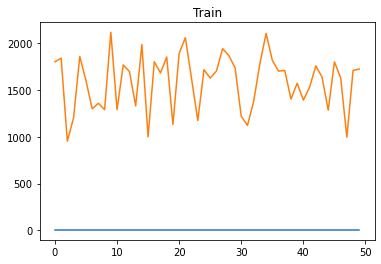

2/2 [==============================] - 2s 8ms/step


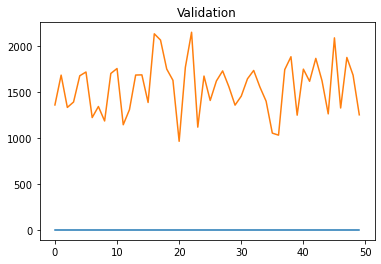

3/3 [==============================] - 0s 8ms/step


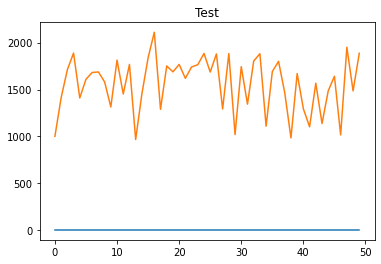

3/3 [==============================] - 0s 12ms/step


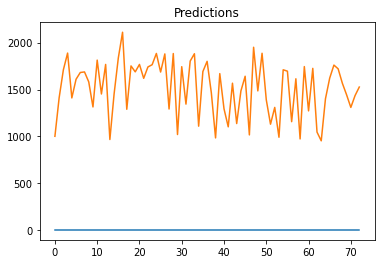

In [43]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(3,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [44]:
mavg_hybrid_rnn_lstm_mse

2366277.7568060076

### RNN GRU

Epoch 1/30
6/8 [=====================>........] - ETA: 0s - loss: 2488990.5000 - root_mean_squared_error: 1577.6534 

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 27s 3s/step - loss: 2531634.2500 - root_mean_squared_error: 1591.1110 - val_loss: 2502871.2500 - val_root_mean_squared_error: 1582.0465
Epoch 2/30
6/8 [=====================>........] - ETA: 0s - loss: 2516764.2500 - root_mean_squared_error: 1586.4313

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2530772.5000 - root_mean_squared_error: 1590.8402 - val_loss: 2502015.0000 - val_root_mean_squared_error: 1581.7759
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 2529920.2500 - root_mean_squared_error: 1590.5723

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2529920.2500 - root_mean_squared_error: 1590.5723 - val_loss: 2501169.0000 - val_root_mean_squared_error: 1581.5084
Epoch 4/30
5/8 [=================>............] - ETA: 0s - loss: 2415568.0000 - root_mean_squared_error: 1554.2097

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2529071.2500 - root_mean_squared_error: 1590.3054 - val_loss: 2500331.2500 - val_root_mean_squared_error: 1581.2435
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2528239.7500 - root_mean_squared_error: 1590.0439

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2528239.7500 - root_mean_squared_error: 1590.0439 - val_loss: 2499497.5000 - val_root_mean_squared_error: 1580.9799
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 2527415.5000 - root_mean_squared_error: 1589.7848

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2527415.5000 - root_mean_squared_error: 1589.7848 - val_loss: 2498669.2500 - val_root_mean_squared_error: 1580.7180
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 2513529.5000 - root_mean_squared_error: 1585.4115

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2526584.5000 - root_mean_squared_error: 1589.5233 - val_loss: 2497846.0000 - val_root_mean_squared_error: 1580.4575
Epoch 8/30
5/8 [=================>............] - ETA: 0s - loss: 2576364.0000 - root_mean_squared_error: 1605.1056

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2525757.2500 - root_mean_squared_error: 1589.2631 - val_loss: 2497011.5000 - val_root_mean_squared_error: 1580.1935
Epoch 9/30
5/8 [=================>............] - ETA: 0s - loss: 2522907.7500 - root_mean_squared_error: 1588.3663

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2524921.2500 - root_mean_squared_error: 1589.0001 - val_loss: 2496173.0000 - val_root_mean_squared_error: 1579.9282
Epoch 10/30
6/8 [=====================>........] - ETA: 0s - loss: 2561446.5000 - root_mean_squared_error: 1600.4520

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2524079.2500 - root_mean_squared_error: 1588.7351 - val_loss: 2495324.2500 - val_root_mean_squared_error: 1579.6595
Epoch 11/30
6/8 [=====================>........] - ETA: 0s - loss: 2500955.5000 - root_mean_squared_error: 1581.4409

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2523225.7500 - root_mean_squared_error: 1588.4664 - val_loss: 2494472.2500 - val_root_mean_squared_error: 1579.3898
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 2539063.7500 - root_mean_squared_error: 1593.4440

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2522372.0000 - root_mean_squared_error: 1588.1978 - val_loss: 2493610.5000 - val_root_mean_squared_error: 1579.1169
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 2534681.7500 - root_mean_squared_error: 1592.0684

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2521511.5000 - root_mean_squared_error: 1587.9268 - val_loss: 2492763.2500 - val_root_mean_squared_error: 1578.8488
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 2520668.0000 - root_mean_squared_error: 1587.6611

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2520668.0000 - root_mean_squared_error: 1587.6611 - val_loss: 2491928.7500 - val_root_mean_squared_error: 1578.5845
Epoch 15/30
6/8 [=====================>........] - ETA: 0s - loss: 2512189.2500 - root_mean_squared_error: 1584.9888

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2519842.0000 - root_mean_squared_error: 1587.4010 - val_loss: 2491110.2500 - val_root_mean_squared_error: 1578.3252
Epoch 16/30
6/8 [=====================>........] - ETA: 0s - loss: 2517803.7500 - root_mean_squared_error: 1586.7589

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2519033.5000 - root_mean_squared_error: 1587.1464 - val_loss: 2490323.2500 - val_root_mean_squared_error: 1578.0758
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 2524705.5000 - root_mean_squared_error: 1588.9321

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2518262.5000 - root_mean_squared_error: 1586.9034 - val_loss: 2489576.7500 - val_root_mean_squared_error: 1577.8392
Epoch 18/30
6/8 [=====================>........] - ETA: 0s - loss: 2534308.2500 - root_mean_squared_error: 1591.9510

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2517532.2500 - root_mean_squared_error: 1586.6733 - val_loss: 2488876.7500 - val_root_mean_squared_error: 1577.6174
Epoch 19/30
6/8 [=====================>........] - ETA: 0s - loss: 2493010.0000 - root_mean_squared_error: 1578.9269

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2516849.0000 - root_mean_squared_error: 1586.4580 - val_loss: 2488219.7500 - val_root_mean_squared_error: 1577.4092
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 2498042.2500 - root_mean_squared_error: 1580.5197

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2516208.7500 - root_mean_squared_error: 1586.2562 - val_loss: 2487614.2500 - val_root_mean_squared_error: 1577.2173
Epoch 21/30
6/8 [=====================>........] - ETA: 0s - loss: 2497484.2500 - root_mean_squared_error: 1580.3431

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2515619.5000 - root_mean_squared_error: 1586.0704 - val_loss: 2487054.2500 - val_root_mean_squared_error: 1577.0398
Epoch 22/30
5/8 [=================>............] - ETA: 0s - loss: 2528192.5000 - root_mean_squared_error: 1590.0291

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2515079.2500 - root_mean_squared_error: 1585.9001 - val_loss: 2486537.7500 - val_root_mean_squared_error: 1576.8760
Epoch 23/30
4/8 [==============>...............] - ETA: 0s - loss: 2518915.5000 - root_mean_squared_error: 1587.1091

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2514578.0000 - root_mean_squared_error: 1585.7421 - val_loss: 2486066.2500 - val_root_mean_squared_error: 1576.7264
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 2521537.5000 - root_mean_squared_error: 1587.9349

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2514121.5000 - root_mean_squared_error: 1585.5981 - val_loss: 2485628.2500 - val_root_mean_squared_error: 1576.5875
Epoch 25/30
6/8 [=====================>........] - ETA: 0s - loss: 2526163.7500 - root_mean_squared_error: 1589.3910

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2513695.5000 - root_mean_squared_error: 1585.4639 - val_loss: 2485223.7500 - val_root_mean_squared_error: 1576.4591
Epoch 26/30
5/8 [=================>............] - ETA: 0s - loss: 2483878.2500 - root_mean_squared_error: 1576.0325

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2513301.0000 - root_mean_squared_error: 1585.3394 - val_loss: 2484845.7500 - val_root_mean_squared_error: 1576.3394
Epoch 27/30
6/8 [=====================>........] - ETA: 0s - loss: 2529884.0000 - root_mean_squared_error: 1590.5609

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2512933.2500 - root_mean_squared_error: 1585.2234 - val_loss: 2484490.0000 - val_root_mean_squared_error: 1576.2266
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 2513536.5000 - root_mean_squared_error: 1585.4137

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2512583.5000 - root_mean_squared_error: 1585.1130 - val_loss: 2484156.2500 - val_root_mean_squared_error: 1576.1206
Epoch 29/30
6/8 [=====================>........] - ETA: 0s - loss: 2507027.2500 - root_mean_squared_error: 1583.3595

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2512258.7500 - root_mean_squared_error: 1585.0106 - val_loss: 2483841.0000 - val_root_mean_squared_error: 1576.0206
Epoch 30/30
6/8 [=====================>........] - ETA: 0s - loss: 2521005.5000 - root_mean_squared_error: 1587.7675

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 2s 6ms/step


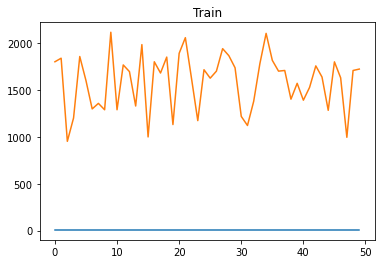

2/2 [==============================] - 2s 7ms/step


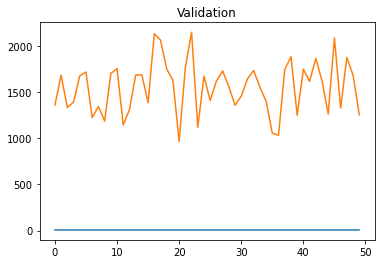

3/3 [==============================] - 0s 29ms/step


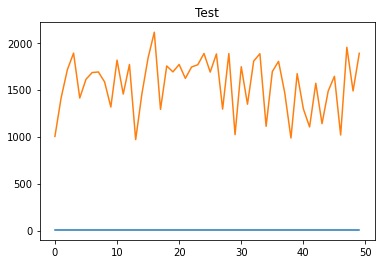

3/3 [==============================] - 0s 5ms/step


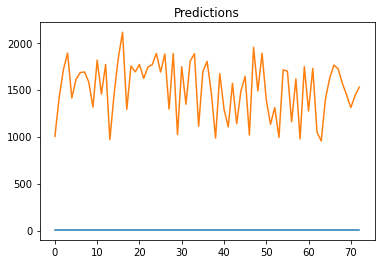

In [45]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [46]:
mavg_hybrid_rnn_gru_mse

2359109.295617998

### CNN GRU

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 2525742.0000 - root_mean_squared_error: 1589.2583

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 37s 3s/step - loss: 2532702.7500 - root_mean_squared_error: 1591.4468 - val_loss: 2503960.0000 - val_root_mean_squared_error: 1582.3906
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 2531750.0000 - root_mean_squared_error: 1591.1473

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2531750.0000 - root_mean_squared_error: 1591.1473 - val_loss: 2502937.7500 - val_root_mean_squared_error: 1582.0676
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 2539520.7500 - root_mean_squared_error: 1593.5874

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2530922.0000 - root_mean_squared_error: 1590.8872 - val_loss: 2502261.7500 - val_root_mean_squared_error: 1581.8539
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2530249.2500 - root_mean_squared_error: 1590.6758

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2530249.2500 - root_mean_squared_error: 1590.6758 - val_loss: 2501455.0000 - val_root_mean_squared_error: 1581.5989
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 2530658.7500 - root_mean_squared_error: 1590.8044

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2529164.5000 - root_mean_squared_error: 1590.3347 - val_loss: 2500259.0000 - val_root_mean_squared_error: 1581.2207
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 2524882.7500 - root_mean_squared_error: 1588.9879

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2527898.2500 - root_mean_squared_error: 1589.9365 - val_loss: 2498879.5000 - val_root_mean_squared_error: 1580.7844
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 2526605.7500 - root_mean_squared_error: 1589.5300

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2526812.2500 - root_mean_squared_error: 1589.5950 - val_loss: 2498134.0000 - val_root_mean_squared_error: 1580.5486
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 2534069.7500 - root_mean_squared_error: 1591.8762

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2526037.7500 - root_mean_squared_error: 1589.3513 - val_loss: 2497267.2500 - val_root_mean_squared_error: 1580.2744
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 2507418.2500 - root_mean_squared_error: 1583.4829

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2525211.7500 - root_mean_squared_error: 1589.0914 - val_loss: 2496545.0000 - val_root_mean_squared_error: 1580.0459
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 2515053.5000 - root_mean_squared_error: 1585.8920

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2524498.7500 - root_mean_squared_error: 1588.8672 - val_loss: 2495837.0000 - val_root_mean_squared_error: 1579.8218
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 2523865.2500 - root_mean_squared_error: 1588.6677

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2523794.5000 - root_mean_squared_error: 1588.6455 - val_loss: 2495138.7500 - val_root_mean_squared_error: 1579.6008
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 2518790.5000 - root_mean_squared_error: 1587.0698

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2523101.5000 - root_mean_squared_error: 1588.4274 - val_loss: 2494454.0000 - val_root_mean_squared_error: 1579.3840
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 2528902.0000 - root_mean_squared_error: 1590.2522

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2522418.5000 - root_mean_squared_error: 1588.2124 - val_loss: 2493780.7500 - val_root_mean_squared_error: 1579.1709
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 2494448.7500 - root_mean_squared_error: 1579.3824

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2521751.0000 - root_mean_squared_error: 1588.0022 - val_loss: 2493121.7500 - val_root_mean_squared_error: 1578.9623
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 2539033.2500 - root_mean_squared_error: 1593.4344

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2521096.0000 - root_mean_squared_error: 1587.7959 - val_loss: 2492471.0000 - val_root_mean_squared_error: 1578.7561
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 2520453.5000 - root_mean_squared_error: 1587.5936

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2520453.5000 - root_mean_squared_error: 1587.5936 - val_loss: 2491847.5000 - val_root_mean_squared_error: 1578.5586
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 2508426.2500 - root_mean_squared_error: 1583.8011

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2519835.5000 - root_mean_squared_error: 1587.3989 - val_loss: 2491237.0000 - val_root_mean_squared_error: 1578.3652
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 2520668.0000 - root_mean_squared_error: 1587.6611

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2519230.5000 - root_mean_squared_error: 1587.2084 - val_loss: 2490648.2500 - val_root_mean_squared_error: 1578.1788
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 2512896.2500 - root_mean_squared_error: 1585.2118

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2518654.5000 - root_mean_squared_error: 1587.0270 - val_loss: 2490080.7500 - val_root_mean_squared_error: 1577.9990
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 2519970.7500 - root_mean_squared_error: 1587.4415

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2518091.7500 - root_mean_squared_error: 1586.8496 - val_loss: 2489536.7500 - val_root_mean_squared_error: 1577.8265
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 2505197.2500 - root_mean_squared_error: 1582.7815

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2517559.5000 - root_mean_squared_error: 1586.6819 - val_loss: 2489011.0000 - val_root_mean_squared_error: 1577.6600
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 2509908.0000 - root_mean_squared_error: 1584.2689

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2517037.5000 - root_mean_squared_error: 1586.5175 - val_loss: 2488505.5000 - val_root_mean_squared_error: 1577.4998
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 2521564.0000 - root_mean_squared_error: 1587.9434

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2516539.5000 - root_mean_squared_error: 1586.3605 - val_loss: 2488017.7500 - val_root_mean_squared_error: 1577.3452
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 2535086.5000 - root_mean_squared_error: 1592.1956

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2516061.5000 - root_mean_squared_error: 1586.2098 - val_loss: 2487549.2500 - val_root_mean_squared_error: 1577.1967
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 2515600.2500 - root_mean_squared_error: 1586.0643

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2515600.2500 - root_mean_squared_error: 1586.0643 - val_loss: 2487103.0000 - val_root_mean_squared_error: 1577.0552
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 2510763.5000 - root_mean_squared_error: 1584.5389

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2515160.2500 - root_mean_squared_error: 1585.9257 - val_loss: 2486670.2500 - val_root_mean_squared_error: 1576.9180
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 2508701.2500 - root_mean_squared_error: 1583.8881

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2514731.2500 - root_mean_squared_error: 1585.7904 - val_loss: 2486254.5000 - val_root_mean_squared_error: 1576.7861
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 2511410.2500 - root_mean_squared_error: 1584.7429

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2514322.7500 - root_mean_squared_error: 1585.6616 - val_loss: 2485855.7500 - val_root_mean_squared_error: 1576.6598
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 2523048.0000 - root_mean_squared_error: 1588.4105

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2513932.5000 - root_mean_squared_error: 1585.5386 - val_loss: 2485476.7500 - val_root_mean_squared_error: 1576.5394
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 2515475.5000 - root_mean_squared_error: 1586.0250

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 3s 20ms/step


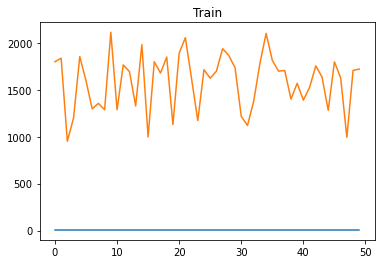

2/2 [==============================] - 2s 13ms/step


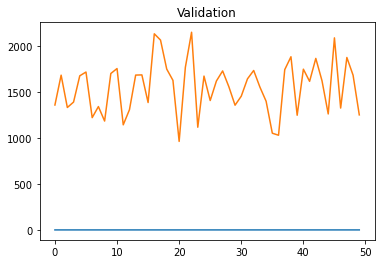

3/3 [==============================] - 0s 11ms/step


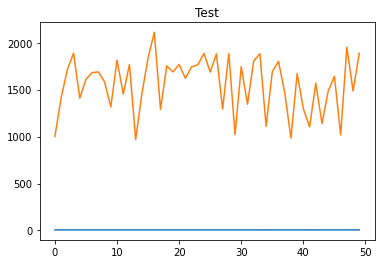

3/3 [==============================] - 0s 10ms/step


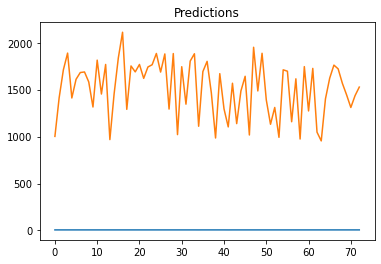

In [47]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [48]:
mavg_hybrid_cnn_gru_mse

2360649.7158060255

### CNN RNN GRU

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 2544962.5000 - root_mean_squared_error: 1595.2938

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 25s 2s/step - loss: 2535003.5000 - root_mean_squared_error: 1592.1694 - val_loss: 2505971.2500 - val_root_mean_squared_error: 1583.0260
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 2544838.2500 - root_mean_squared_error: 1595.2549

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2533815.5000 - root_mean_squared_error: 1591.7963 - val_loss: 2505063.5000 - val_root_mean_squared_error: 1582.7393
Epoch 3/30
6/8 [=====================>........] - ETA: 0s - loss: 2488646.7500 - root_mean_squared_error: 1577.5446

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2532931.7500 - root_mean_squared_error: 1591.5187 - val_loss: 2504144.0000 - val_root_mean_squared_error: 1582.4487
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 2518276.0000 - root_mean_squared_error: 1586.9077

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2531977.2500 - root_mean_squared_error: 1591.2188 - val_loss: 2503174.0000 - val_root_mean_squared_error: 1582.1422
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2531050.7500 - root_mean_squared_error: 1590.9276

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2531050.7500 - root_mean_squared_error: 1590.9276 - val_loss: 2502278.0000 - val_root_mean_squared_error: 1581.8590
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 2526001.2500 - root_mean_squared_error: 1589.3398

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2530163.2500 - root_mean_squared_error: 1590.6487 - val_loss: 2501386.5000 - val_root_mean_squared_error: 1581.5773
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 2529275.7500 - root_mean_squared_error: 1590.3696

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2529275.7500 - root_mean_squared_error: 1590.3696 - val_loss: 2500504.5000 - val_root_mean_squared_error: 1581.2983
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 2528400.7500 - root_mean_squared_error: 1590.0946

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2528400.7500 - root_mean_squared_error: 1590.0946 - val_loss: 2499631.0000 - val_root_mean_squared_error: 1581.0221
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 2527524.0000 - root_mean_squared_error: 1589.8188

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2527524.0000 - root_mean_squared_error: 1589.8188 - val_loss: 2498760.5000 - val_root_mean_squared_error: 1580.7467
Epoch 10/30
6/8 [=====================>........] - ETA: 0s - loss: 2510183.2500 - root_mean_squared_error: 1584.3558

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2526648.2500 - root_mean_squared_error: 1589.5435 - val_loss: 2497885.0000 - val_root_mean_squared_error: 1580.4698
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 2525774.0000 - root_mean_squared_error: 1589.2684

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2525774.0000 - root_mean_squared_error: 1589.2684 - val_loss: 2497026.0000 - val_root_mean_squared_error: 1580.1981
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 2522264.7500 - root_mean_squared_error: 1588.1639

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2524923.5000 - root_mean_squared_error: 1589.0007 - val_loss: 2496185.5000 - val_root_mean_squared_error: 1579.9321
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 2513637.5000 - root_mean_squared_error: 1585.4456

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2524093.5000 - root_mean_squared_error: 1588.7396 - val_loss: 2495368.7500 - val_root_mean_squared_error: 1579.6736
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 2523283.0000 - root_mean_squared_error: 1588.4845

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2523283.0000 - root_mean_squared_error: 1588.4845 - val_loss: 2494575.5000 - val_root_mean_squared_error: 1579.4225
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 2527632.5000 - root_mean_squared_error: 1589.8530

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2522500.2500 - root_mean_squared_error: 1588.2380 - val_loss: 2493804.7500 - val_root_mean_squared_error: 1579.1785
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 2524129.2500 - root_mean_squared_error: 1588.7509

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2521733.5000 - root_mean_squared_error: 1587.9967 - val_loss: 2493054.0000 - val_root_mean_squared_error: 1578.9408
Epoch 17/30
6/8 [=====================>........] - ETA: 0s - loss: 2546644.7500 - root_mean_squared_error: 1595.8210

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2520993.7500 - root_mean_squared_error: 1587.7638 - val_loss: 2492315.7500 - val_root_mean_squared_error: 1578.7070
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 2520258.7500 - root_mean_squared_error: 1587.5322

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2520258.7500 - root_mean_squared_error: 1587.5322 - val_loss: 2491596.7500 - val_root_mean_squared_error: 1578.4792
Epoch 19/30
6/8 [=====================>........] - ETA: 0s - loss: 2510237.2500 - root_mean_squared_error: 1584.3728

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2519545.0000 - root_mean_squared_error: 1587.3075 - val_loss: 2490897.7500 - val_root_mean_squared_error: 1578.2578
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 2518852.0000 - root_mean_squared_error: 1587.0891

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2518852.0000 - root_mean_squared_error: 1587.0891 - val_loss: 2490207.0000 - val_root_mean_squared_error: 1578.0389
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 2498554.2500 - root_mean_squared_error: 1580.6815

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2518165.2500 - root_mean_squared_error: 1586.8728 - val_loss: 2489532.7500 - val_root_mean_squared_error: 1577.8253
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 2511821.7500 - root_mean_squared_error: 1584.8728

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2517499.5000 - root_mean_squared_error: 1586.6630 - val_loss: 2488877.2500 - val_root_mean_squared_error: 1577.6176
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 2510198.7500 - root_mean_squared_error: 1584.3607

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2516857.2500 - root_mean_squared_error: 1586.4606 - val_loss: 2488253.7500 - val_root_mean_squared_error: 1577.4199
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 2516244.0000 - root_mean_squared_error: 1586.2673

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2516244.0000 - root_mean_squared_error: 1586.2673 - val_loss: 2487666.2500 - val_root_mean_squared_error: 1577.2338
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 2519931.5000 - root_mean_squared_error: 1587.4292

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2515669.7500 - root_mean_squared_error: 1586.0863 - val_loss: 2487112.2500 - val_root_mean_squared_error: 1577.0581
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 2506132.2500 - root_mean_squared_error: 1583.0768

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2515128.7500 - root_mean_squared_error: 1585.9158 - val_loss: 2486587.5000 - val_root_mean_squared_error: 1576.8917
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 2514616.2500 - root_mean_squared_error: 1585.7542

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2514616.2500 - root_mean_squared_error: 1585.7542 - val_loss: 2486087.0000 - val_root_mean_squared_error: 1576.7332
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2514124.2500 - root_mean_squared_error: 1585.5990

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2514124.2500 - root_mean_squared_error: 1585.5990 - val_loss: 2485613.2500 - val_root_mean_squared_error: 1576.5828
Epoch 29/30
6/8 [=====================>........] - ETA: 0s - loss: 2555499.7500 - root_mean_squared_error: 1598.5930

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2513657.2500 - root_mean_squared_error: 1585.4518 - val_loss: 2485157.7500 - val_root_mean_squared_error: 1576.4384
Epoch 30/30
6/8 [=====================>........] - ETA: 0s - loss: 2537320.7500 - root_mean_squared_error: 1592.8970

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 5s 14ms/step


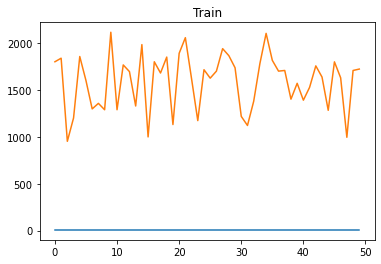

2/2 [==============================] - 2s 13ms/step


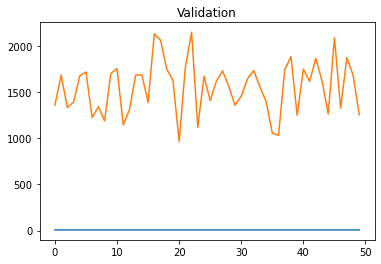

3/3 [==============================] - 0s 22ms/step


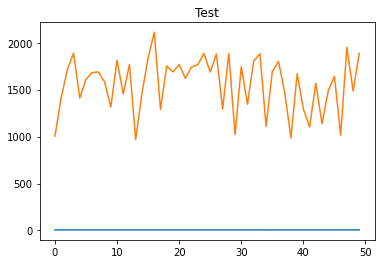

3/3 [==============================] - 0s 9ms/step


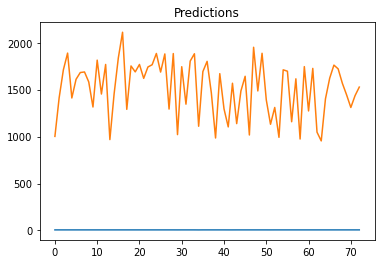

In [49]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3, 1)))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [50]:
mavg_hybrid_cnn_rnn_gru_mse

2360277.515004716

### RNN LSTM GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 2532819.5000 - root_mean_squared_error: 1591.4834

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 41s 4s/step - loss: 2532819.5000 - root_mean_squared_error: 1591.4834 - val_loss: 2503682.0000 - val_root_mean_squared_error: 1582.3027
Epoch 2/30
6/8 [=====================>........] - ETA: 0s - loss: 2521171.5000 - root_mean_squared_error: 1587.8197

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2531329.7500 - root_mean_squared_error: 1591.0154 - val_loss: 2502149.5000 - val_root_mean_squared_error: 1581.8184
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 2529750.7500 - root_mean_squared_error: 1590.5190

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2529750.7500 - root_mean_squared_error: 1590.5190 - val_loss: 2500484.2500 - val_root_mean_squared_error: 1581.2920
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2528015.2500 - root_mean_squared_error: 1589.9734

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2528015.2500 - root_mean_squared_error: 1589.9734 - val_loss: 2498615.5000 - val_root_mean_squared_error: 1580.7009
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2526044.7500 - root_mean_squared_error: 1589.3535

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2526044.7500 - root_mean_squared_error: 1589.3535 - val_loss: 2496491.5000 - val_root_mean_squared_error: 1580.0289
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 2512040.0000 - root_mean_squared_error: 1584.9417

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2523820.7500 - root_mean_squared_error: 1588.6538 - val_loss: 2494080.5000 - val_root_mean_squared_error: 1579.2659
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 2521299.2500 - root_mean_squared_error: 1587.8600

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2521299.2500 - root_mean_squared_error: 1587.8600 - val_loss: 2491449.7500 - val_root_mean_squared_error: 1578.4327
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 2519591.2500 - root_mean_squared_error: 1587.3220

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2518610.5000 - root_mean_squared_error: 1587.0131 - val_loss: 2488683.5000 - val_root_mean_squared_error: 1577.5562
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 2521413.7500 - root_mean_squared_error: 1587.8960

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2515828.2500 - root_mean_squared_error: 1586.1362 - val_loss: 2485902.2500 - val_root_mean_squared_error: 1576.6744
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 2499679.5000 - root_mean_squared_error: 1581.0375

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2513091.2500 - root_mean_squared_error: 1585.2732 - val_loss: 2483246.2500 - val_root_mean_squared_error: 1575.8319
Epoch 11/30
6/8 [=====================>........] - ETA: 0s - loss: 2532785.2500 - root_mean_squared_error: 1591.4727

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2510512.7500 - root_mean_squared_error: 1584.4597 - val_loss: 2480827.5000 - val_root_mean_squared_error: 1575.0643
Epoch 12/30
6/8 [=====================>........] - ETA: 0s - loss: 2554027.2500 - root_mean_squared_error: 1598.1324

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2508217.5000 - root_mean_squared_error: 1583.7354 - val_loss: 2478735.5000 - val_root_mean_squared_error: 1574.4000
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 2500286.0000 - root_mean_squared_error: 1581.2292

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2506262.7500 - root_mean_squared_error: 1583.1180 - val_loss: 2476999.5000 - val_root_mean_squared_error: 1573.8486
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 2504641.7500 - root_mean_squared_error: 1582.6060

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2504641.7500 - root_mean_squared_error: 1582.6060 - val_loss: 2475592.2500 - val_root_mean_squared_error: 1573.4015
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 2514609.2500 - root_mean_squared_error: 1585.7520

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 2503359.0000 - root_mean_squared_error: 1582.2007 - val_loss: 2474454.0000 - val_root_mean_squared_error: 1573.0397
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 2497484.2500 - root_mean_squared_error: 1580.3431

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2502308.2500 - root_mean_squared_error: 1581.8687 - val_loss: 2473548.2500 - val_root_mean_squared_error: 1572.7518
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 2501467.7500 - root_mean_squared_error: 1581.6029

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 2501467.7500 - root_mean_squared_error: 1581.6029 - val_loss: 2472807.2500 - val_root_mean_squared_error: 1572.5162
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 2500778.0000 - root_mean_squared_error: 1581.3849

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2500778.0000 - root_mean_squared_error: 1581.3849 - val_loss: 2472190.2500 - val_root_mean_squared_error: 1572.3201
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 2499544.2500 - root_mean_squared_error: 1580.9948

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 2500202.2500 - root_mean_squared_error: 1581.2028 - val_loss: 2471669.2500 - val_root_mean_squared_error: 1572.1543
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 2521030.5000 - root_mean_squared_error: 1587.7754

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2499710.0000 - root_mean_squared_error: 1581.0471 - val_loss: 2471219.5000 - val_root_mean_squared_error: 1572.0112
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 2489082.0000 - root_mean_squared_error: 1577.6825

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2499282.7500 - root_mean_squared_error: 1580.9120 - val_loss: 2470825.0000 - val_root_mean_squared_error: 1571.8859
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 2514160.7500 - root_mean_squared_error: 1585.6105

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2498905.2500 - root_mean_squared_error: 1580.7926 - val_loss: 2470464.5000 - val_root_mean_squared_error: 1571.7711
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 2496054.5000 - root_mean_squared_error: 1579.8906

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2498554.7500 - root_mean_squared_error: 1580.6818 - val_loss: 2470135.2500 - val_root_mean_squared_error: 1571.6664
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 2497452.2500 - root_mean_squared_error: 1580.3330

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2498232.5000 - root_mean_squared_error: 1580.5798 - val_loss: 2469824.0000 - val_root_mean_squared_error: 1571.5674
Epoch 25/30
6/8 [=====================>........] - ETA: 0s - loss: 2511745.2500 - root_mean_squared_error: 1584.8486

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2497927.5000 - root_mean_squared_error: 1580.4833 - val_loss: 2469528.0000 - val_root_mean_squared_error: 1571.4731
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 2497637.0000 - root_mean_squared_error: 1580.3914

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2497637.0000 - root_mean_squared_error: 1580.3914 - val_loss: 2469245.7500 - val_root_mean_squared_error: 1571.3834
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 2497359.2500 - root_mean_squared_error: 1580.3036

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2497359.2500 - root_mean_squared_error: 1580.3036 - val_loss: 2468976.0000 - val_root_mean_squared_error: 1571.2976
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 2481678.2500 - root_mean_squared_error: 1575.3344

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2497091.2500 - root_mean_squared_error: 1580.2188 - val_loss: 2468714.0000 - val_root_mean_squared_error: 1571.2142
Epoch 29/30
5/8 [=================>............] - ETA: 0s - loss: 2437057.2500 - root_mean_squared_error: 1561.1077

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2496831.0000 - root_mean_squared_error: 1580.1364 - val_loss: 2468459.0000 - val_root_mean_squared_error: 1571.1331
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 2502010.2500 - root_mean_squared_error: 1581.7744

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 1s 6ms/step


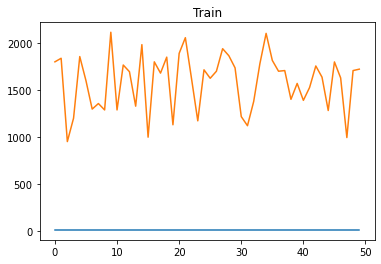

2/2 [==============================] - 2s 10ms/step


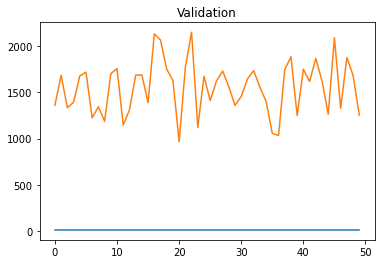

3/3 [==============================] - 0s 6ms/step


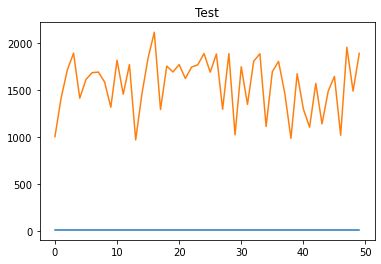

3/3 [==============================] - 0s 4ms/step


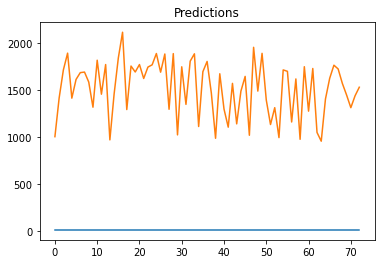

In [51]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_hybrid_lstm_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [52]:
mavg_hybrid_lstm_rnn_gru_mse

2344211.338035498

# MSE

In [53]:
mse_list = [cnn_mse, rnn_mse, gru_mse, lstm_mse,
            mvg_cnn_mse, mvg_rnn_mse, mvg_gru_mse, mvg_lstm_mse,
            auto_cnn_mse, auto_rnn_mse, auto_gru_mse, auto_lstm_mse,
            mavg_auto_cnn_mse, mavg_auto_rnn_mse, mavg_auto_gru_mse, mavg_auto_lstm_mse,
            hybrid_cnn_lstm_mse, hybrid_lstm_rnn_gru_mse,hybrid_cnn_rnn_gru_mse,hybrid_cnn_gru_mse,
            hybrid_rnn_gru_mse,hybrid_rnn_lstm_mse,
            mavg_hybrid_cnn_lstm_mse, mavg_hybrid_lstm_rnn_gru_mse,mavg_hybrid_cnn_rnn_gru_mse,
            mavg_hybrid_cnn_gru_mse,mavg_hybrid_rnn_gru_mse,mavg_hybrid_rnn_lstm_mse]

model_n = ["cnn", "rnn", "gru", "lstm",
           "mvg_cnn", "mvg_rnn", "mvg_gru", "mvg_lstm",
           "auto_cnn", "auto_rnn", "auto_gru", "auto_lstm",
           "mvg_auto_cnn", "mvg_auto_rnn", "mvg_auto_gru", "mvg_auto_lstm",
           "hybrid_cnn_lstm", "hybrid_lstm_rnn_gru" ,"hybrid_cnn_rnn_gru","hybrid_cnn_gru",
           "hybrid_rnn_gru","hybrid_rnn_lstm",
           "mavg_hybrid_cnn_lstm", "mavg_hybrid_lstm_rnn_gru","mavg_hybrid_cnn_rnn_gru",
           "mavg_hybrid_cnn_gru","mavg_hybrid_rnn_gru","mavg_hybrid_rnn_lstm"
          ]
msedf = pd.DataFrame({
    "Model": model_n,
    "MSE": mse_list
})

rmse = np.sqrt(msedf.MSE)
msedf["RMSE"] = rmse

In [54]:
msedf

,Model,MSE,RMSE
0,cnn,5.063684e+05,711.595692
1,rnn,2.373439e+06,1540.597016
2,gru,2.372271e+06,1540.217919
3,lstm,2.372076e+06,1540.154698
4,mvg_cnn,5.164924e+03,71.867404
5,mvg_rnn,2.377763e+06,1541.999604
6,mvg_gru,2.372865e+06,1540.410650
7,mvg_lstm,2.378362e+06,1542.193822
8,auto_cnn,3.914651e+03,62.567168
9,auto_rnn,2.371995e+06,1540.128366


In [55]:
msedf.to_csv("msedfECB.csv", index= False)

<AxesSubplot:xlabel='Model'>

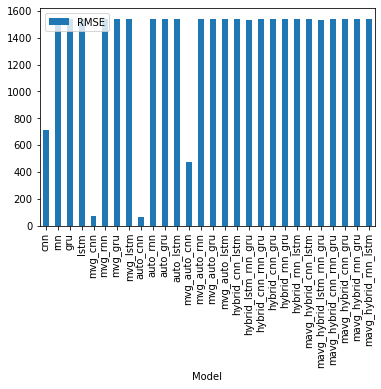

In [56]:
msedf.plot("Model", "RMSE", kind= "bar")

In [57]:
np.save("x_train.npy", x_train)
np.save("y_train.npy", y_train)
np.save("x_test.npy", x_test)
np.save("y_test.npy", y_test)
np.save("x_val.npy", x_val)
np.save("y_val.npy", y_val)